In [1]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Wed Mar 22 03:39:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd, numpy as np , matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/project_vahid/data/WeatherAUS.csv")
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

## numbers of NANs

In [4]:
print("\33[91m" ,"columns                     number of nan" , "\33[0m" )
print("========="*5)
for c in df.columns:
  print(f"{c:30}     {df[c].isna().sum()}")
  print("---------"*5)

 columns                     number of nan 
Date                               0
---------------------------------------------
Location                           0
---------------------------------------------
MinTemp                            1485
---------------------------------------------
MaxTemp                            1261
---------------------------------------------
Rainfall                           3261
---------------------------------------------
Evaporation                        62790
---------------------------------------------
Sunshine                           69835
---------------------------------------------
WindGustDir                        10326
---------------------------------------------
WindGustSpeed                      10263
---------------------------------------------
WindDir9am                         10566
---------------------------------------------
WindDir3pm                         4228
---------------------------------------------
WindSpeed9a

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### We delete the columns whose number of NAN-values is more than 60,000

In [6]:
df.drop(["Evaporation" ,"Sunshine","Cloud9am","Cloud3pm" ] ,axis=1,inplace=True)

In [7]:
df = df.fillna(method="ffill")
# df.dropna(inplace=True)

In [8]:
df.shape

(145460, 19)

## working on categorical columns

In [9]:
# unique values of categorical columns

categorical_columns = []
for c in df.columns:
  if (type(df[c].iloc[0]) == str)&(c!="Date"):
    print(c)
    print(df[c].unique())
    print("number of classe: " ,len(df[c].unique()))
    print("========="*10)
    categorical_columns.append(c)

Location
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
number of classe:  49
WindGustDir
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
number of classe:  16
WindDir9am
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
number of classe:  16
WindDir3pm
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
number of classe:  16
RainToday
['No' 'Yes']
numb

In [10]:
categorical_columns.remove("RainToday")
categorical_columns.remove("RainTomorrow")

In [11]:
# replace "yes" and "no"  in columns=["RainToday" , "RainTomorrow"] with "0" and "1"
df.RainToday.replace({"No":0, "Yes":1}, inplace=True)
df.RainTomorrow.replace({"No":0, "Yes":1}, inplace=True)
df = df.astype({"RainToday": np.float64})

### OneHotEncoder

In [12]:
for c in categorical_columns:
    for cc in df[c].unique():
        df[c+"_"+cc] = (df[c] == cc).replace({True:1 , False:0}).astype(np.float64)
    df.drop(c , axis=1, inplace=True)
    print(c)

Location
WindGustDir
WindDir9am


<ipython-input-12-73821616eef2>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c+"_"+cc] = (df[c] == cc).replace({True:1 , False:0}).astype(np.float64)
<ipython-input-12-73821616eef2>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c+"_"+cc] = (df[c] == cc).replace({True:1 , False:0}).astype(np.float64)
<ipython-input-12-73821616eef2>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

WindDir3pm


<ipython-input-12-73821616eef2>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[c+"_"+cc] = (df[c] == cc).replace({True:1 , False:0}).astype(np.float64)


In [13]:
df.shape

(145460, 112)

In [14]:
d = df.pop("RainToday")
df["RainToday"] = d
d = df.pop("RainTomorrow")
df["RainTomorrow"] = d
df

<ipython-input-14-cd9c3fd33a61>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["RainToday"] = d
<ipython-input-14-cd9c3fd33a61>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["RainTomorrow"] = d


Date  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0       2008-12-01     13.4     22.9       0.6           44.0          20.0   
1       2008-12-02      7.4     25.1       0.0           44.0           4.0   
2       2008-12-03     12.9     25.7       0.0           46.0          19.0   
3       2008-12-04      9.2     28.0       0.0           24.0          11.0   
4       2008-12-05     17.5     32.3       1.0           41.0           7.0   
...            ...      ...      ...       ...            ...           ...   
145455  2017-06-21      2.8     23.4       0.0           31.0          13.0   
145456  2017-06-22      3.6     25.3       0.0           22.0          13.0   
145457  2017-06-23      5.4     26.9       0.0           37.0           9.0   
145458  2017-06-24      7.8     27.0       0.0           28.0          13.0   
145459  2017-06-25     14.9     27.0       0.0           28.0          17.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  ...  \
0               24.0         71.0         22.0       1007.7  ...   
1               22.0         44.0         25.0       1010.6  ...   
2               26.0         38.0         30.0       1007.6  ...   
3                9.0         45.0         16.0       1017.6  ...   
4               20.0         82.0         33.0       1010.8  ...   
...              ...          ...          ...          ...  ...   
145455          11.0         51.0         24.0       1024.6  ...   
145456           9.0         56.0         21.0       1023.5  ...   
145457           9.0         53.0         24.0       1021.0  ...   
145458           7.0         51.0         24.0       1019.4  ...   
145459          17.0         62.0         36.0       1020.2  ...   

        WindDir3pm_NNW  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_SE  \
0                  0.0             0.0            0.0            0.0   
1                  0.0             0.0            0.0            0.0   
2                  0.0             0.0            0.0            0.0   
3                  0.0             0.0            0.0            0.0   
4                  0.0             0.0            0.0            0.0   
...                ...             ...            ...            ...   
145455             0.0             0.0            0.0            0.0   
145456             0.0             0.0            0.0            0.0   
145457             0.0             0.0            0.0            0.0   
145458             0.0             0.0            0.0            0.0   
145459             0.0             0.0            0.0            0.0   

        WindDir3pm_N  WindDir3pm_S  WindDir3pm_NNE  WindDir3pm_NE  RainToday  \
0                0.0           0.0             0.0            0.0        0.0   
1                0.0           0.0             0.0            0.0        0.0   
2                0.0           0.0             0.0            0.0        0.0   
3                0.0           0.0             0.0            0.0        0.0   
4                0.0           0.0             0.0            0.0        0.0   
...              ...           ...             ...            ...        ...   
145455           0.0           0.0             0.0            0.0        0.0   
145456           1.0           0.0             0.0            0.0        0.0   
145457           0.0           0.0             0.0            0.0        0.0   
145458           1.0           0.0             0.0            0.0        0.0   
145459           0.0           0.0             0.0            0.0        0.0   

        RainTomorrow  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
145455             0  
145456             0  
145457             0  
145458             0  
145459             0  

[145460 rows x 112 columns]

In [15]:
df.set_index("Date" ,inplace=True)
df

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
Date                                                                  
2008-12-01     13.4     22.9       0.6           44.0          20.0   
2008-12-02      7.4     25.1       0.0           44.0           4.0   
2008-12-03     12.9     25.7       0.0           46.0          19.0   
2008-12-04      9.2     28.0       0.0           24.0          11.0   
2008-12-05     17.5     32.3       1.0           41.0           7.0   
...             ...      ...       ...            ...           ...   
2017-06-21      2.8     23.4       0.0           31.0          13.0   
2017-06-22      3.6     25.3       0.0           22.0          13.0   
2017-06-23      5.4     26.9       0.0           37.0           9.0   
2017-06-24      7.8     27.0       0.0           28.0          13.0   
2017-06-25     14.9     27.0       0.0           28.0          17.0   

            WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
Date                                                                           
2008-12-01          24.0         71.0         22.0       1007.7       1007.1   
2008-12-02          22.0         44.0         25.0       1010.6       1007.8   
2008-12-03          26.0         38.0         30.0       1007.6       1008.7   
2008-12-04           9.0         45.0         16.0       1017.6       1012.8   
2008-12-05          20.0         82.0         33.0       1010.8       1006.0   
...                  ...          ...          ...          ...          ...   
2017-06-21          11.0         51.0         24.0       1024.6       1020.3   
2017-06-22           9.0         56.0         21.0       1023.5       1019.1   
2017-06-23           9.0         53.0         24.0       1021.0       1016.8   
2017-06-24           7.0         51.0         24.0       1019.4       1016.5   
2017-06-25          17.0         62.0         36.0       1020.2       1017.9   

            ...  WindDir3pm_NNW  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_SE  \
Date        ...                                                                 
2008-12-01  ...             0.0             0.0            0.0            0.0   
2008-12-02  ...             0.0             0.0            0.0            0.0   
2008-12-03  ...             0.0             0.0            0.0            0.0   
2008-12-04  ...             0.0             0.0            0.0            0.0   
2008-12-05  ...             0.0             0.0            0.0            0.0   
...         ...             ...             ...            ...            ...   
2017-06-21  ...             0.0             0.0            0.0            0.0   
2017-06-22  ...             0.0             0.0            0.0            0.0   
2017-06-23  ...             0.0             0.0            0.0            0.0   
2017-06-24  ...             0.0             0.0            0.0            0.0   
2017-06-25  ...             0.0             0.0            0.0            0.0   

            WindDir3pm_N  WindDir3pm_S  WindDir3pm_NNE  WindDir3pm_NE  \
Date                                                                    
2008-12-01           0.0           0.0             0.0            0.0   
2008-12-02           0.0           0.0             0.0            0.0   
2008-12-03           0.0           0.0             0.0            0.0   
2008-12-04           0.0           0.0             0.0            0.0   
2008-12-05           0.0           0.0             0.0            0.0   
...                  ...           ...             ...            ...   
2017-06-21           0.0           0.0             0.0            0.0   
2017-06-22           1.0           0.0             0.0            0.0   
2017-06-23           0.0           0.0             0.0            0.0   
2017-06-24           1.0           0.0             0.0            0.0   
2017-06-25           0.0           0.0             0.0            0.0   

            RainToday  RainTomorrow  
Date 

In [16]:
d1 = df[df.Location_AliceSprings==1]
d1.shape

(3040, 111)

In [17]:
print(int(d1.shape[0]*0.6))
print(int(d1.shape[0]*0.8))

1824
2432


In [18]:
from sklearn.model_selection import train_test_split

# Split train and test data
train_features = d1.iloc[:int(d1.shape[0]*0.6)]
train_labels = d1.iloc[:int(d1.shape[0]*0.6) , -1]

val_features = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8)]
val_labels = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8), -1]

test_features = d1.iloc[int(d1.shape[0]*0.8):]
test_labels = d1.iloc[int(d1.shape[0]*0.8):, -1]

# I want to use a T-days window of input data for predicting target_class
# It means I need to prepend (T-1) last train records to the 1st test window
T = 5+1  # my choice of the timesteps window

prepend_features = train_features.iloc[-(T-1):]
test_features = pd.concat([prepend_features, test_features], axis=0)

train_features.shape, train_labels.shape, test_features.shape, test_labels.shape , val_features.shape ,val_labels.shape

((1824, 111), (1824,), (613, 111), (608,), (608, 111), (608,))

In [19]:
# Rescale the features
from sklearn.preprocessing import StandardScaler  # MinMaxScaler

scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                     index=train_features.index,
                                     columns=train_features.columns)
# The Scaler is fit on the training set and then applied to the test set
scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                    index=test_features.index,
                                    columns=test_features.columns)

scaled_train_features.shape, scaled_test_features.shape

((1824, 111), (613, 111))

# Data Pre-processing for LSTM Model

In [20]:
# Create sequences of T timesteps
X_train, y_train = [], []
for i in range(train_labels.shape[0] - (T-1)):
    X_train.append(scaled_train_features.iloc[i:i+T].values)
    y_train.append(train_labels.iloc[i + (T-1)])
X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

X_test, y_test = [], []
for i in range(test_labels.shape[0]):
    X_test.append(scaled_test_features.iloc[i:i+T].values)
    y_test.append(test_labels.iloc[i])
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')

Train data dimensions: (1819, 6, 111), (1819, 1)
Test data dimensions: (608, 6, 111), (608, 1)


# LSTM Model - Batch Training and Predictiction

In [21]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time

layers=[80, 80, 80, 1], train_examples=1819, test_examples=608
batch = 1819, timesteps = 6, features = 111, epochs = 100
lr = 0.005, lambda = 0.003, dropout = 0.0, recurr_dropout = 0.0


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 80)             61440     
                                                                 
 batch_normalization (BatchN  (None, 6, 80)            320       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 6, 80)             51520     
                                                                 
 batch_normalization_1 (Batc  (None, 6, 80)            320       
 hNormalization)                                                 
                                                                 
 lstm_2 (LSTM)               (None, 80)                51520     
                                                                 
 batch_normalization_2 (Batc  (None, 80)               3

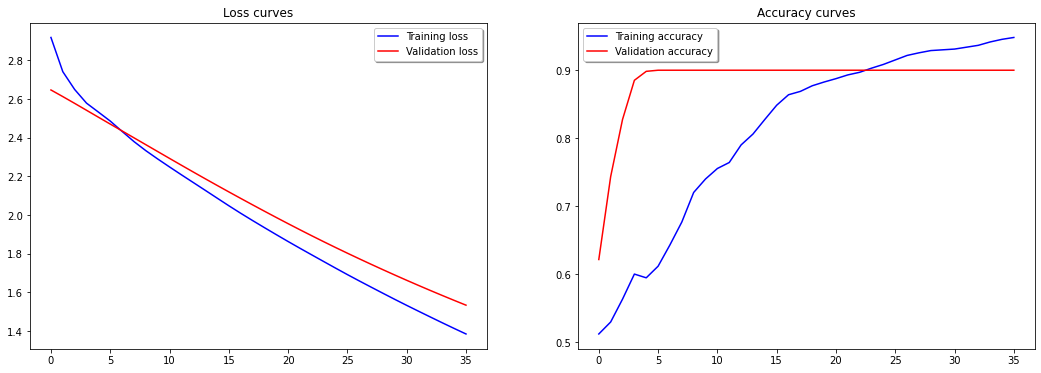

In [22]:
# Let's make a list of CONSTANTS for modelling:
LAYERS = [80, 80, 80, 1]             # number of units in hidden and output layers
M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]
N = X_train.shape[2]                 # number of features
BATCH = M_TRAIN                      # batch size
EPOCH = 100                           # number of epochs
LR = 5e-3                            # learning rate of the gradient descent
LAMBD = 3e-3                         # lambda in L2 regularizaion
DP = 0.0                             # dropout rate
RDP = 0.0                            # recurrent dropout rate
print(f'layers={LAYERS}, train_examples={M_TRAIN}, test_examples={M_TEST}')
print(f'batch = {BATCH}, timesteps = {T}, features = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')

# Build the Model
model = Sequential()
model.add(LSTM(input_shape=(T, N), units=LAYERS[0],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[1],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=True, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(LSTM(units=LAYERS[2],
               activation='tanh', recurrent_activation='hard_sigmoid',
               kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
               dropout=DP, recurrent_dropout=RDP,
               return_sequences=False, return_state=False,
               stateful=False, unroll=False
              ))
model.add(BatchNormalization())
model.add(Dense(units=LAYERS[3], activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer=Adam(lr=LR))
print(model.summary())

# Define a learning rate decay method:
lr_decay = ReduceLROnPlateau(monitor='loss', 
                             patience=1, verbose=0, 
                             factor=0.5, min_lr=1e-8)
# Define Early Stopping:
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                           patience=30, verbose=1, mode='auto',
                           baseline=0, restore_best_weights=True)
# Train the model. 
# The dataset is small for NN - let's use test_data for validation
start = time()
History = model.fit(X_train, y_train,
                    epochs=EPOCH,
                    batch_size=BATCH,
                    validation_split=0.0,
                    validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                    shuffle=True,verbose=0,
                    callbacks=[lr_decay, early_stop])
print('-'*65)
print(f'Training was completed in {time() - start:.2f} secs')
print('-'*65)
# Evaluate the model:
train_loss, train_acc = model.evaluate(X_train, y_train,
                                       batch_size=M_TRAIN, verbose=0)
test_loss, test_acc = model.evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                     batch_size=M_TEST, verbose=0)
print('-'*65)
print(f'train accuracy = {round(train_acc * 100, 4)}%')
print(f'test accuracy = {round(test_acc * 100, 4)}%')
print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

# Plot the loss and accuracy curves over epochs:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
axs[0].plot(History.history['loss'], color='b', label='Training loss')
axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
axs[0].set_title("Loss curves")
axs[0].legend(loc='best', shadow=True)
axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
axs[1].set_title("Accuracy curves")
axs[1].legend(loc='best', shadow=True)
plt.show()

In [23]:
History.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

# we will model every city seperately

# all models

In [24]:
import pandas as pd
# df = pd.read_csv("")
df = pd.read_csv("/content/drive/MyDrive/project_vahid/data/WeatherAUS.csv")


df.drop(["Evaporation" ,"Sunshine","Cloud9am","Cloud3pm" ] ,axis=1,inplace=True)

df = df.fillna(method="ffill")
# df.dropna(inplace=True)

categorical_columns = []
for c in df.columns:
  if (type(df[c].iloc[0]) == str)&(c!="Date"):
    categorical_columns.append(c)

categorical_columns.remove("Location")
categorical_columns.remove("RainToday")
categorical_columns.remove("RainTomorrow")

# replace "yes" and "no"  in columns=["RainToday" , "RainTomorrow"] with "0" and "1"
df.RainToday.replace({"No":0, "Yes":1}, inplace=True)
df.RainTomorrow.replace({"No":0, "Yes":1}, inplace=True)
df = df.astype({"RainToday": np.float64})


for c in categorical_columns:
    for cc in df[c].unique():
        df[c+"_"+cc] = (df[c] == cc).replace({True:1 , False:0}).astype(np.float64)
    df.drop(c , axis=1, inplace=True)

d = df.pop("RainToday")
df["RainToday"] = d
d = df.pop("RainTomorrow")
df["RainTomorrow"] = d

df.set_index("Date" ,inplace=True)
df


Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
Date                                                                           
2008-12-01   Albury     13.4     22.9       0.6           44.0          20.0   
2008-12-02   Albury      7.4     25.1       0.0           44.0           4.0   
2008-12-03   Albury     12.9     25.7       0.0           46.0          19.0   
2008-12-04   Albury      9.2     28.0       0.0           24.0          11.0   
2008-12-05   Albury     17.5     32.3       1.0           41.0           7.0   
...             ...      ...      ...       ...            ...           ...   
2017-06-21    Uluru      2.8     23.4       0.0           31.0          13.0   
2017-06-22    Uluru      3.6     25.3       0.0           22.0          13.0   
2017-06-23    Uluru      5.4     26.9       0.0           37.0           9.0   
2017-06-24    Uluru      7.8     27.0       0.0           28.0          13.0   
2017-06-25    Uluru     14.9     27.0       0.0           28.0          17.0   

            WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  ...  \
Date                                                             ...   
2008-12-01          24.0         71.0         22.0       1007.7  ...   
2008-12-02          22.0         44.0         25.0       1010.6  ...   
2008-12-03          26.0         38.0         30.0       1007.6  ...   
2008-12-04           9.0         45.0         16.0       1017.6  ...   
2008-12-05          20.0         82.0         33.0       1010.8  ...   
...                  ...          ...          ...          ...  ...   
2017-06-21          11.0         51.0         24.0       1024.6  ...   
2017-06-22           9.0         56.0         21.0       1023.5  ...   
2017-06-23           9.0         53.0         24.0       1021.0  ...   
2017-06-24           7.0         51.0         24.0       1019.4  ...   
2017-06-25          17.0         62.0         36.0       1020.2  ...   

            WindDir3pm_NNW  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_SE  \
Date                                                                       
2008-12-01             0.0             0.0            0.0            0.0   
2008-12-02             0.0             0.0            0.0            0.0   
2008-12-03             0.0             0.0            0.0            0.0   
2008-12-04             0.0             0.0            0.0            0.0   
2008-12-05             0.0             0.0            0.0            0.0   
...                    ...             ...            ...            ...   
2017-06-21             0.0             0.0            0.0            0.0   
2017-06-22             0.0             0.0            0.0            0.0   
2017-06-23             0.0             0.0            0.0            0.0   
2017-06-24             0.0             0.0            0.0            0.0   
2017-06-25             0.0             0.0            0.0            0.0   

            WindDir3pm_N  WindDir3pm_S  WindDir3pm_NNE  WindDir3pm_NE  \
Date                                                                    
2008-12-01           0.0           0.0             0.0            0.0   
2008-12-02           0.0           0.0             0.0            0.0   
2008-12-03           0.0           0.0             0.0            0.0   
2008-12-04           0.0           0.0             0.0            0.0   
2008-12-05           0.0           0.0             0.0            0.0   
...                  ...           ...             ...            ...   
2017-06-21           0.0           0.0             0.0            0.0   
2017-06-22           1.0           0.0             0.0            0.0   
2017-06-23           0.0           0.0             0.0            0.0   
2017-06-24           1.0           0.0             0.0            0.0   
2017-06-25           0.0           0.0             0.0            0.0   

            RainToday  RainTomorrow  
Date                                 
2008-12-01        

In [5]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time
from sklearn.model_selection import train_test_split


# Let's make a list of CONSTANTS for modelling:
LAYERS = [80, 80, 80, 1]             # number of units in hidden and output layers
M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]
N = X_train.shape[2]                 # number of features
BATCH = M_TRAIN                      # batch size
EPOCH = 100                           # number of epochs
LR = 5e-3                            # learning rate of the gradient descent
LAMBD = 3e-3                         # lambda in L2 regularizaion
DP = 0.0                             # dropout rate
RDP = 0.0                            # recurrent dropout rate
print(f'layers={LAYERS}, train_examples={M_TRAIN}, test_examples={M_TEST}')
print(f'batch = {BATCH}, timesteps = {T}, features = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')



layers=[80, 80, 80, 1], train_examples=1819, test_examples=608
batch = 1819, timesteps = 6, features = 62, epochs = 100
lr = 0.005, lambda = 0.003, dropout = 0.0, recurr_dropout = 0.0


0     model_Albury
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 6.
Epoch 36: early stopping
-----------------------------------------------------------------
Training was completed in 9.01 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 79.1644%
test accuracy = 80.2632%
test error = 120 out of 608 examples


<Figure size 432x288 with 0 Axes>

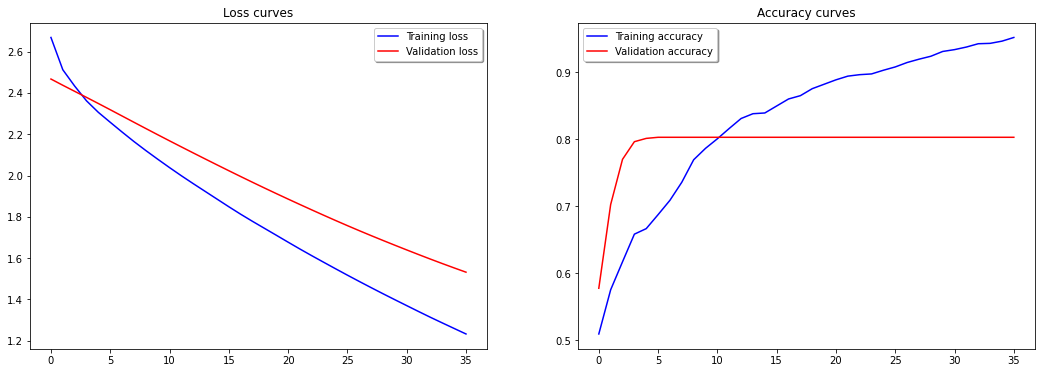

1     model_BadgerysCreek
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
-----------------------------------------------------------------
Training was completed in 13.53 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 80.2778%
test accuracy = 82.5581%
test error = 106 out of 608 examples


<Figure size 432x288 with 0 Axes>

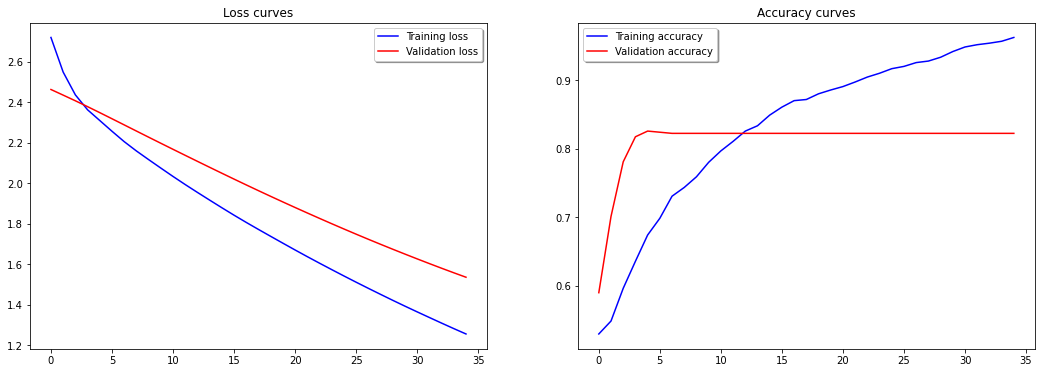

2     model_Cobar
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 13.23 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 87.1111%
test accuracy = 84.8837%
test error = 92 out of 608 examples


<Figure size 432x288 with 0 Axes>

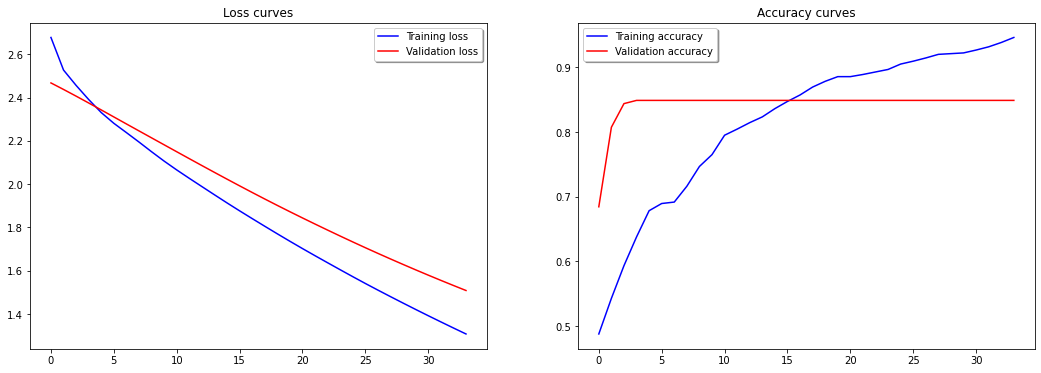

3     model_CoffsHarbour
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
-----------------------------------------------------------------
Training was completed in 13.12 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 69.3333%
test accuracy = 72.093%
test error = 170 out of 608 examples


<Figure size 432x288 with 0 Axes>

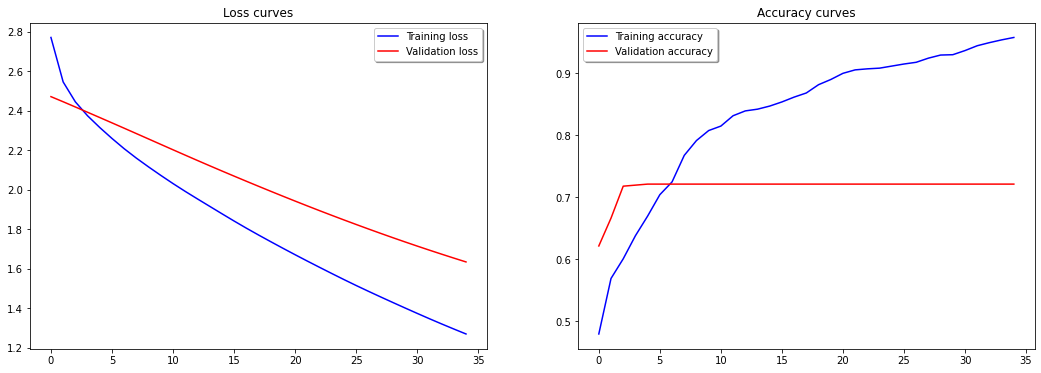

4     model_Moree
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 13.53 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 85.9444%
test accuracy = 85.0498%
test error = 91 out of 608 examples


<Figure size 432x288 with 0 Axes>

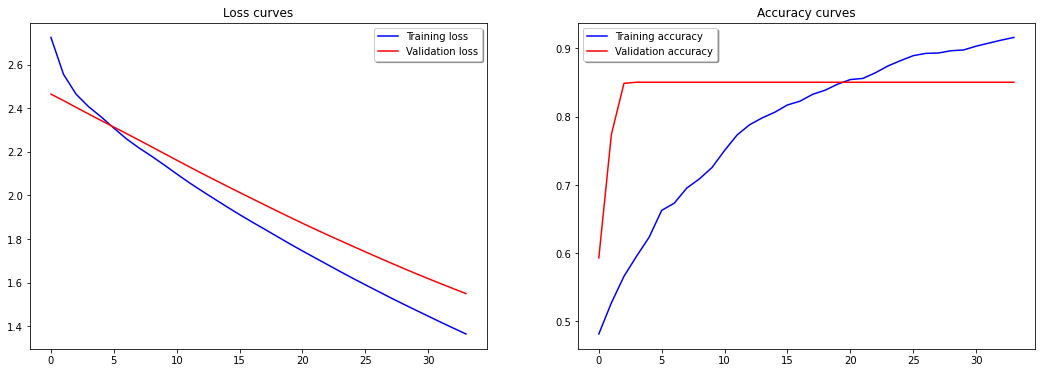

5     model_Newcastle
Train data dimensions: (1818, 6, 62), (1818, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.87 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 76.2926%
test accuracy = 74.3421%
test error = 156 out of 608 examples


<Figure size 432x288 with 0 Axes>

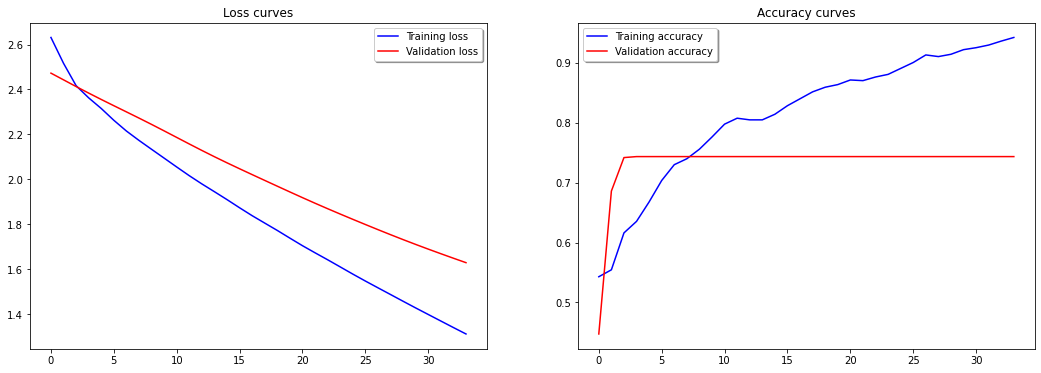

6     model_NorahHead
Train data dimensions: (1797, 6, 62), (1797, 1)
Test data dimensions: (601, 6, 62), (601, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.98 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.0679%
test accuracy = 72.213%
test error = 169 out of 608 examples


<Figure size 432x288 with 0 Axes>

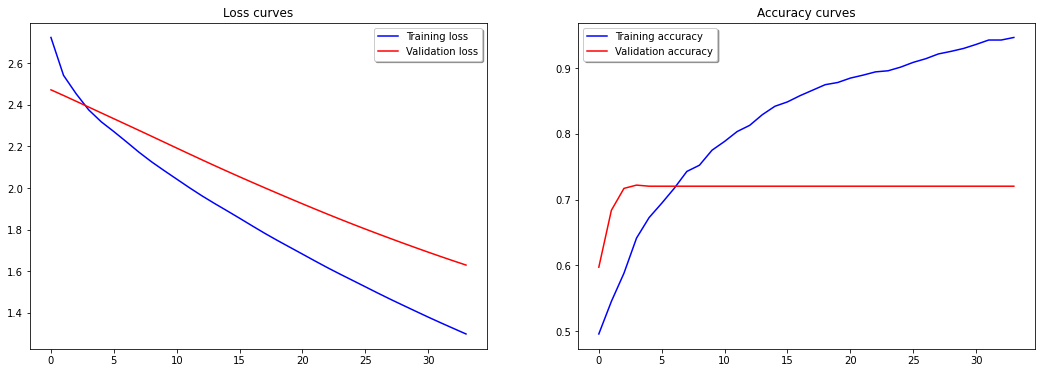

7     model_NorfolkIsland
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.53 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 69.9444%
test accuracy = 65.6146%
test error = 209 out of 608 examples


<Figure size 432x288 with 0 Axes>

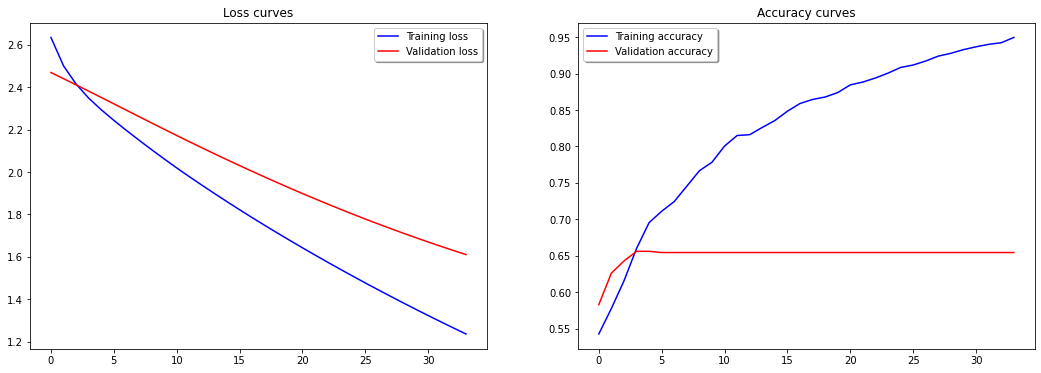

8     model_Penrith
Train data dimensions: (1818, 6, 62), (1818, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
-----------------------------------------------------------------
Training was completed in 13.16 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 80.7481%
test accuracy = 81.25%
test error = 114 out of 608 examples


<Figure size 432x288 with 0 Axes>

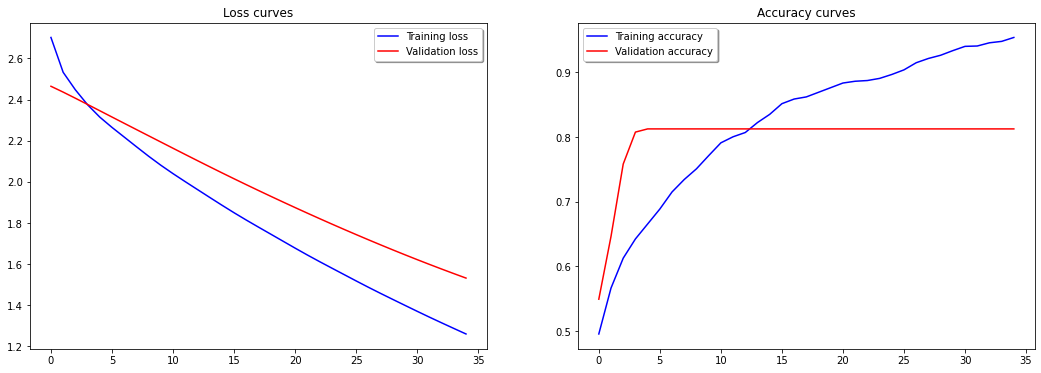

9     model_Richmond
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 13.19 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 82.0%
test accuracy = 80.7309%
test error = 117 out of 608 examples


<Figure size 432x288 with 0 Axes>

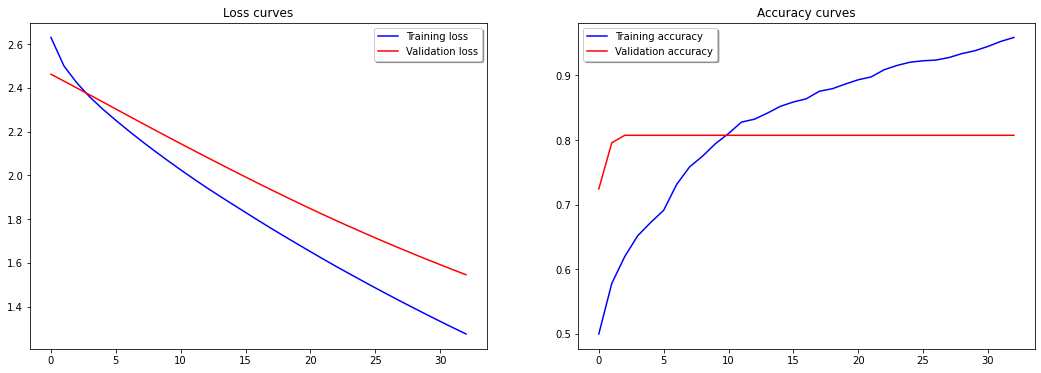

10     model_Sydney
Train data dimensions: (2001, 6, 62), (2001, 1)
Test data dimensions: (669, 6, 62), (669, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 19.81 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.8126%
test accuracy = 73.5197%
test error = 161 out of 608 examples


<Figure size 432x288 with 0 Axes>

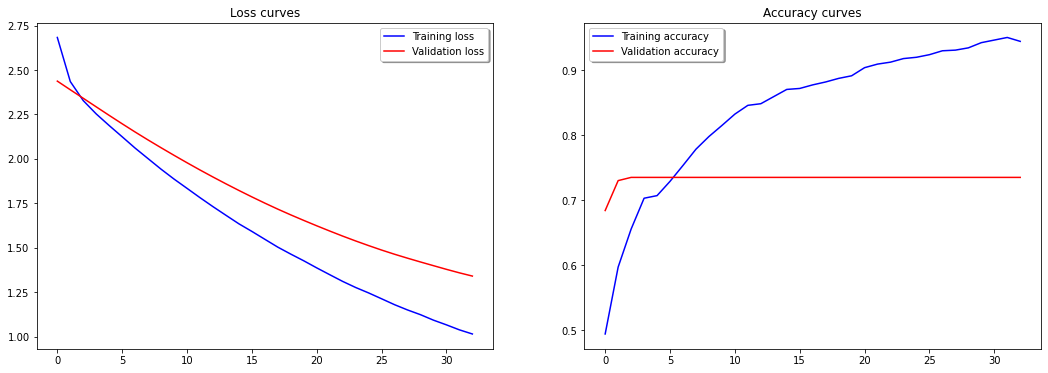

11     model_SydneyAirport
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 15.86 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.7778%
test accuracy = 75.0831%
test error = 151 out of 608 examples


<Figure size 432x288 with 0 Axes>

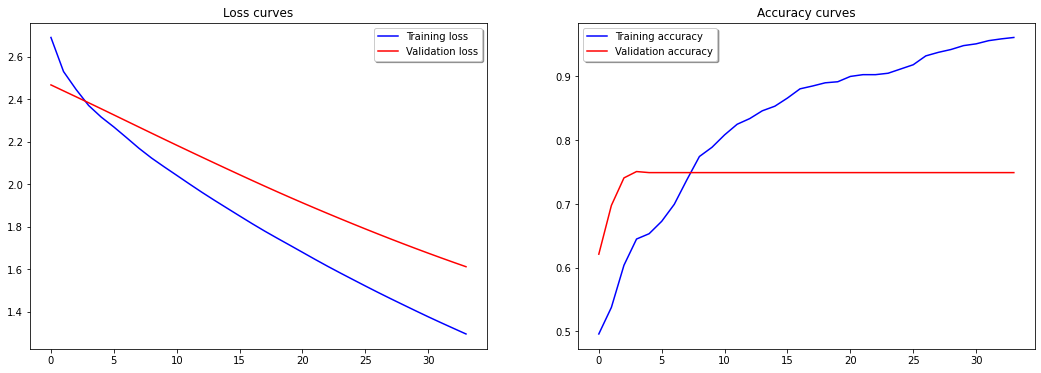

12     model_WaggaWagga
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
-----------------------------------------------------------------
Training was completed in 13.41 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 82.7222%
test accuracy = 79.7342%
test error = 123 out of 608 examples


<Figure size 432x288 with 0 Axes>

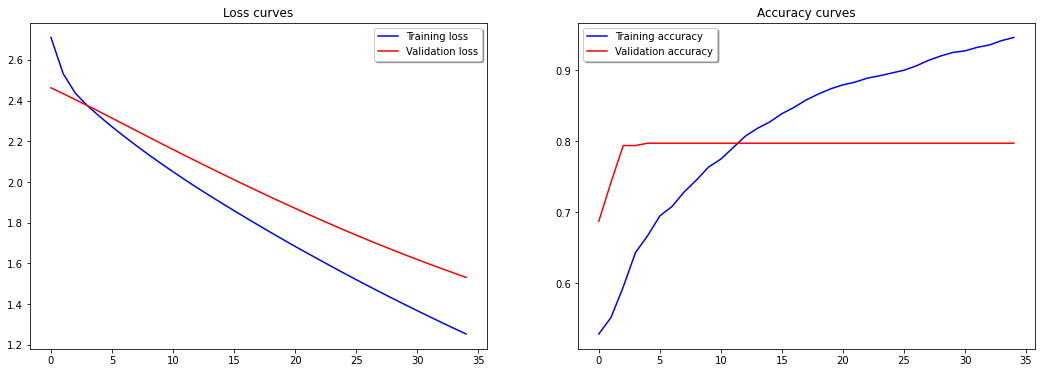

13     model_Williamtown
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 8.
Epoch 38: early stopping
-----------------------------------------------------------------
Training was completed in 12.87 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 71.2222%
test accuracy = 74.9169%
test error = 153 out of 608 examples


<Figure size 432x288 with 0 Axes>

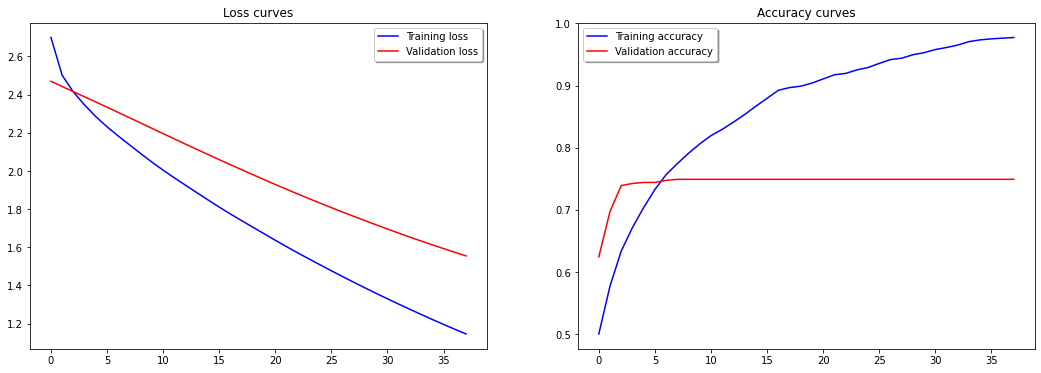

14     model_Wollongong
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 6.
Epoch 36: early stopping
-----------------------------------------------------------------
Training was completed in 8.24 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 76.4706%
test accuracy = 77.1382%
test error = 139 out of 608 examples


<Figure size 432x288 with 0 Axes>

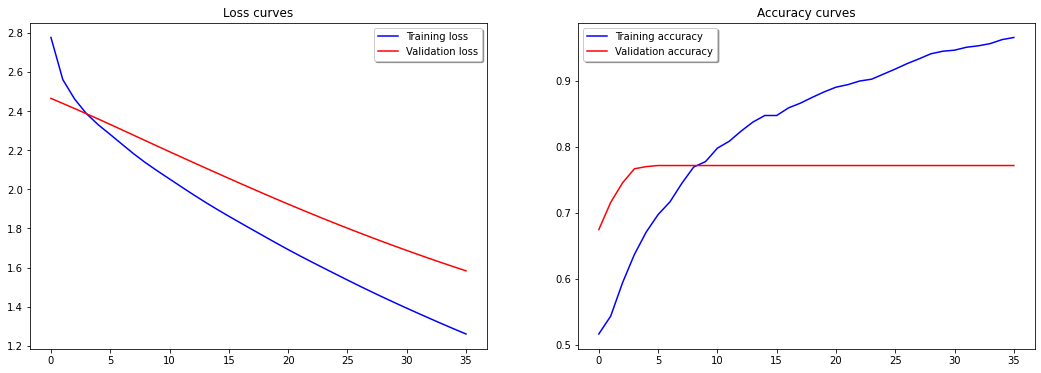

15     model_Canberra
Train data dimensions: (2056, 6, 62), (2056, 1)
Test data dimensions: (688, 6, 62), (688, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 15.10 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 81.4689%
test accuracy = 79.2763%
test error = 126 out of 608 examples


<Figure size 432x288 with 0 Axes>

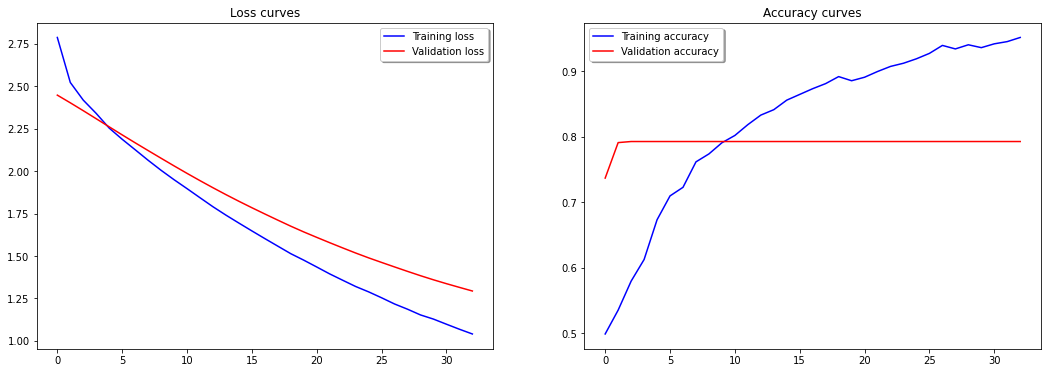

16     model_Tuggeranong
Train data dimensions: (1818, 6, 62), (1818, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 7.
Epoch 37: early stopping
-----------------------------------------------------------------
Training was completed in 13.55 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 81.4081%
test accuracy = 78.7829%
test error = 129 out of 608 examples


<Figure size 432x288 with 0 Axes>

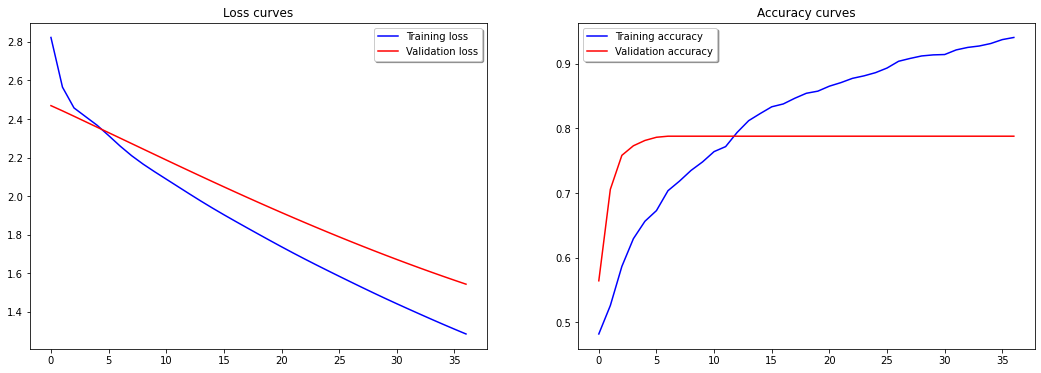

17     model_MountGinini
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 9.11 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 71.3029%
test accuracy = 71.875%
test error = 171 out of 608 examples


<Figure size 432x288 with 0 Axes>

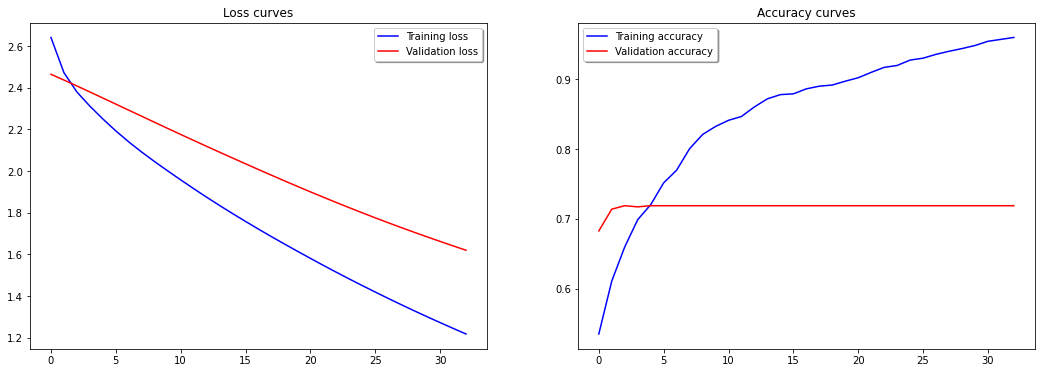

18     model_Ballarat
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 8.33 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.1616%
test accuracy = 75.0%
test error = 152 out of 608 examples


<Figure size 432x288 with 0 Axes>

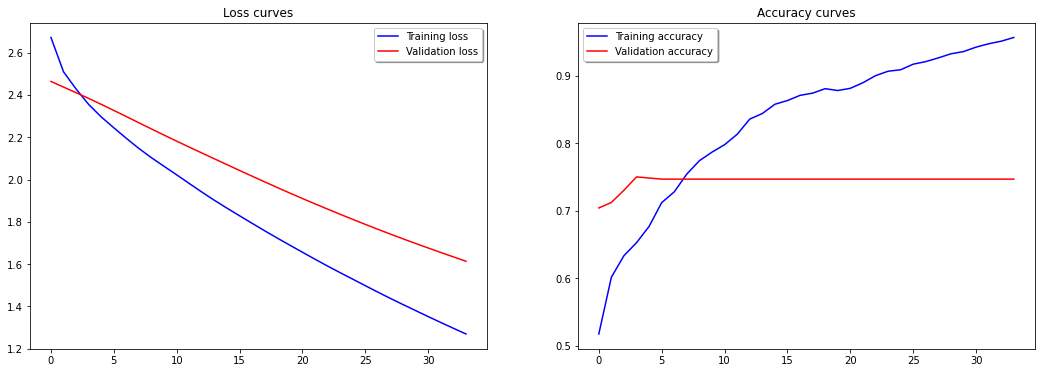

19     model_Bendigo
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
-----------------------------------------------------------------
Training was completed in 8.44 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 81.1435%
test accuracy = 80.7566%
test error = 117 out of 608 examples


<Figure size 432x288 with 0 Axes>

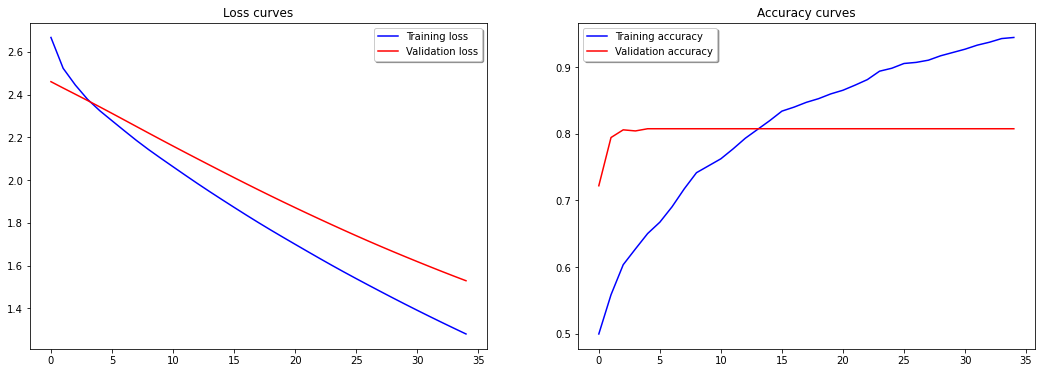

20     model_Sale
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.32 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 78.5556%
test accuracy = 80.0664%
test error = 121 out of 608 examples


<Figure size 432x288 with 0 Axes>

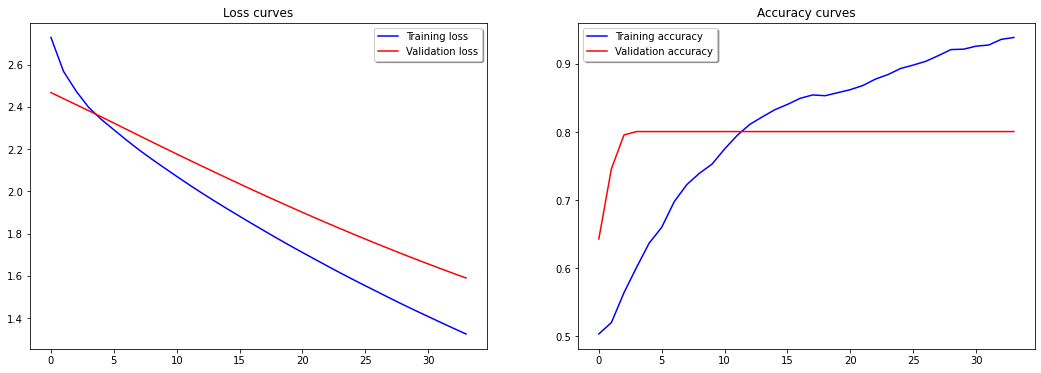

21     model_MelbourneAirport
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.41 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 78.2222%
test accuracy = 77.4086%
test error = 137 out of 608 examples


<Figure size 432x288 with 0 Axes>

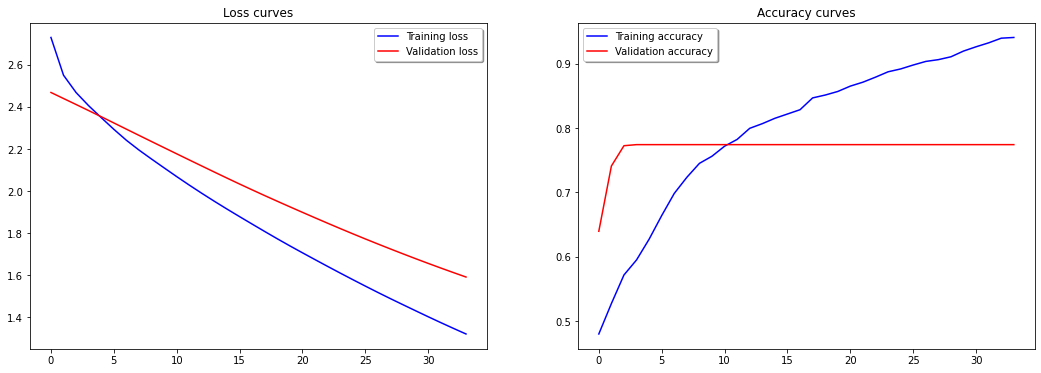

22     model_Melbourne
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 15.64 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 71.9895%
test accuracy = 82.7303%
test error = 105 out of 608 examples


<Figure size 432x288 with 0 Axes>

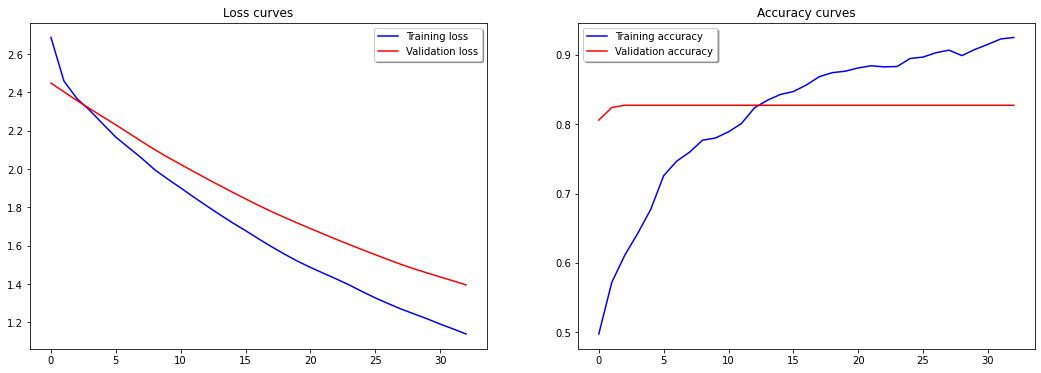

23     model_Mildura
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
-----------------------------------------------------------------
Training was completed in 13.18 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 88.3889%
test accuracy = 90.0332%
test error = 61 out of 608 examples


<Figure size 432x288 with 0 Axes>

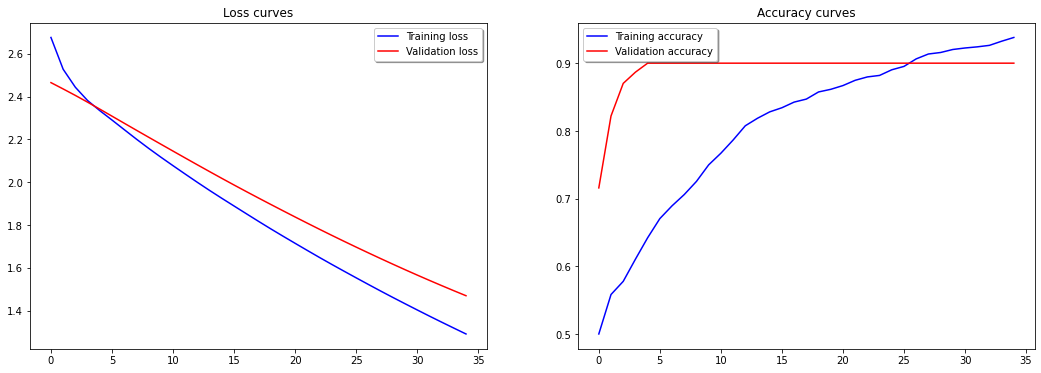

24     model_Nhil
Train data dimensions: (941, 6, 62), (941, 1)
Test data dimensions: (316, 6, 62), (316, 1)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
-----------------------------------------------------------------
Training was completed in 13.00 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 84.9097%
test accuracy = 84.8101%
test error = 92 out of 608 examples


<Figure size 432x288 with 0 Axes>

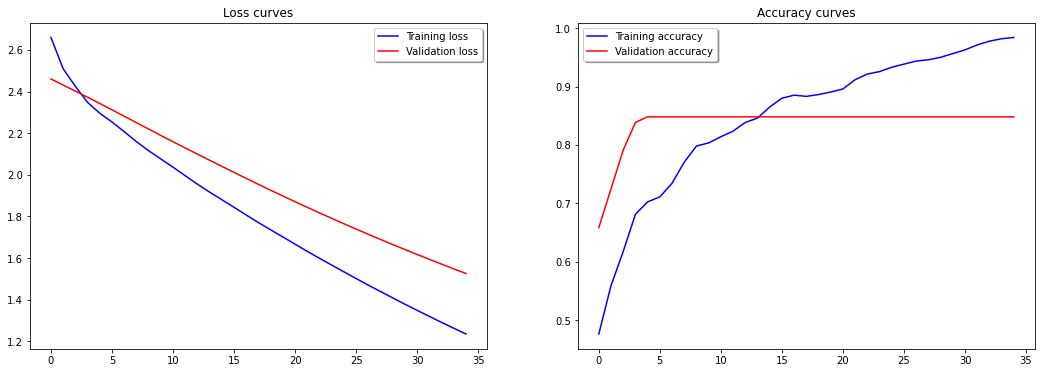

25     model_Portland
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
-----------------------------------------------------------------
Training was completed in 12.83 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 66.8333%
test accuracy = 67.2757%
test error = 199 out of 608 examples


<Figure size 432x288 with 0 Axes>

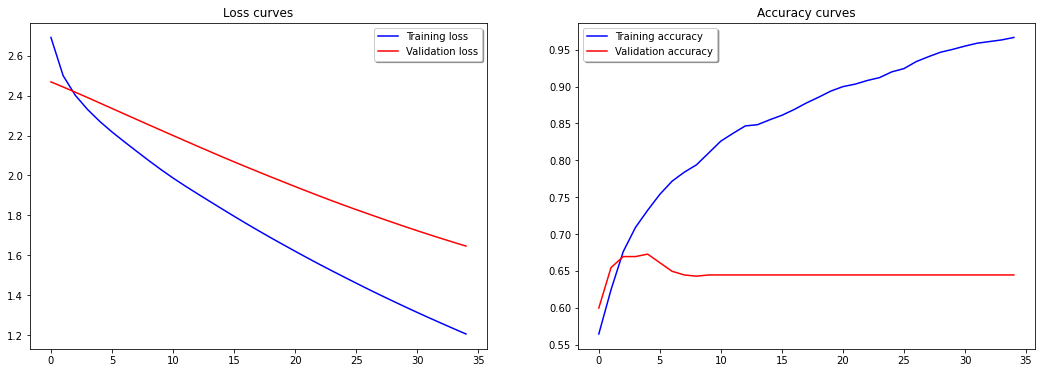

26     model_Watsonia
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
-----------------------------------------------------------------
Training was completed in 12.80 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.4444%
test accuracy = 76.2458%
test error = 144 out of 608 examples


<Figure size 432x288 with 0 Axes>

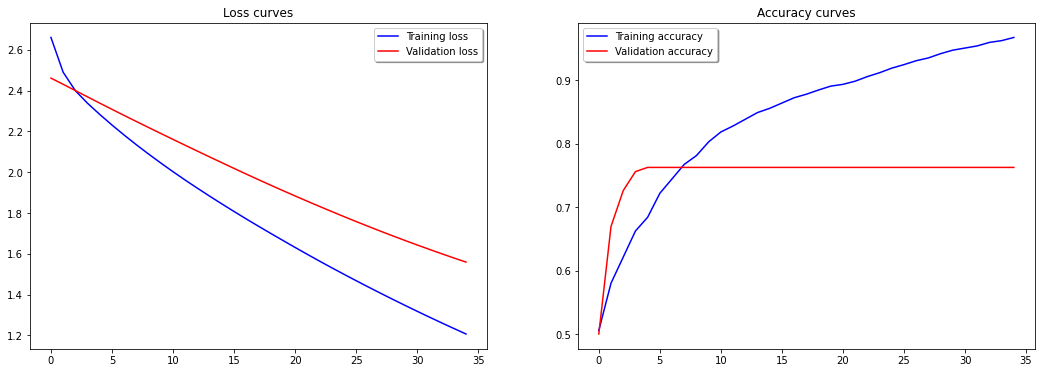

27     model_Dartmoor
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 11.83 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 70.0556%
test accuracy = 72.4252%
test error = 168 out of 608 examples


<Figure size 432x288 with 0 Axes>

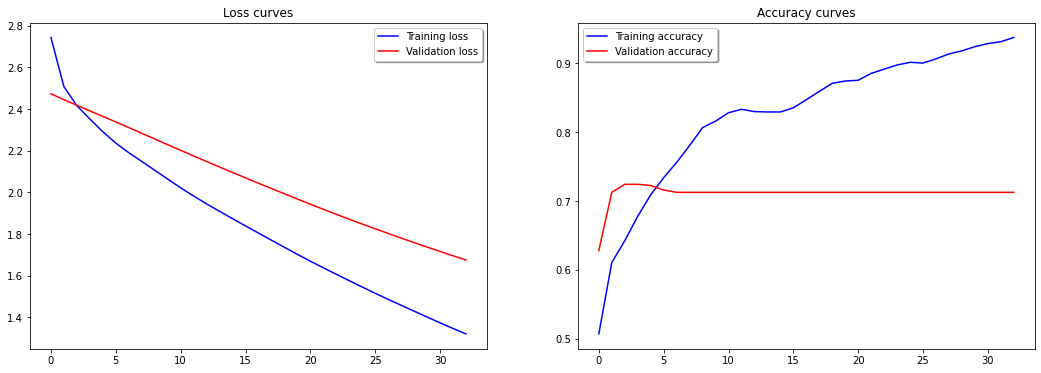

28     model_Brisbane
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 14.63 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 76.4398%
test accuracy = 79.7697%
test error = 123 out of 608 examples


<Figure size 432x288 with 0 Axes>

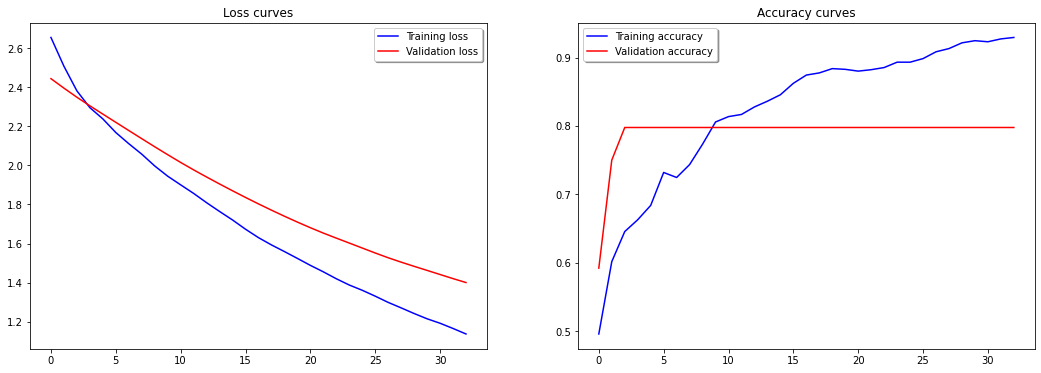

29     model_Cairns
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 9.40 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 72.5124%
test accuracy = 67.1053%
test error = 200 out of 608 examples


<Figure size 432x288 with 0 Axes>

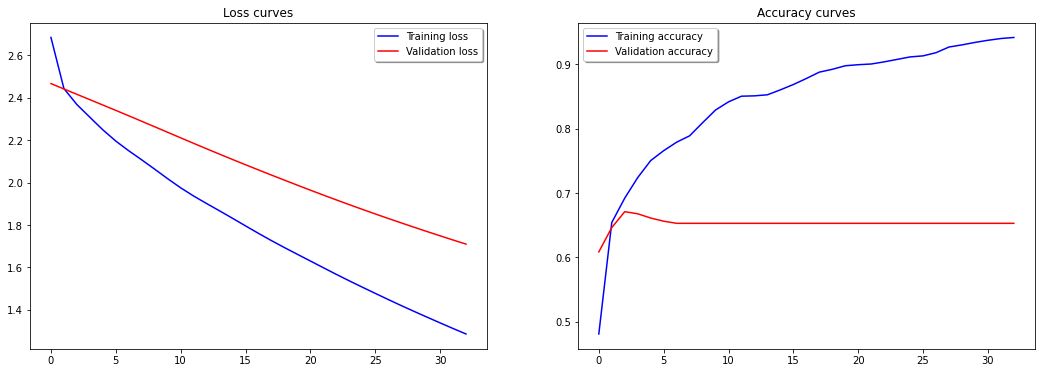

30     model_GoldCoast
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 6.
Epoch 36: early stopping
-----------------------------------------------------------------
Training was completed in 8.83 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 73.227%
test accuracy = 74.8355%
test error = 153 out of 608 examples


<Figure size 432x288 with 0 Axes>

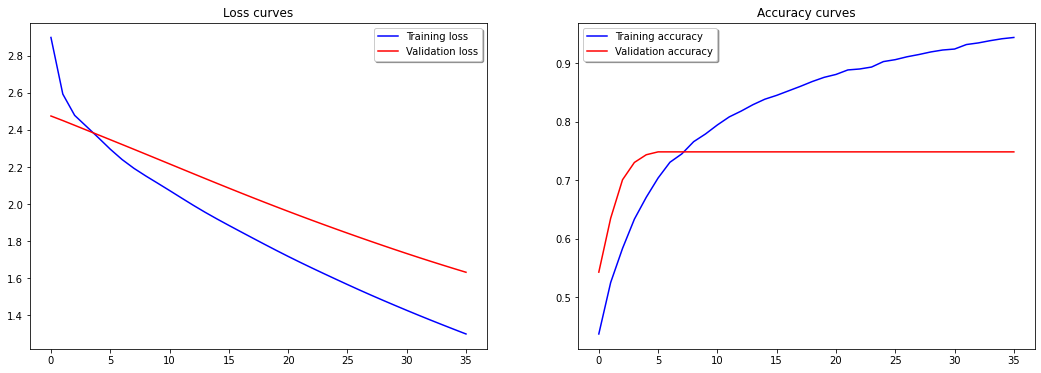

31     model_Townsville
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
-----------------------------------------------------------------
Training was completed in 7.99 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 82.8477%
test accuracy = 81.9079%
test error = 110 out of 608 examples


<Figure size 432x288 with 0 Axes>

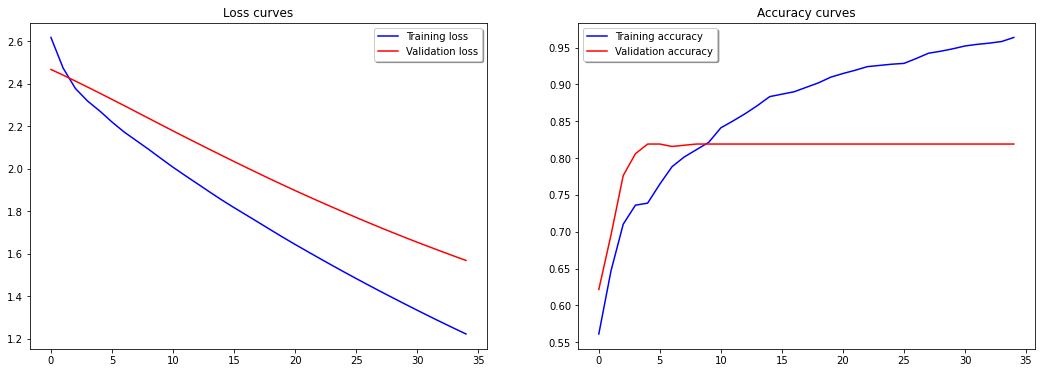

32     model_Adelaide
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 16.00 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 76.8586%
test accuracy = 80.0987%
test error = 121 out of 608 examples


<Figure size 432x288 with 0 Axes>

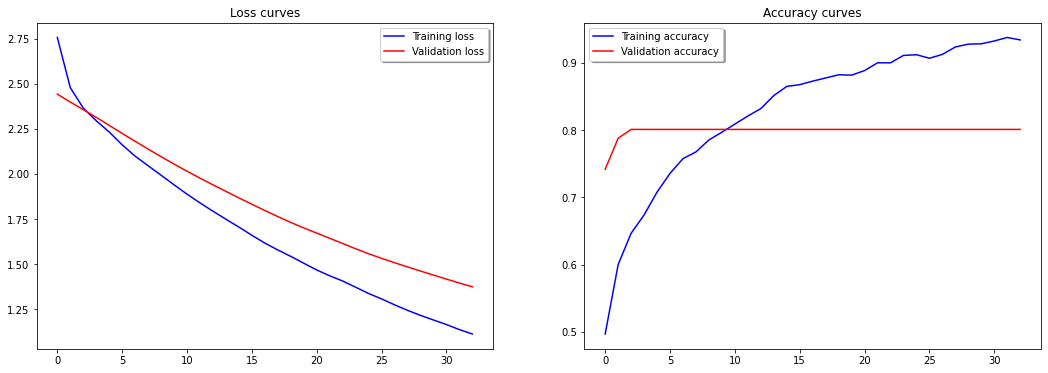

33     model_MountGambier
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 2.
Epoch 32: early stopping
-----------------------------------------------------------------
Training was completed in 8.01 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 70.6432%
test accuracy = 70.7237%
test error = 178 out of 608 examples


<Figure size 432x288 with 0 Axes>

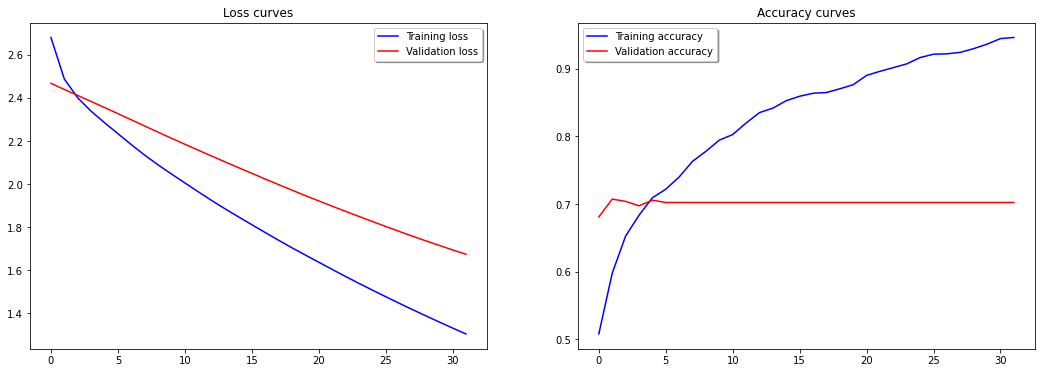

34     model_Nuriootpa
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 6.
Epoch 36: early stopping
-----------------------------------------------------------------
Training was completed in 12.86 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 80.3333%
test accuracy = 78.7375%
test error = 129 out of 608 examples


<Figure size 432x288 with 0 Axes>

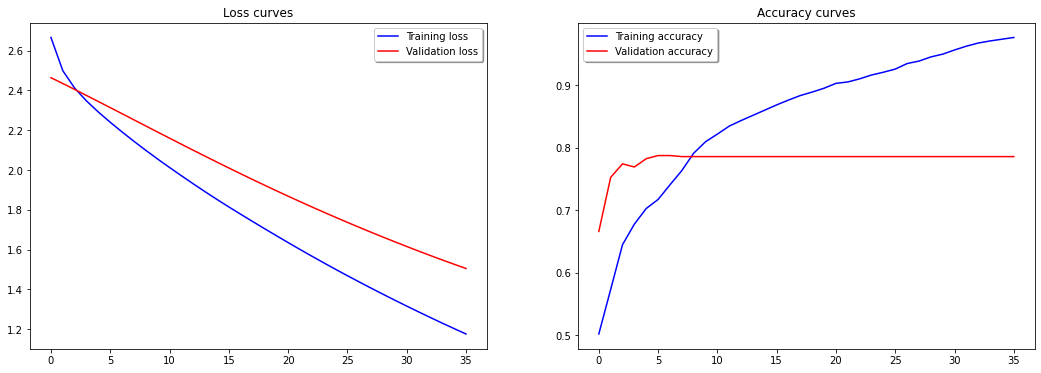

35     model_Woomera
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 14.20 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 93.0%
test accuracy = 92.0266%
test error = 48 out of 608 examples


<Figure size 432x288 with 0 Axes>

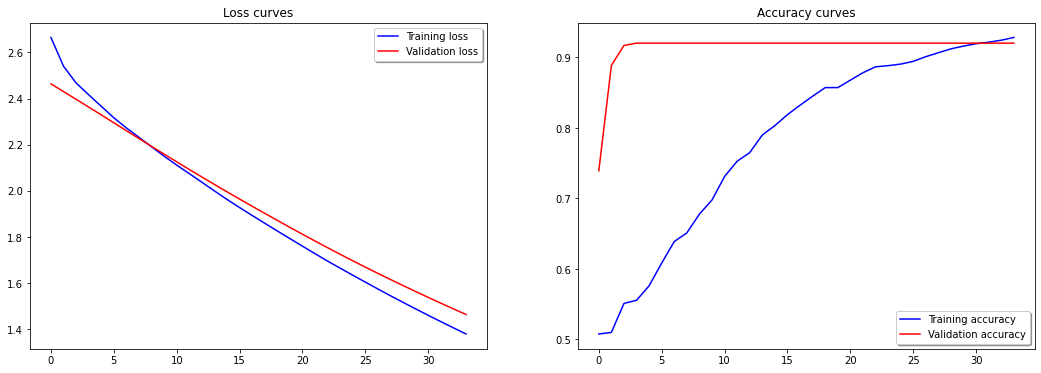

36     model_Albany
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 1.
Epoch 31: early stopping
-----------------------------------------------------------------
Training was completed in 7.97 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 68.1693%
test accuracy = 71.875%
test error = 171 out of 608 examples


<Figure size 432x288 with 0 Axes>

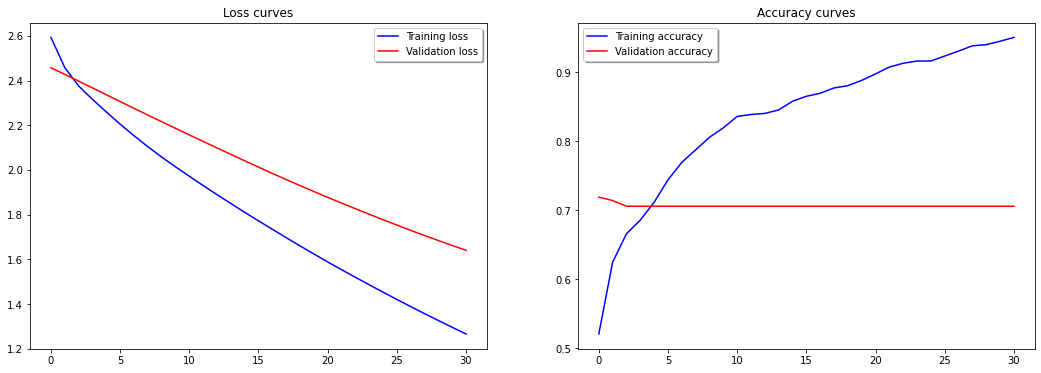

37     model_Witchcliffe
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 2.
Epoch 32: early stopping
-----------------------------------------------------------------
Training was completed in 12.24 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 73.7778%
test accuracy = 73.7542%
test error = 160 out of 608 examples


<Figure size 432x288 with 0 Axes>

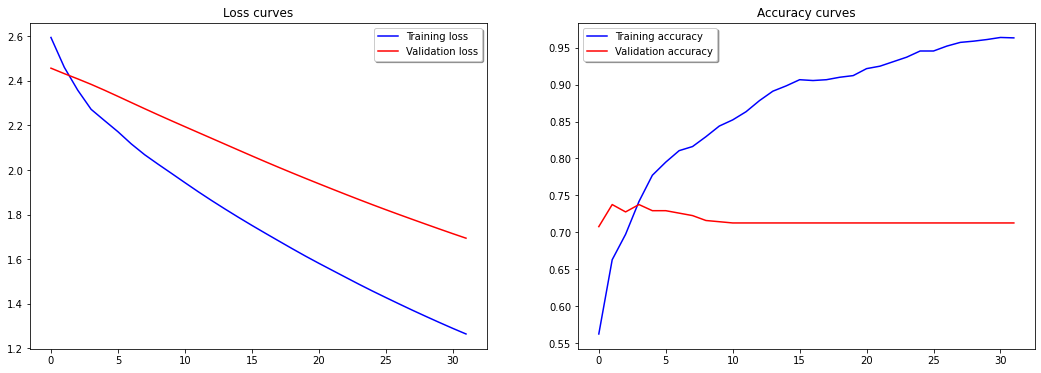

38     model_PearceRAAF
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 5.
Epoch 35: early stopping
-----------------------------------------------------------------
Training was completed in 13.19 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 82.7222%
test accuracy = 82.2259%
test error = 108 out of 608 examples


<Figure size 432x288 with 0 Axes>

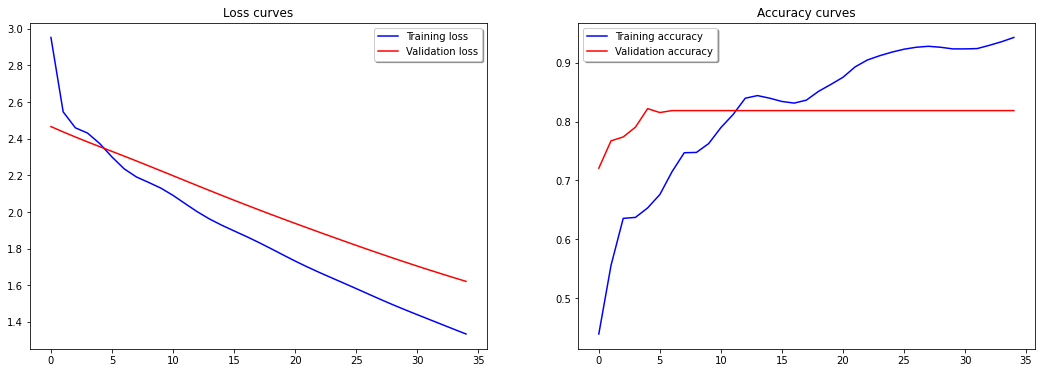

39     model_PerthAirport
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.87 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 82.5%
test accuracy = 82.5581%
test error = 106 out of 608 examples


<Figure size 432x288 with 0 Axes>

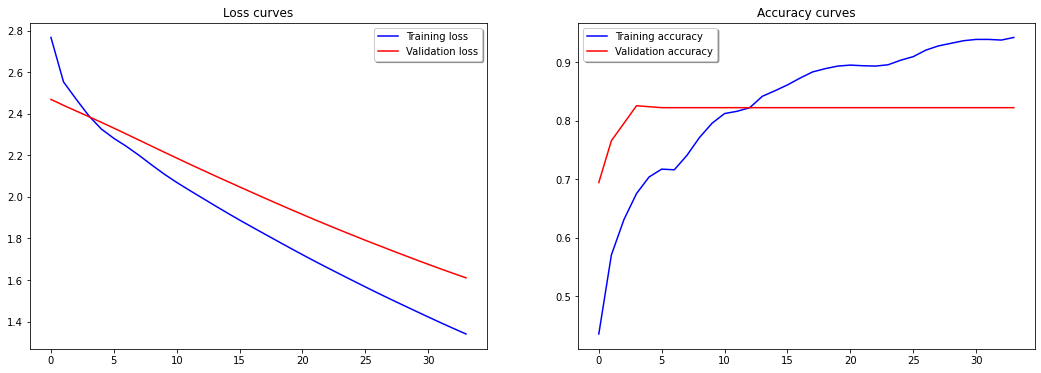

40     model_Perth
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 14.73 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 80.0524%
test accuracy = 79.4408%
test error = 125 out of 608 examples


<Figure size 432x288 with 0 Axes>

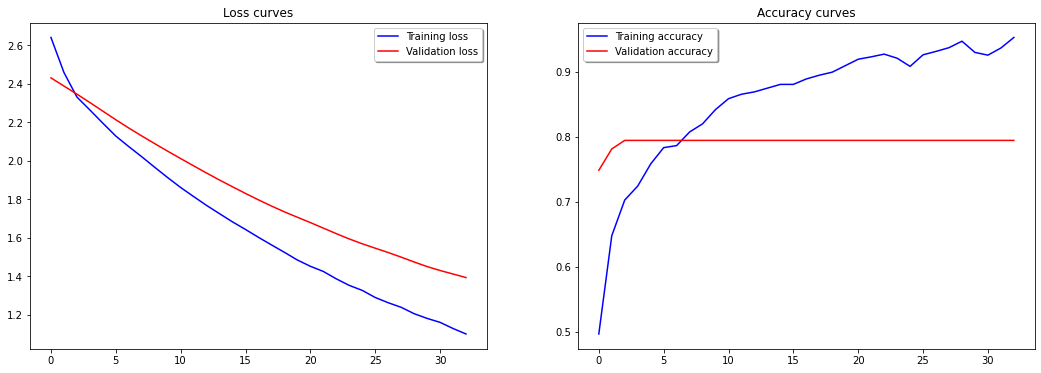

41     model_SalmonGums
Train data dimensions: (1795, 6, 62), (1795, 1)
Test data dimensions: (601, 6, 62), (601, 1)


Restoring model weights from the end of the best epoch: 6.
Epoch 36: early stopping
-----------------------------------------------------------------
Training was completed in 12.60 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 84.8468%
test accuracy = 82.8619%
test error = 104 out of 608 examples


<Figure size 432x288 with 0 Axes>

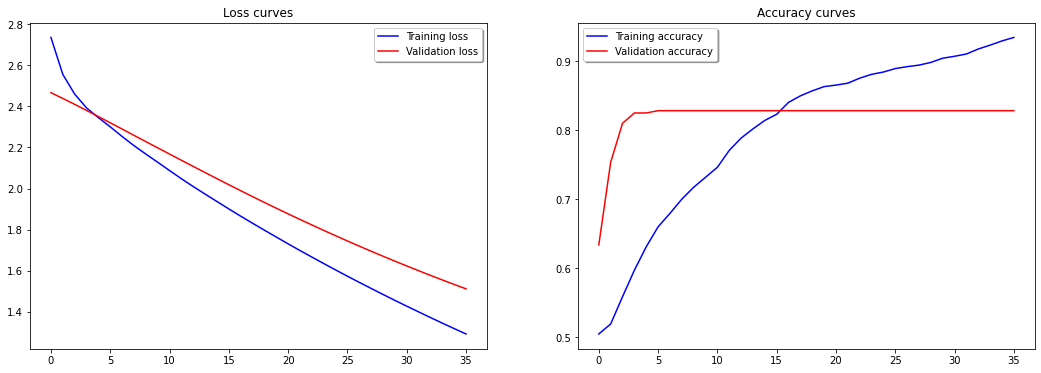

42     model_Walpole
Train data dimensions: (1798, 6, 62), (1798, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.70 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 70.0779%
test accuracy = 68.1063%
test error = 194 out of 608 examples


<Figure size 432x288 with 0 Axes>

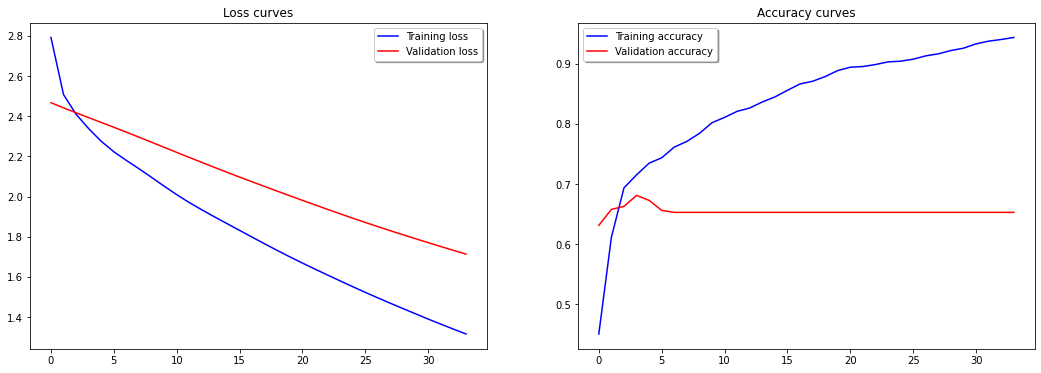

43     model_Hobart
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 15.56 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 75.8639%
test accuracy = 76.8092%
test error = 141 out of 608 examples


<Figure size 432x288 with 0 Axes>

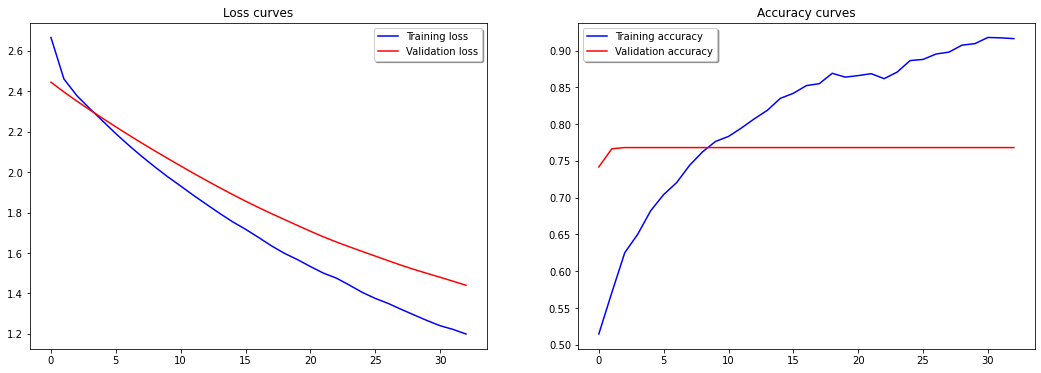

44     model_Launceston
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 10.81 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 75.8659%
test accuracy = 77.4671%
test error = 137 out of 608 examples


<Figure size 432x288 with 0 Axes>

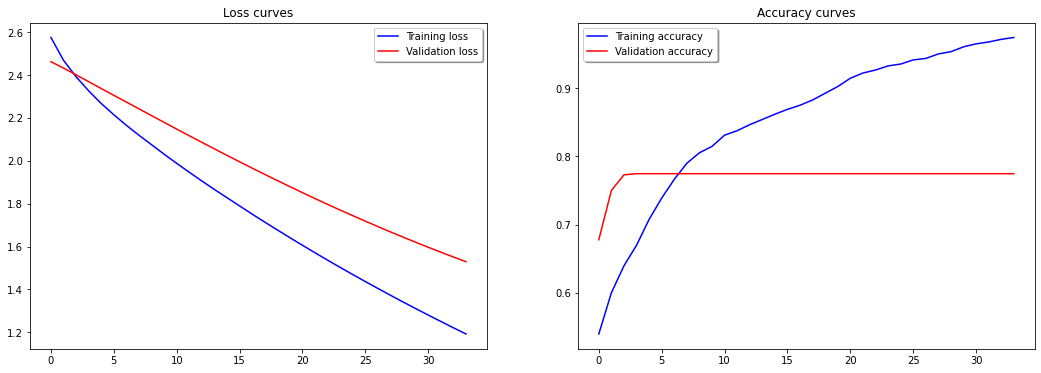

45     model_AliceSprings
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 6.
Epoch 36: early stopping
-----------------------------------------------------------------
Training was completed in 8.09 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 91.3139%
test accuracy = 89.9671%
test error = 61 out of 608 examples


<Figure size 432x288 with 0 Axes>

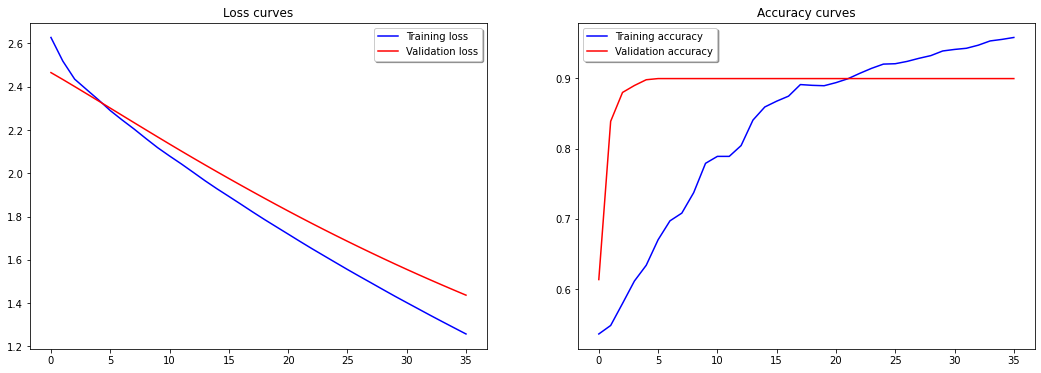

46     model_Darwin
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


Restoring model weights from the end of the best epoch: 2.
Epoch 32: early stopping
-----------------------------------------------------------------
Training was completed in 15.84 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 80.4188%
test accuracy = 75.6579%
test error = 148 out of 608 examples


<Figure size 432x288 with 0 Axes>

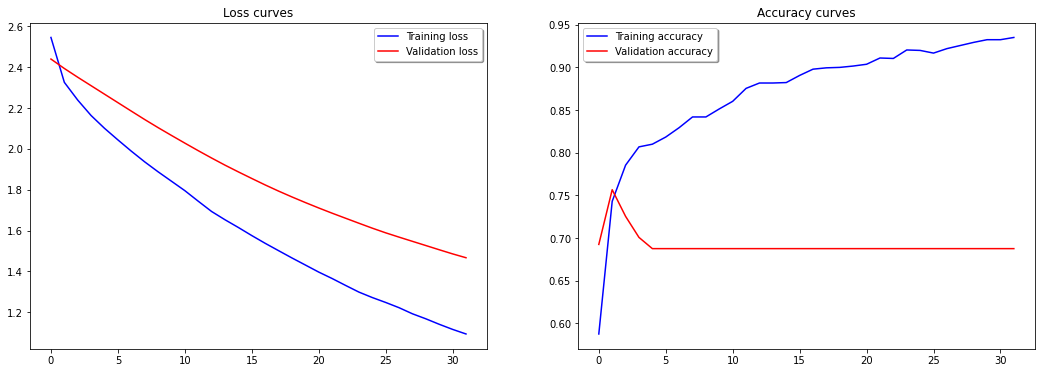

47     model_Katherine
Train data dimensions: (941, 6, 62), (941, 1)
Test data dimensions: (316, 6, 62), (316, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 13.03 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 86.61%
test accuracy = 79.7468%
test error = 123 out of 608 examples


<Figure size 432x288 with 0 Axes>

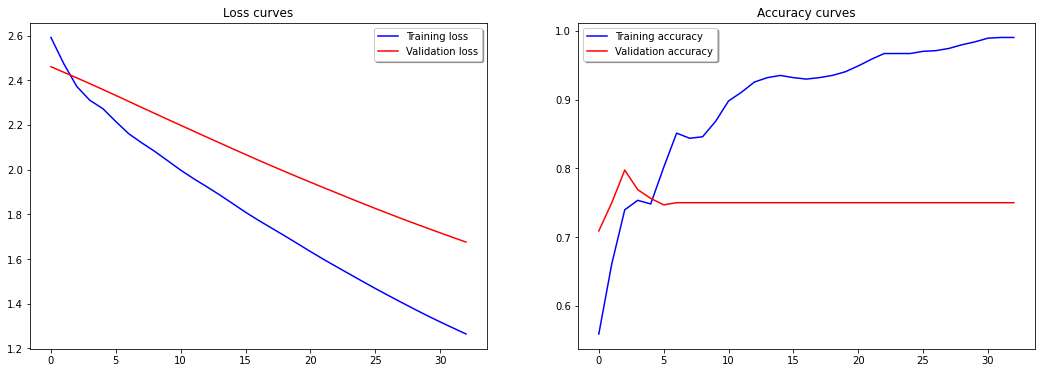

48     model_Uluru
Train data dimensions: (941, 6, 62), (941, 1)
Test data dimensions: (316, 6, 62), (316, 1)


Restoring model weights from the end of the best epoch: 7.
Epoch 37: early stopping
-----------------------------------------------------------------
Training was completed in 13.05 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 93.7301%
test accuracy = 89.2405%
test error = 65 out of 608 examples


<Figure size 432x288 with 0 Axes>

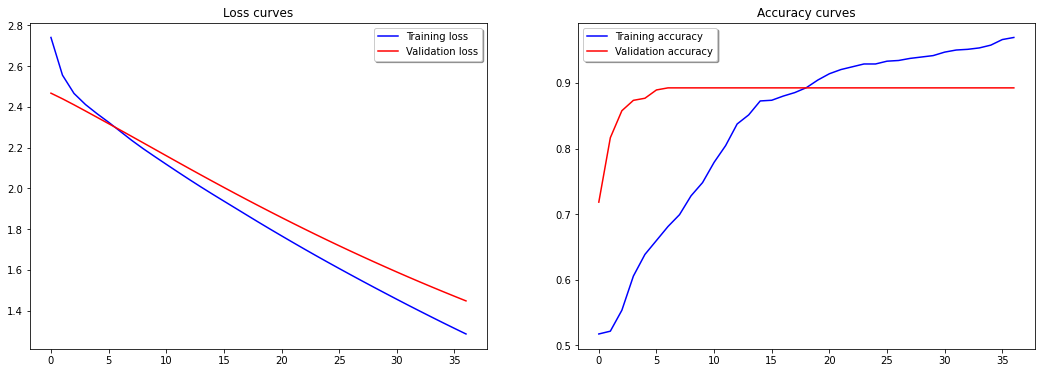

In [26]:
lcl = locals()
c=0
for city in df.Location.unique():
    print(c, "   " ,f"model_{city}")
    c+=1
    d1 = df[df.Location==city]
    d1.pop("Location")
    # Split train and test data
    train_features = d1.iloc[:int(d1.shape[0]*0.6)]
    train_labels = d1.iloc[:int(d1.shape[0]*0.6) , -1]

    val_features = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8)]
    val_labels = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8), -1]

    test_features = d1.iloc[int(d1.shape[0]*0.8):]
    test_labels = d1.iloc[int(d1.shape[0]*0.8):, -1]

    T = 5+1  # my choice of the timesteps window

    prepend_features = train_features.iloc[-(T-1):]
    test_features = pd.concat([prepend_features, test_features], axis=0)

    train_features.shape, train_labels.shape, test_features.shape, test_labels.shape , val_features.shape ,val_labels.shape

    # Rescale the features
    from sklearn.preprocessing import StandardScaler  # MinMaxScaler

    scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
    scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                         index=train_features.index,
                                         columns=train_features.columns)
    # The Scaler is fit on the training set and then applied to the test set
    scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                        index=test_features.index,
                                        columns=test_features.columns)

    scaled_train_features.shape, scaled_test_features.shape
    
    # Create sequences of T timesteps
    X_train, y_train = [], []
    for i in range(train_labels.shape[0] - (T-1)):
        X_train.append(scaled_train_features.iloc[i:i+T].values)
        y_train.append(train_labels.iloc[i + (T-1)])
    X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
    print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

    X_test, y_test = [], []
    for i in range(test_labels.shape[0]):
        X_test.append(scaled_test_features.iloc[i:i+T].values)
        y_test.append(test_labels.iloc[i])
    X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

    print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')
    
    N = X_train.shape[2]

    #create model
    # Build the model
    lcl[f"model_{city}"] = Sequential()
    lcl[f"model_{city}"].add(LSTM(input_shape=(T, N), units=LAYERS[0],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(LSTM(units=LAYERS[1],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(LSTM(units=LAYERS[2],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=False, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(Dense(units=LAYERS[3], activation='sigmoid'))

    # Compile the model with Adam optimizer
    lcl[f"model_{city}"].compile(loss='binary_crossentropy',
                  metrics=['accuracy'],
                  optimizer=Adam(lr=LR))

    # Define a learning rate decay method:
    lr_decay = ReduceLROnPlateau(monitor='loss', 
                                 patience=1, verbose=0, 
                                 factor=0.5, min_lr=1e-8)
    # Define Early Stopping:
    early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                               patience=30, verbose=1, mode='auto',
                               baseline=0, restore_best_weights=True)
    
    
    
    # Train the model. 
    # The dataset is small for NN - let's use test_data for validation
    start = time()
    History = lcl[f"model_{city}"].fit(X_train, y_train,
                        epochs=EPOCH,
                        batch_size=BATCH,
                        validation_split=0.0,
                        validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                        shuffle=True,verbose=0,
                        callbacks=[lr_decay, early_stop])
    print('-'*65)
    print(f'Training was completed in {time() - start:.2f} secs')
    print('-'*65)
    # Evaluate the model:
    train_loss, train_acc = lcl[f"model_{city}"].evaluate(X_train, y_train,
                                           batch_size=M_TRAIN, verbose=0)
    test_loss, test_acc = lcl[f"model_{city}"].evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                         batch_size=M_TEST, verbose=0)
    print('-'*65)
    print(f'train accuracy = {round(train_acc * 100, 4)}%')
    print(f'test accuracy = {round(test_acc * 100, 4)}%')
    print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

    # Plot the loss and accuracy curves over epochs:
    plt.figure()
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    axs[0].plot(History.history['loss'], color='b', label='Training loss')
    axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
    axs[0].set_title("Loss curves")
    axs[0].legend(loc='best', shadow=True)
    axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
    axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
    axs[1].set_title("Accuracy curves")
    axs[1].legend(loc='best', shadow=True)
    plt.show()
    print("========"*15)
    print("========"*15)
    print("========"*15)

In [27]:
lcl[f"model_{city}"]

In [28]:
model_Albury.fit(X_train, y_train,
                        epochs=EPOCH,
                        batch_size=BATCH,
                        validation_split=0.0,
                        validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                        shuffle=True,verbose=0,
                        callbacks=[lr_decay, early_stop])

Restoring model weights from the end of the best epoch: 1.
Epoch 31: early stopping


In [29]:
X_train.shape

(941, 6, 62)

In [30]:
MODEL = {"Albury":model_Albury,
         "BadgerysCreek":model_BadgerysCreek,
         "Cobar":model_Cobar,
         "CoffsHarbour":model_CoffsHarbour,
         "Moree":model_Moree,
         "Newcastle":model_Newcastle,
         "NorahHead":model_NorahHead,
         "NorfolkIsland":model_NorfolkIsland,
         "Penrith":model_Penrith,
         "Richmond":model_Richmond,
         "Sydney":model_Sydney,
         "SydneyAirport":model_SydneyAirport,
         "WaggaWagga":model_WaggaWagga,
         "Williamtown":model_Williamtown,
         "Wollongong":model_Wollongong,
         "Canberra":model_Canberra,
         "Tuggeranong":model_Tuggeranong,
         "MountGinini":model_MountGinini,
         "Ballarat":model_Ballarat,
         "Bendigo":model_Bendigo,
         "Sale":model_Sale,
         "MelbourneAirport":model_MelbourneAirport,
         "Melbourne":model_Melbourne,
         "Mildura":model_Mildura,
         "Nhil":model_Nhil,
         "Portland":model_Portland,
         "Watsonia":model_Watsonia,
         "Dartmoor":model_Dartmoor,
         "Brisbane":model_Brisbane,
         "Cairns":model_Cairns,
         "GoldCoast":model_GoldCoast,
         "Townsville":model_Townsville,
         "Adelaide":model_Adelaide,
         "MountGambier":model_MountGambier,
         "Nuriootpa":model_Nuriootpa,
         "Woomera":model_Woomera,
         "Albany":model_Albany,
         "Witchcliffe":model_Witchcliffe,
         "PearceRAAF":model_PearceRAAF,
         "PerthAirport":model_PerthAirport,
         "Perth":model_Perth,
         "SalmonGums":model_SalmonGums,
         "Walpole":model_Walpole,
         "Hobart":model_Hobart,
         "Launceston":model_Launceston,
         "AliceSprings":model_AliceSprings,
         "Darwin":model_Darwin,
         "Katherine":model_Katherine,
         "Uluru":model_Uluru,}

# new data

In [31]:
df_test = df.iloc[69395 : 71395]
lcl = locals()
for city in df_test.Location.unique():
    print(city)
    lcl[f"df_{city}"] = df_test[df_test.Location==city]
    model = MODEL[city]
    # pre_processing of df_test
    # predicte with model

Melbourne
Mildura


# T=3 window

0     model_Albury


Train data dimensions: (1821, 4, 62), (1821, 1)
Test data dimensions: (608, 4, 62), (608, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 14.22 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 79.1873%
test accuracy = 80.2632%
test error = 120 out of 608 examples


<Figure size 432x288 with 0 Axes>

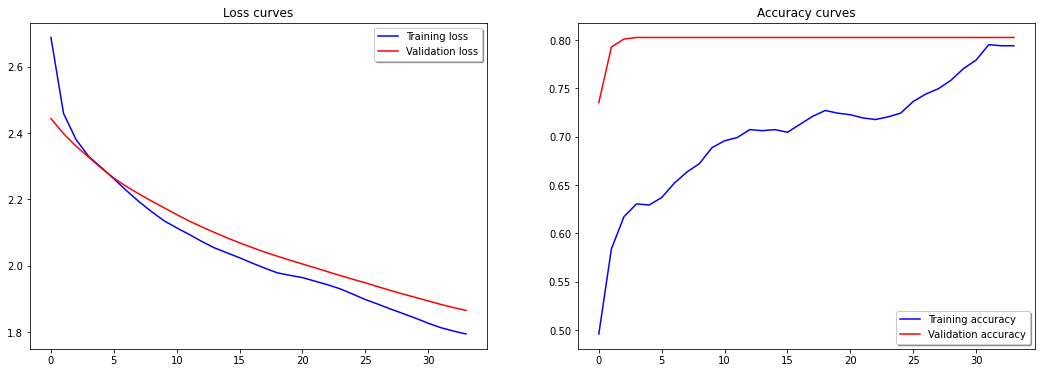

1     model_BadgerysCreek
Train data dimensions: (1802, 4, 62), (1802, 1)
Test data dimensions: (602, 4, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.20 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 80.0777%
test accuracy = 82.392%
test error = 107 out of 608 examples


<Figure size 432x288 with 0 Axes>

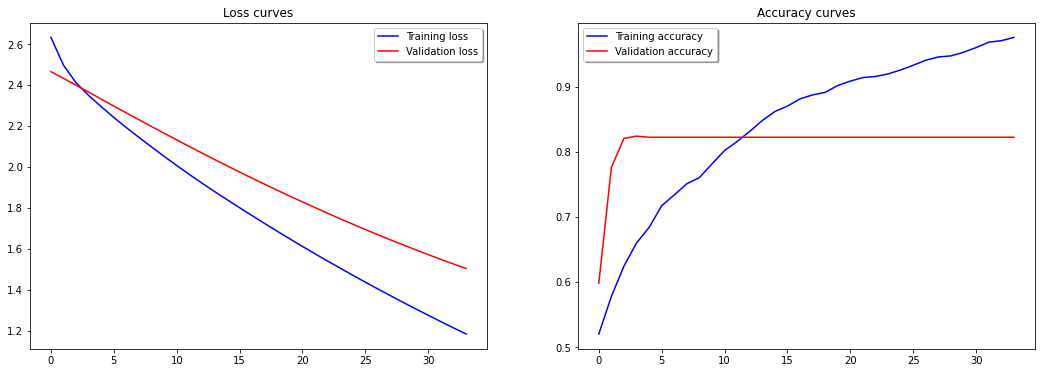

2     model_Cobar
Train data dimensions: (1802, 4, 62), (1802, 1)
Test data dimensions: (602, 4, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.01 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 87.1254%
test accuracy = 85.0498%
test error = 91 out of 608 examples


<Figure size 432x288 with 0 Axes>

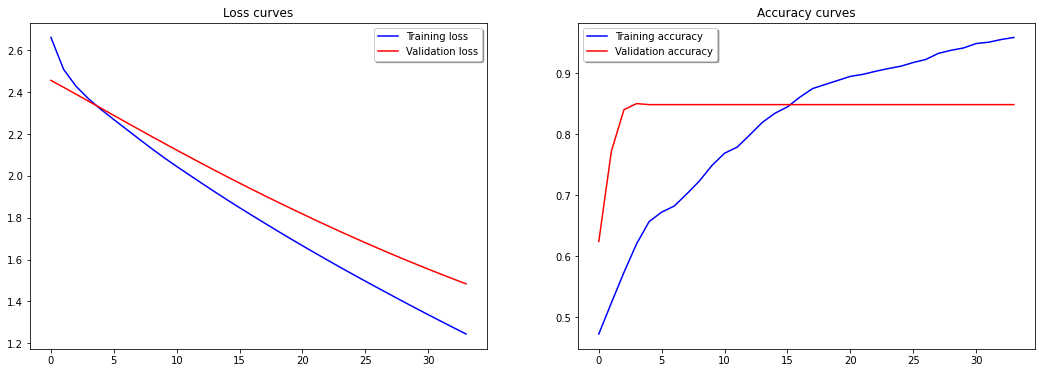

3     model_CoffsHarbour
Train data dimensions: (1802, 4, 62), (1802, 1)
Test data dimensions: (602, 4, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.19 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 70.8102%
test accuracy = 73.0897%
test error = 164 out of 608 examples


<Figure size 432x288 with 0 Axes>

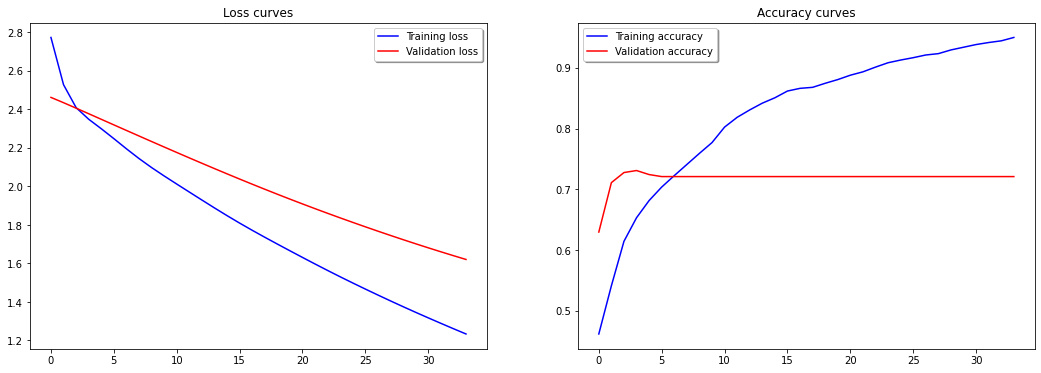

4     model_Moree
Train data dimensions: (1802, 4, 62), (1802, 1)
Test data dimensions: (602, 4, 62), (602, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 11.75 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 86.4595%
test accuracy = 85.5482%
test error = 88 out of 608 examples


<Figure size 432x288 with 0 Axes>

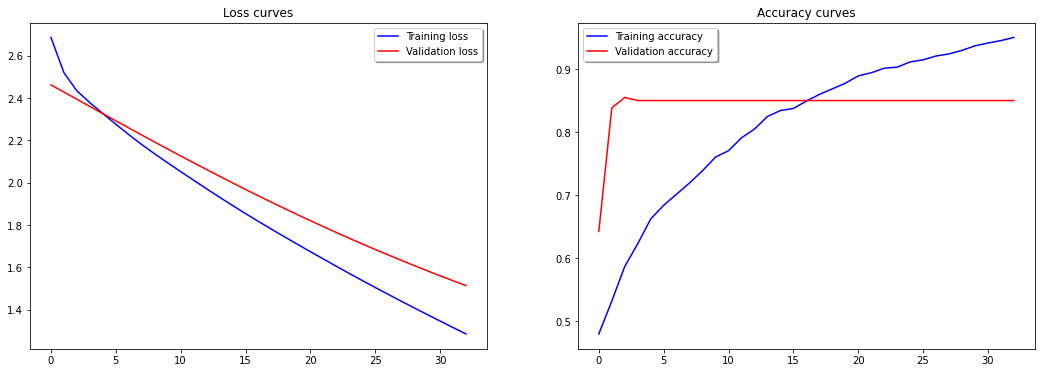

5     model_Newcastle
Train data dimensions: (1820, 4, 62), (1820, 1)
Test data dimensions: (608, 4, 62), (608, 1)


Restoring model weights from the end of the best epoch: 1.
Epoch 31: early stopping
-----------------------------------------------------------------
Training was completed in 15.35 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 72.5275%
test accuracy = 75.0%
test error = 152 out of 608 examples


<Figure size 432x288 with 0 Axes>

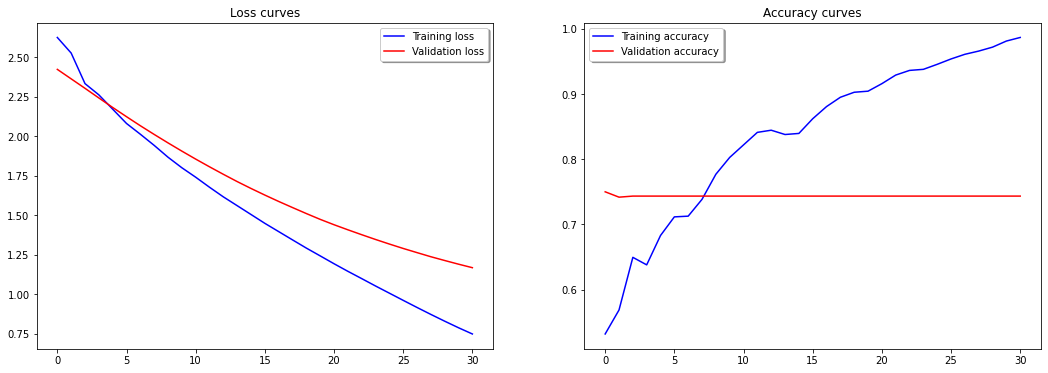

6     model_NorahHead
Train data dimensions: (1799, 4, 62), (1799, 1)
Test data dimensions: (601, 4, 62), (601, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.32 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.597%
test accuracy = 72.5458%
test error = 167 out of 608 examples


<Figure size 432x288 with 0 Axes>

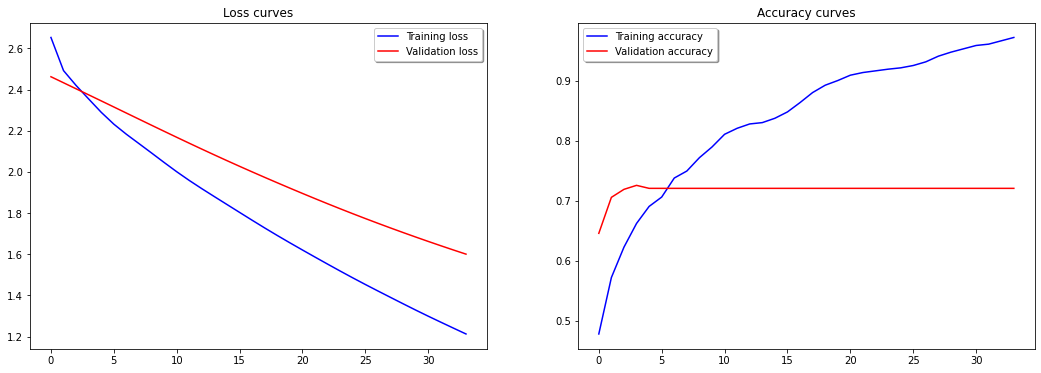

7     model_NorfolkIsland
Train data dimensions: (1802, 4, 62), (1802, 1)
Test data dimensions: (602, 4, 62), (602, 1)


Restoring model weights from the end of the best epoch: 2.
Epoch 32: early stopping
-----------------------------------------------------------------
Training was completed in 12.32 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 69.2564%
test accuracy = 67.608%
test error = 197 out of 608 examples


<Figure size 432x288 with 0 Axes>

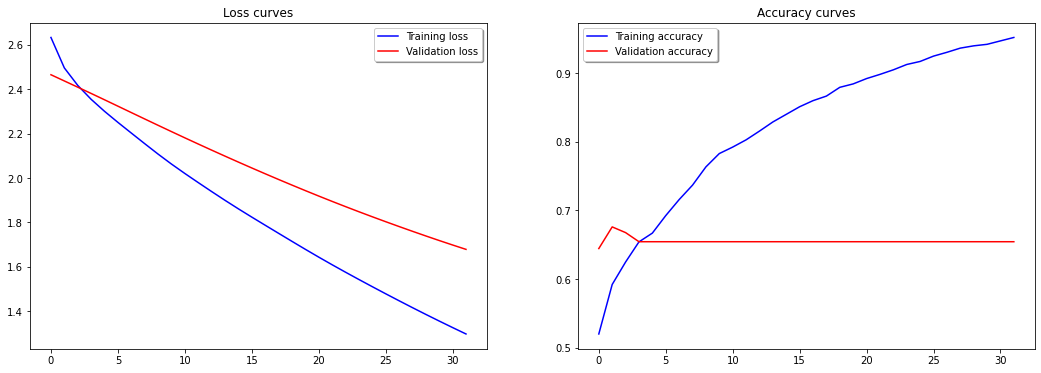

8     model_Penrith
Train data dimensions: (1820, 4, 62), (1820, 1)
Test data dimensions: (608, 4, 62), (608, 1)


Restoring model weights from the end of the best epoch: 2.
Epoch 32: early stopping
-----------------------------------------------------------------
Training was completed in 13.62 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 80.6593%
test accuracy = 81.5789%
test error = 112 out of 608 examples


<Figure size 432x288 with 0 Axes>

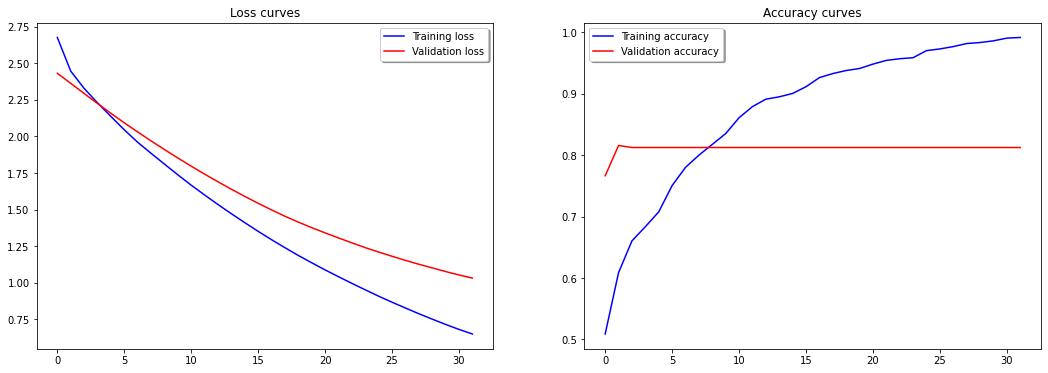

9     model_Richmond
Train data dimensions: (1802, 4, 62), (1802, 1)
Test data dimensions: (602, 4, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.39 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 81.909%
test accuracy = 80.7309%
test error = 117 out of 608 examples


<Figure size 432x288 with 0 Axes>

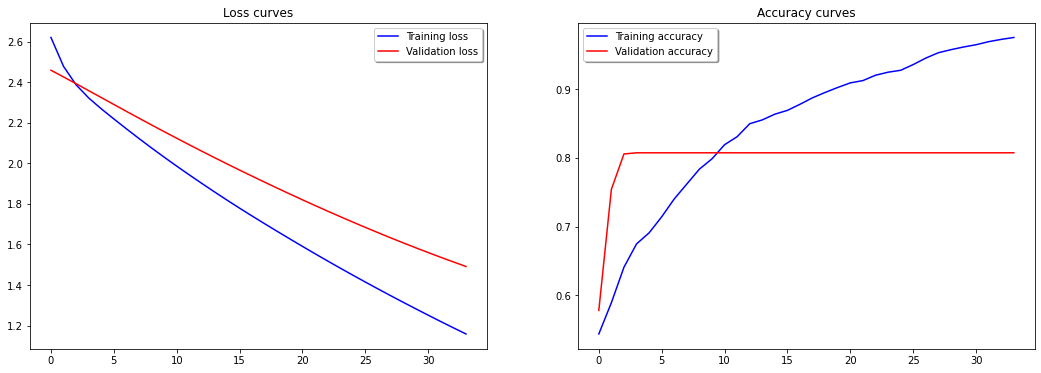

10     model_Sydney
Train data dimensions: (2003, 4, 62), (2003, 1)
Test data dimensions: (669, 4, 62), (669, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 13.25 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.7379%
test accuracy = 73.5197%
test error = 161 out of 608 examples


<Figure size 432x288 with 0 Axes>

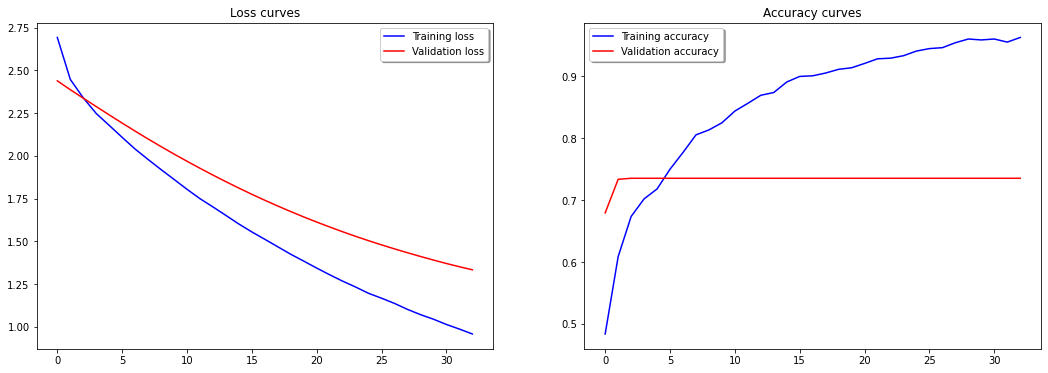

11     model_SydneyAirport
Train data dimensions: (1802, 4, 62), (1802, 1)
Test data dimensions: (602, 4, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.45 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 74.5838%
test accuracy = 74.9169%
test error = 153 out of 608 examples


<Figure size 432x288 with 0 Axes>

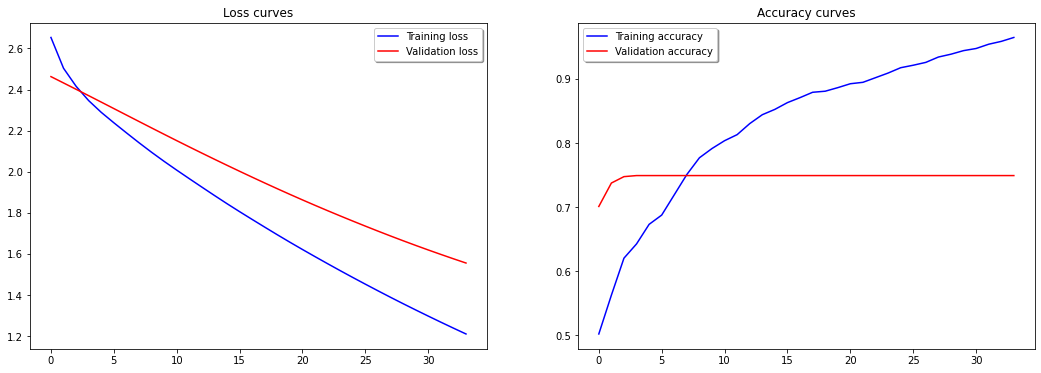

12     model_WaggaWagga
Train data dimensions: (1802, 4, 62), (1802, 1)
Test data dimensions: (602, 4, 62), (602, 1)


Restoring model weights from the end of the best epoch: 4.
Epoch 34: early stopping
-----------------------------------------------------------------
Training was completed in 12.08 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 82.6859%
test accuracy = 79.7342%
test error = 123 out of 608 examples


<Figure size 432x288 with 0 Axes>

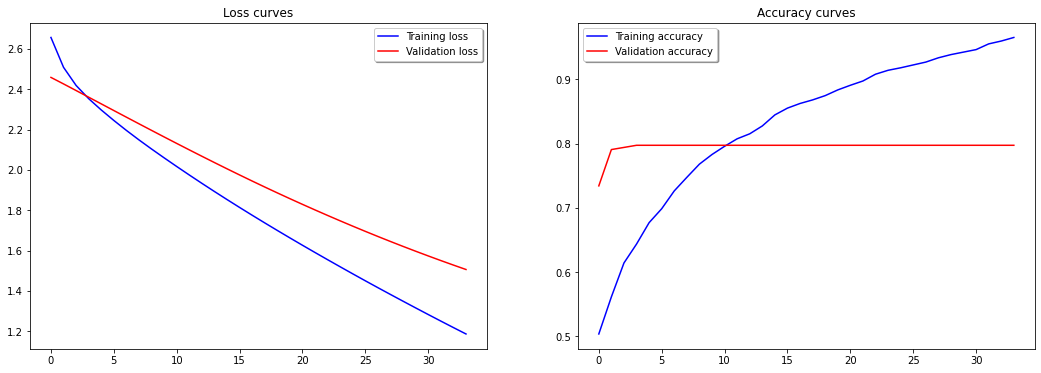

13     model_Williamtown
Train data dimensions: (1802, 4, 62), (1802, 1)
Test data dimensions: (602, 4, 62), (602, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 13.59 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 71.9201%
test accuracy = 75.0831%
test error = 151 out of 608 examples


<Figure size 432x288 with 0 Axes>

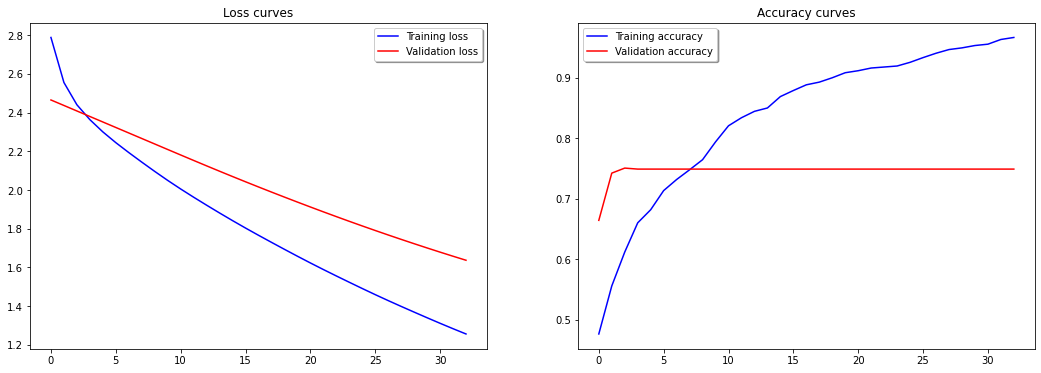

14     model_Wollongong
Train data dimensions: (1821, 4, 62), (1821, 1)
Test data dimensions: (608, 4, 62), (608, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 13.12 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 76.3866%
test accuracy = 77.1382%
test error = 139 out of 608 examples


<Figure size 432x288 with 0 Axes>

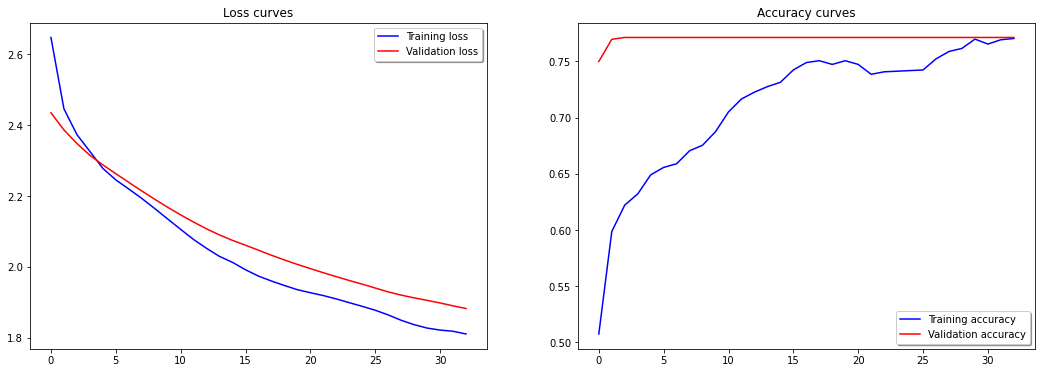

15     model_Canberra
Train data dimensions: (2058, 4, 62), (2058, 1)
Test data dimensions: (688, 4, 62), (688, 1)


Restoring model weights from the end of the best epoch: 2.
Epoch 32: early stopping
-----------------------------------------------------------------
Training was completed in 13.68 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 81.5355%
test accuracy = 79.2763%
test error = 126 out of 608 examples


<Figure size 432x288 with 0 Axes>

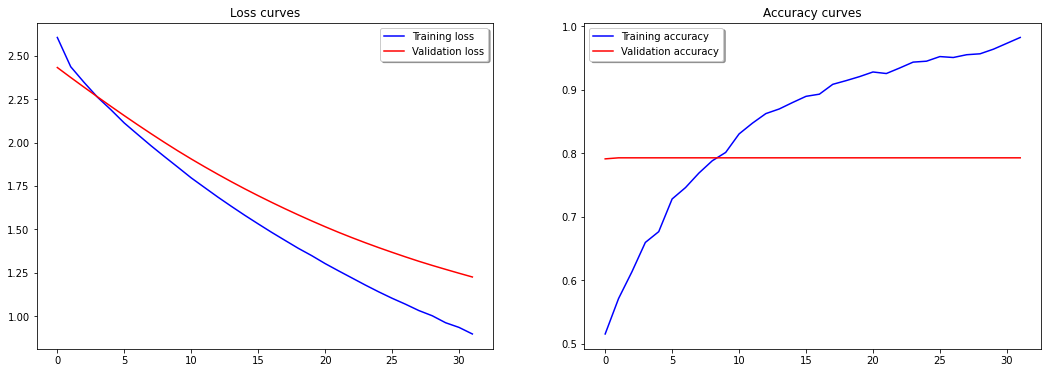

16     model_Tuggeranong
Train data dimensions: (1820, 4, 62), (1820, 1)
Test data dimensions: (608, 4, 62), (608, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 13.46 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 81.4286%
test accuracy = 78.7829%
test error = 129 out of 608 examples


<Figure size 432x288 with 0 Axes>

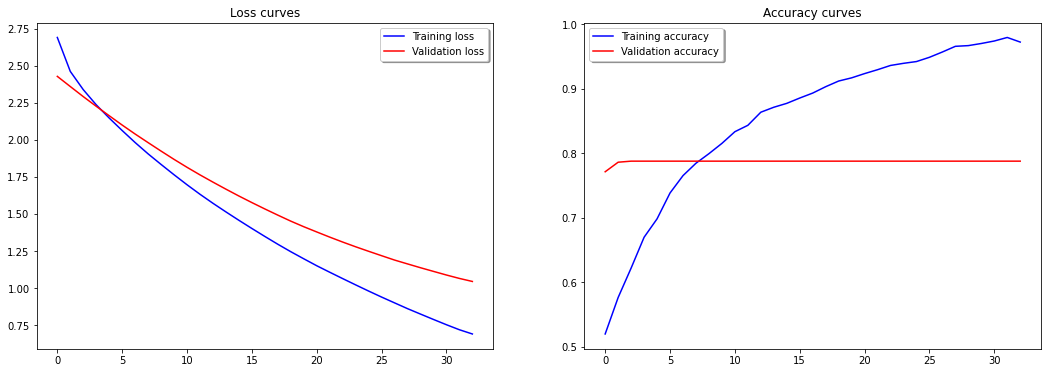

17     model_MountGinini
Train data dimensions: (1821, 4, 62), (1821, 1)
Test data dimensions: (608, 4, 62), (608, 1)


Restoring model weights from the end of the best epoch: 3.
Epoch 33: early stopping
-----------------------------------------------------------------
Training was completed in 16.35 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 70.346%
test accuracy = 71.875%
test error = 171 out of 608 examples


<Figure size 432x288 with 0 Axes>

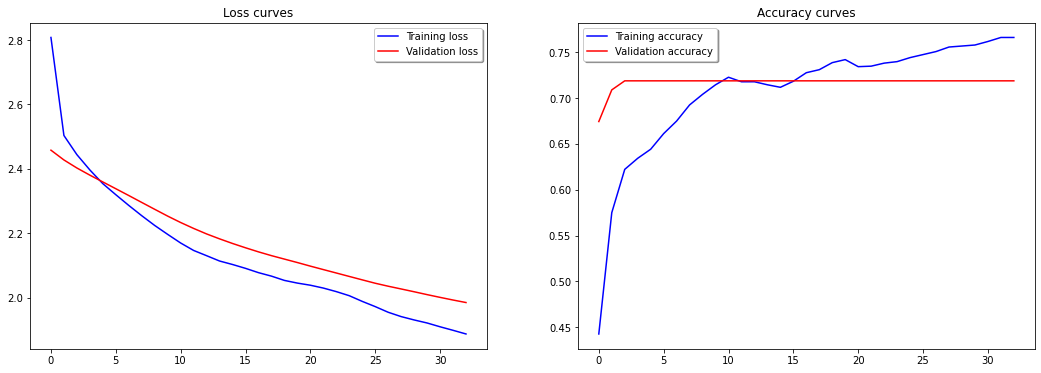

18     model_Ballarat
Train data dimensions: (1821, 4, 62), (1821, 1)
Test data dimensions: (608, 4, 62), (608, 1)


In [ ]:
lcl = locals()
c=0
for city in df.Location.unique():
    print(c, "   " ,f"model_{city}")
    c+=1
    d1 = df[df.Location==city]
    d1.pop("Location")
    # Split train and test data
    train_features = d1.iloc[:int(d1.shape[0]*0.6)]
    train_labels = d1.iloc[:int(d1.shape[0]*0.6) , -1]

    val_features = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8)]
    val_labels = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8), -1]

    test_features = d1.iloc[int(d1.shape[0]*0.8):]
    test_labels = d1.iloc[int(d1.shape[0]*0.8):, -1]

    T = 3+1  # my choice of the timesteps window

    prepend_features = train_features.iloc[-(T-1):]
    test_features = pd.concat([prepend_features, test_features], axis=0)

    train_features.shape, train_labels.shape, test_features.shape, test_labels.shape , val_features.shape ,val_labels.shape

    # Rescale the features
    from sklearn.preprocessing import StandardScaler  # MinMaxScaler

    scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
    scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                         index=train_features.index,
                                         columns=train_features.columns)
    # The Scaler is fit on the training set and then applied to the test set
    scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                        index=test_features.index,
                                        columns=test_features.columns)

    scaled_train_features.shape, scaled_test_features.shape
    
    # Create sequences of T timesteps
    X_train, y_train = [], []
    for i in range(train_labels.shape[0] - (T-1)):
        X_train.append(scaled_train_features.iloc[i:i+T].values)
        y_train.append(train_labels.iloc[i + (T-1)])
    X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
    print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

    X_test, y_test = [], []
    for i in range(test_labels.shape[0]):
        X_test.append(scaled_test_features.iloc[i:i+T].values)
        y_test.append(test_labels.iloc[i])
    X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

    print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')
    
    #create model
    # Build the model
    lcl[f"model_{city}"] = Sequential()
    lcl[f"model_{city}"].add(LSTM(input_shape=(T, N), units=LAYERS[0],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(LSTM(units=LAYERS[1],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(LSTM(units=LAYERS[2],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=False, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(Dense(units=LAYERS[3], activation='sigmoid'))

    # Compile the model with Adam optimizer
    lcl[f"model_{city}"].compile(loss='binary_crossentropy',
                  metrics=['accuracy'],
                  optimizer=Adam(lr=LR))

    # Define a learning rate decay method:
    lr_decay = ReduceLROnPlateau(monitor='loss', 
                                 patience=1, verbose=0, 
                                 factor=0.5, min_lr=1e-8)
    # Define Early Stopping:
    early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                               patience=30, verbose=1, mode='auto',
                               baseline=0, restore_best_weights=True)
    
    
    
    # Train the model. 
    # The dataset is small for NN - let's use test_data for validation
    start = time()
    History = lcl[f"model_{city}"].fit(X_train, y_train,
                        epochs=EPOCH,
                        batch_size=BATCH,
                        validation_split=0.0,
                        validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                        shuffle=True,verbose=0,
                        callbacks=[lr_decay, early_stop])
    print('-'*65)
    print(f'Training was completed in {time() - start:.2f} secs')
    print('-'*65)
    # Evaluate the model:
    train_loss, train_acc = lcl[f"model_{city}"].evaluate(X_train, y_train,
                                           batch_size=M_TRAIN, verbose=0)
    test_loss, test_acc = lcl[f"model_{city}"].evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                         batch_size=M_TEST, verbose=0)
    print('-'*65)
    print(f'train accuracy = {round(train_acc * 100, 4)}%')
    print(f'test accuracy = {round(test_acc * 100, 4)}%')
    print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

    # Plot the loss and accuracy curves over epochs:
    plt.figure()
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    axs[0].plot(History.history['loss'], color='b', label='Training loss')
    axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
    axs[0].set_title("Loss curves")
    axs[0].legend(loc='best', shadow=True)
    axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
    axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
    axs[1].set_title("Accuracy curves")
    axs[1].legend(loc='best', shadow=True)
    plt.show()
    print("========"*15)
    print("========"*15)
    print("========"*15)

# T = 10 window

In [ ]:
lcl = locals()
c=0
for city in df.Location.unique():
    print(c, "   " ,f"model_{city}")
    c+=1
    d1 = df[df.Location==city]
    d1.pop("Location")
    # Split train and test data
    train_features = d1.iloc[:int(d1.shape[0]*0.6)]
    train_labels = d1.iloc[:int(d1.shape[0]*0.6) , -1]

    val_features = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8)]
    val_labels = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8), -1]

    test_features = d1.iloc[int(d1.shape[0]*0.8):]
    test_labels = d1.iloc[int(d1.shape[0]*0.8):, -1]

    T = 10+1  # my choice of the timesteps window

    prepend_features = train_features.iloc[-(T-1):]
    test_features = pd.concat([prepend_features, test_features], axis=0)

    train_features.shape, train_labels.shape, test_features.shape, test_labels.shape , val_features.shape ,val_labels.shape

    # Rescale the features
    from sklearn.preprocessing import StandardScaler  # MinMaxScaler

    scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
    scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                         index=train_features.index,
                                         columns=train_features.columns)
    # The Scaler is fit on the training set and then applied to the test set
    scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                        index=test_features.index,
                                        columns=test_features.columns)

    scaled_train_features.shape, scaled_test_features.shape
    
    # Create sequences of T timesteps
    X_train, y_train = [], []
    for i in range(train_labels.shape[0] - (T-1)):
        X_train.append(scaled_train_features.iloc[i:i+T].values)
        y_train.append(train_labels.iloc[i + (T-1)])
    X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
    print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

    X_test, y_test = [], []
    for i in range(test_labels.shape[0]):
        X_test.append(scaled_test_features.iloc[i:i+T].values)
        y_test.append(test_labels.iloc[i])
    X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

    print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')
    
    #create model
    # Build the model
    lcl[f"model_{city}"] = Sequential()
    lcl[f"model_{city}"].add(LSTM(input_shape=(T, N), units=LAYERS[0],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(LSTM(units=LAYERS[1],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(LSTM(units=LAYERS[2],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=False, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(Dense(units=LAYERS[3], activation='sigmoid'))

    # Compile the model with Adam optimizer
    lcl[f"model_{city}"].compile(loss='binary_crossentropy',
                  metrics=['accuracy'],
                  optimizer=Adam(lr=LR))

    # Define a learning rate decay method:
    lr_decay = ReduceLROnPlateau(monitor='loss', 
                                 patience=1, verbose=0, 
                                 factor=0.5, min_lr=1e-8)
    # Define Early Stopping:
    early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                               patience=30, verbose=1, mode='auto',
                               baseline=0, restore_best_weights=True)
    
    
    
    # Train the model. 
    # The dataset is small for NN - let's use test_data for validation
    start = time()
    History = lcl[f"model_{city}"].fit(X_train, y_train,
                        epochs=EPOCH,
                        batch_size=BATCH,
                        validation_split=0.0,
                        validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                        shuffle=True,verbose=0,
                        callbacks=[lr_decay, early_stop])
    print('-'*65)
    print(f'Training was completed in {time() - start:.2f} secs')
    print('-'*65)
    # Evaluate the model:
    train_loss, train_acc = lcl[f"model_{city}"].evaluate(X_train, y_train,
                                           batch_size=M_TRAIN, verbose=0)
    test_loss, test_acc = lcl[f"model_{city}"].evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                         batch_size=M_TEST, verbose=0)
    print('-'*65)
    print(f'train accuracy = {round(train_acc * 100, 4)}%')
    print(f'test accuracy = {round(test_acc * 100, 4)}%')
    print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

    # Plot the loss and accuracy curves over epochs:
    plt.figure()
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    axs[0].plot(History.history['loss'], color='b', label='Training loss')
    axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
    axs[0].set_title("Loss curves")
    axs[0].legend(loc='best', shadow=True)
    axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
    axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
    axs[1].set_title("Accuracy curves")
    axs[1].legend(loc='best', shadow=True)
    plt.show()
    print("========"*15)
    print("========"*15)
    print("========"*15)

# GRU

![Capture.PNG](attachment:Capture.PNG)

In [6]:
import pandas as pd, numpy as np , matplotlib.pyplot as plt
import tensorflow as tf

# df = pd.read_csv("")
df = pd.read_csv("/content/drive/MyDrive/project_vahid/data/WeatherAUS.csv")

df.drop(["Evaporation" ,"Sunshine","Cloud9am","Cloud3pm" ] ,axis=1,inplace=True)

df = df.fillna(method="ffill")
# df.dropna(inplace=True)

categorical_columns = []
for c in df.columns:
  if (type(df[c].iloc[0]) == str)&(c!="Date"):
    categorical_columns.append(c)

categorical_columns.remove("Location")
categorical_columns.remove("RainToday")
categorical_columns.remove("RainTomorrow")

# replace "yes" and "no"  in columns=["RainToday" , "RainTomorrow"] with "0" and "1"
df.RainToday.replace({"No":0, "Yes":1}, inplace=True)
df.RainTomorrow.replace({"No":0, "Yes":1}, inplace=True)
df = df.astype({"RainToday": np.float64})


for c in categorical_columns:
    for cc in df[c].unique():
        df[c+"_"+cc] = (df[c] == cc).replace({True:1 , False:0}).astype(np.float64)
    df.drop(c , axis=1, inplace=True)

d = df.pop("RainToday")
df["RainToday"] = d
d = df.pop("RainTomorrow")
df["RainTomorrow"] = d

df.set_index("Date" ,inplace=True)
df


Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
Date                                                                           
2008-12-01   Albury     13.4     22.9       0.6           44.0          20.0   
2008-12-02   Albury      7.4     25.1       0.0           44.0           4.0   
2008-12-03   Albury     12.9     25.7       0.0           46.0          19.0   
2008-12-04   Albury      9.2     28.0       0.0           24.0          11.0   
2008-12-05   Albury     17.5     32.3       1.0           41.0           7.0   
...             ...      ...      ...       ...            ...           ...   
2017-06-21    Uluru      2.8     23.4       0.0           31.0          13.0   
2017-06-22    Uluru      3.6     25.3       0.0           22.0          13.0   
2017-06-23    Uluru      5.4     26.9       0.0           37.0           9.0   
2017-06-24    Uluru      7.8     27.0       0.0           28.0          13.0   
2017-06-25    Uluru     14.9     27.0       0.0           28.0          17.0   

            WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  ...  \
Date                                                             ...   
2008-12-01          24.0         71.0         22.0       1007.7  ...   
2008-12-02          22.0         44.0         25.0       1010.6  ...   
2008-12-03          26.0         38.0         30.0       1007.6  ...   
2008-12-04           9.0         45.0         16.0       1017.6  ...   
2008-12-05          20.0         82.0         33.0       1010.8  ...   
...                  ...          ...          ...          ...  ...   
2017-06-21          11.0         51.0         24.0       1024.6  ...   
2017-06-22           9.0         56.0         21.0       1023.5  ...   
2017-06-23           9.0         53.0         24.0       1021.0  ...   
2017-06-24           7.0         51.0         24.0       1019.4  ...   
2017-06-25          17.0         62.0         36.0       1020.2  ...   

            WindDir3pm_NNW  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_SE  \
Date                                                                       
2008-12-01             0.0             0.0            0.0            0.0   
2008-12-02             0.0             0.0            0.0            0.0   
2008-12-03             0.0             0.0            0.0            0.0   
2008-12-04             0.0             0.0            0.0            0.0   
2008-12-05             0.0             0.0            0.0            0.0   
...                    ...             ...            ...            ...   
2017-06-21             0.0             0.0            0.0            0.0   
2017-06-22             0.0             0.0            0.0            0.0   
2017-06-23             0.0             0.0            0.0            0.0   
2017-06-24             0.0             0.0            0.0            0.0   
2017-06-25             0.0             0.0            0.0            0.0   

            WindDir3pm_N  WindDir3pm_S  WindDir3pm_NNE  WindDir3pm_NE  \
Date                                                                    
2008-12-01           0.0           0.0             0.0            0.0   
2008-12-02           0.0           0.0             0.0            0.0   
2008-12-03           0.0           0.0             0.0            0.0   
2008-12-04           0.0           0.0             0.0            0.0   
2008-12-05           0.0           0.0             0.0            0.0   
...                  ...           ...             ...            ...   
2017-06-21           0.0           0.0             0.0            0.0   
2017-06-22           1.0           0.0             0.0            0.0   
2017-06-23           0.0           0.0             0.0            0.0   
2017-06-24           1.0           0.0             0.0            0.0   
2017-06-25           0.0           0.0             0.0            0.0   

            RainToday  RainTomorrow  
Date                                 
2008-12-01        

In [7]:
# Import Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization , GRU
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time
from sklearn.model_selection import train_test_split


# Let's make a list of CONSTANTS for modelling:
LAYERS = [80, 80, 80, 1]             # number of units in hidden and output layers
M_TRAIN = X_train.shape[0]           # number of training examples (2D)
M_TEST = X_test.shape[0]             # number of test examples (2D),full=X_test.shape[0]
N = X_train.shape[2]                 # number of features
BATCH = M_TRAIN                      # batch size
EPOCH = 100                           # number of epochs
LR = 5e-3                            # learning rate of the gradient descent
LAMBD = 3e-3                         # lambda in L2 regularizaion
DP = 0.0                             # dropout rate
RDP = 0.0                            # recurrent dropout rate
print(f'layers={LAYERS}, train_examples={M_TRAIN}, test_examples={M_TEST}')
print(f'batch = {BATCH}, timesteps = {T}, features = {N}, epochs = {EPOCH}')
print(f'lr = {LR}, lambda = {LAMBD}, dropout = {DP}, recurr_dropout = {RDP}')



layers=[80, 80, 80, 1], train_examples=1819, test_examples=608
batch = 1819, timesteps = 6, features = 62, epochs = 100
lr = 0.005, lambda = 0.003, dropout = 0.0, recurr_dropout = 0.0


0     model_Albury
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 8.
Epoch 38: early stopping
-----------------------------------------------------------------
Training was completed in 13.61 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 85.1017%
test accuracy = 84.0461%
test error = 97 out of 608 examples


<Figure size 432x288 with 0 Axes>

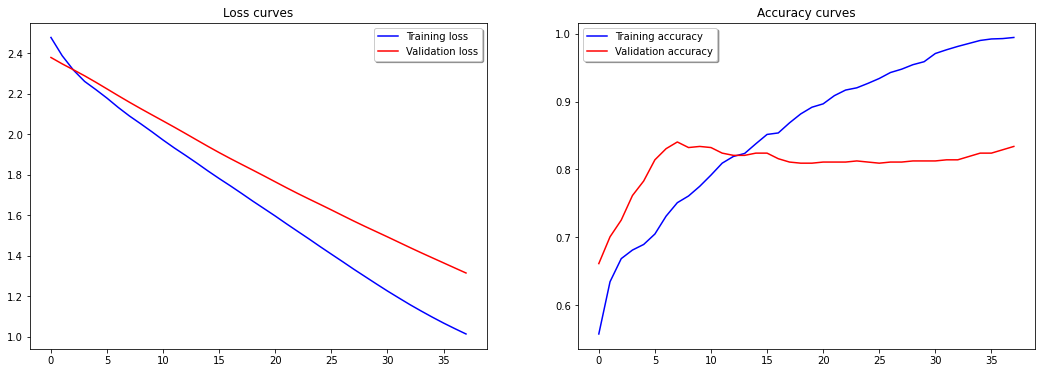

1     model_BadgerysCreek
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 26.78 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

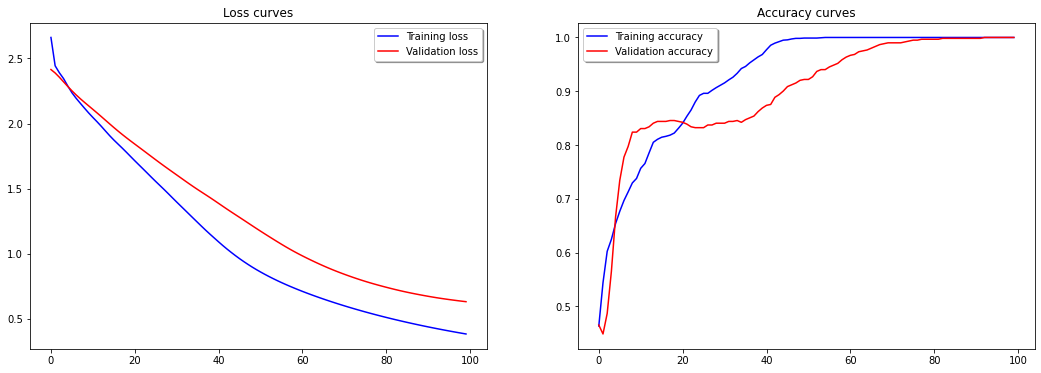

2     model_Cobar
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 19.79 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.8339%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

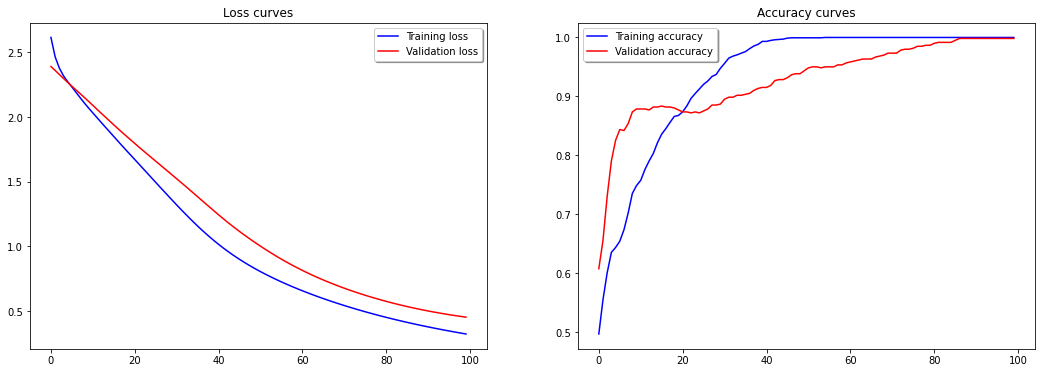

3     model_CoffsHarbour
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 27.58 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.1694%
test error = 5 out of 608 examples


<Figure size 432x288 with 0 Axes>

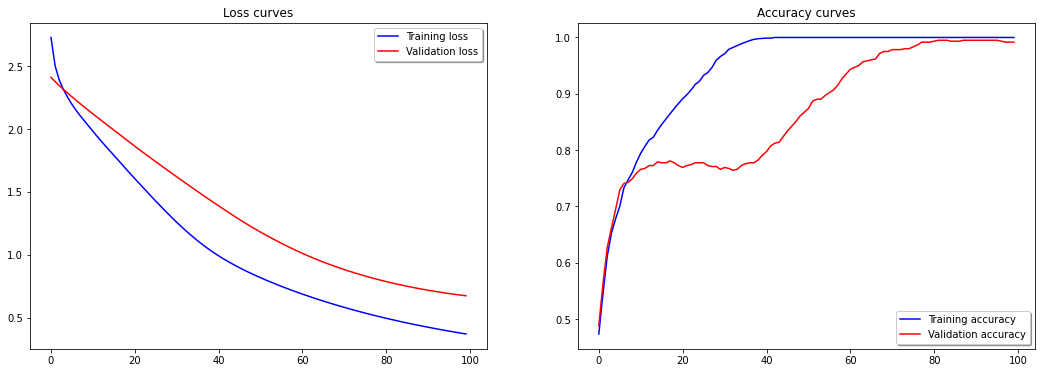

4     model_Moree
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 27.03 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.8339%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

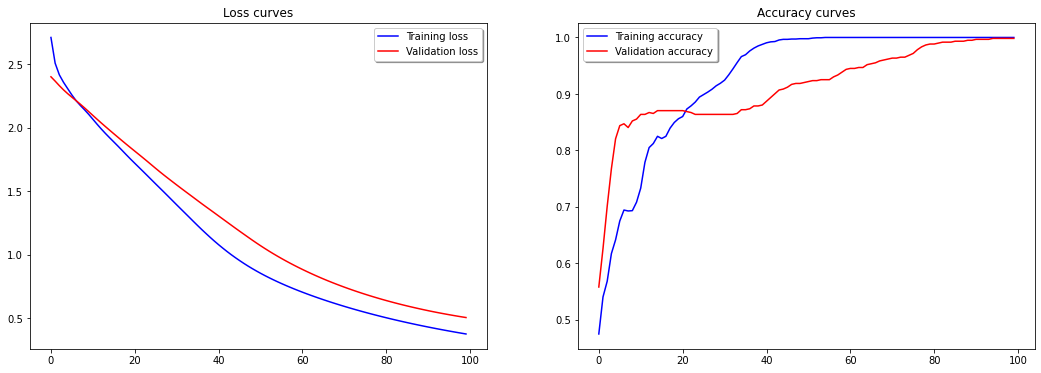

5     model_Newcastle
Train data dimensions: (1818, 6, 62), (1818, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 63.
Epoch 93: early stopping
-----------------------------------------------------------------
Training was completed in 19.95 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.945%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

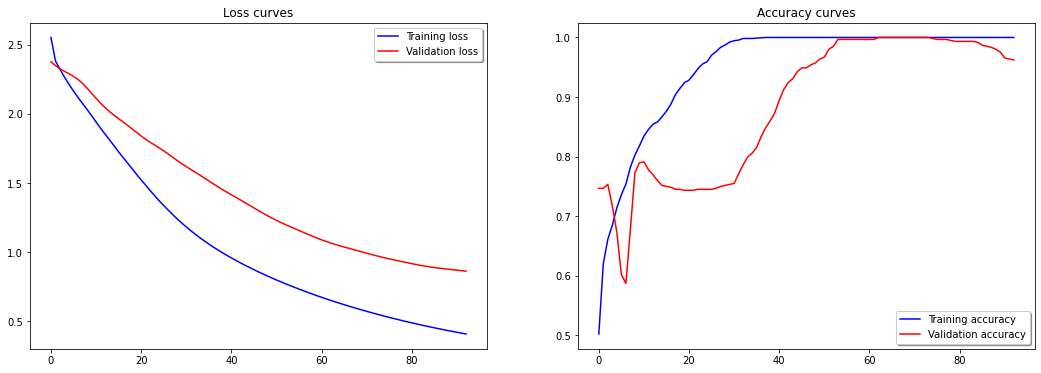

6     model_NorahHead
Train data dimensions: (1797, 6, 62), (1797, 1)
Test data dimensions: (601, 6, 62), (601, 1)


-----------------------------------------------------------------
Training was completed in 19.97 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.5008%
test error = 3 out of 608 examples


<Figure size 432x288 with 0 Axes>

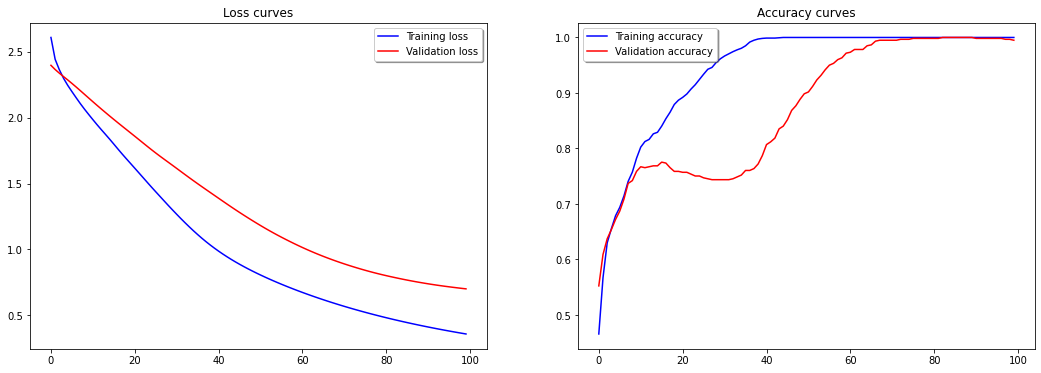

7     model_NorfolkIsland
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 27.28 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.5%
test accuracy = 98.6711%
test error = 8 out of 608 examples


<Figure size 432x288 with 0 Axes>

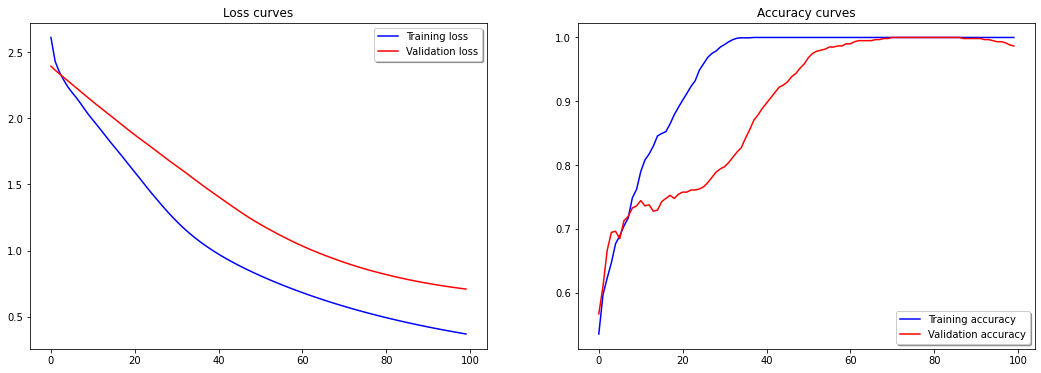

8     model_Penrith
Train data dimensions: (1818, 6, 62), (1818, 1)
Test data dimensions: (608, 6, 62), (608, 1)


-----------------------------------------------------------------
Training was completed in 27.10 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

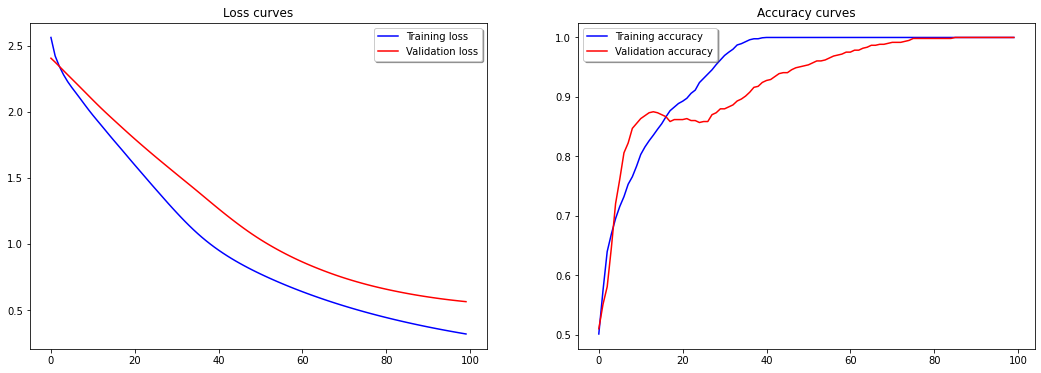

9     model_Richmond
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 26.96 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.6111%
test accuracy = 99.3355%
test error = 4 out of 608 examples


<Figure size 432x288 with 0 Axes>

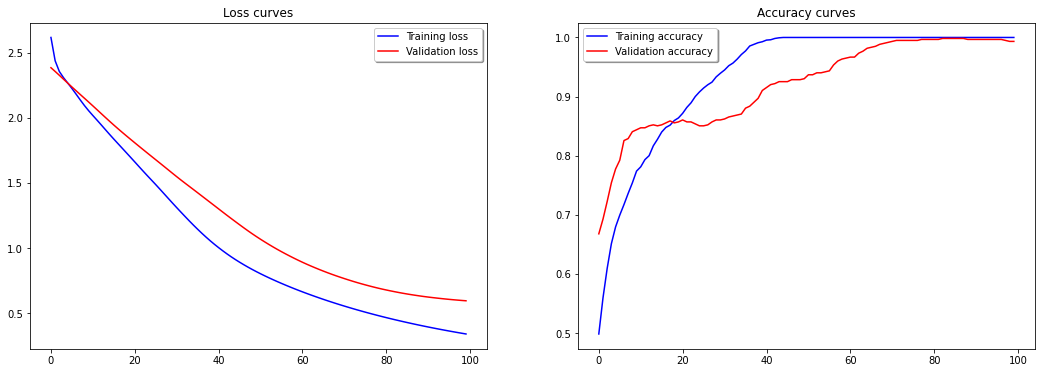

10     model_Sydney
Train data dimensions: (2001, 6, 62), (2001, 1)
Test data dimensions: (669, 6, 62), (669, 1)


Restoring model weights from the end of the best epoch: 60.
Epoch 90: early stopping
-----------------------------------------------------------------
Training was completed in 25.77 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

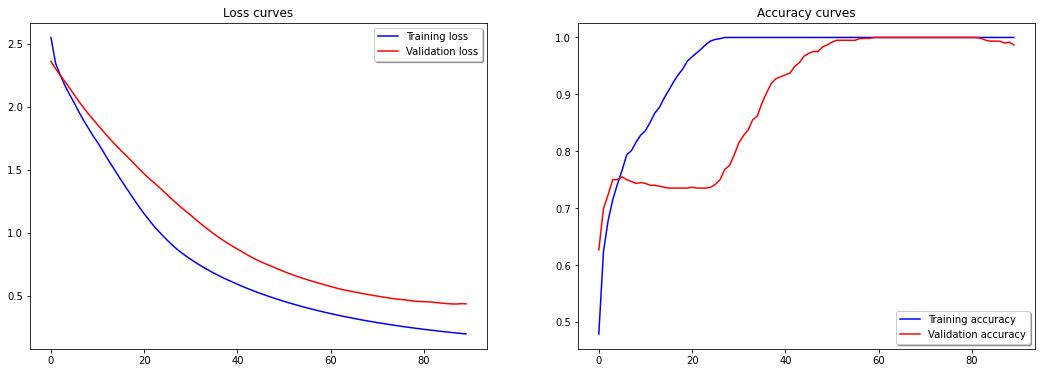

11     model_SydneyAirport
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 19.56 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.8339%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

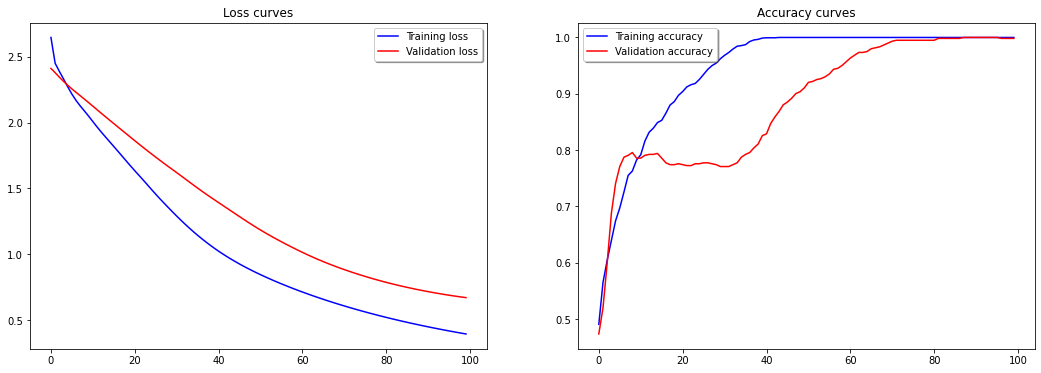

12     model_WaggaWagga
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 27.08 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

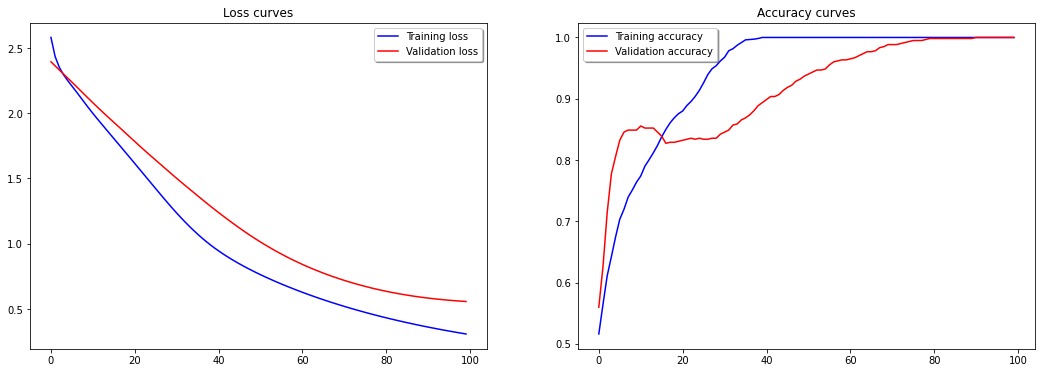

13     model_Williamtown
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 68.
Epoch 98: early stopping
-----------------------------------------------------------------
Training was completed in 21.33 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

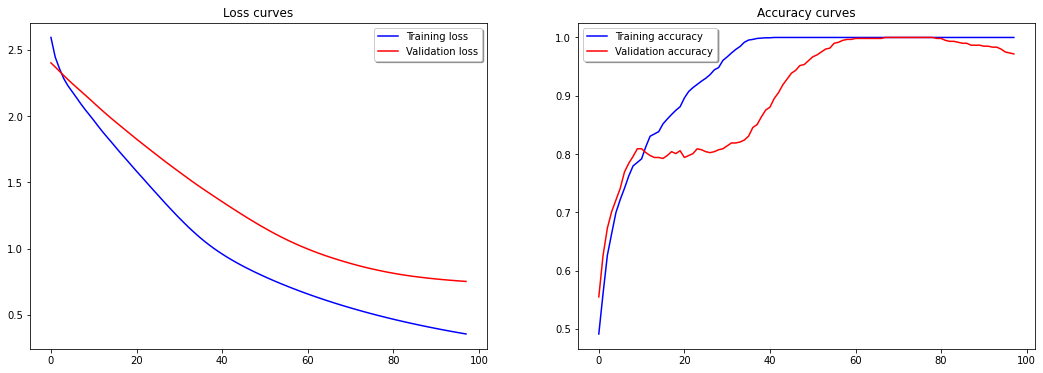

14     model_Wollongong
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


-----------------------------------------------------------------
Training was completed in 12.48 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 97.1413%
test accuracy = 96.3816%
test error = 22 out of 608 examples


<Figure size 432x288 with 0 Axes>

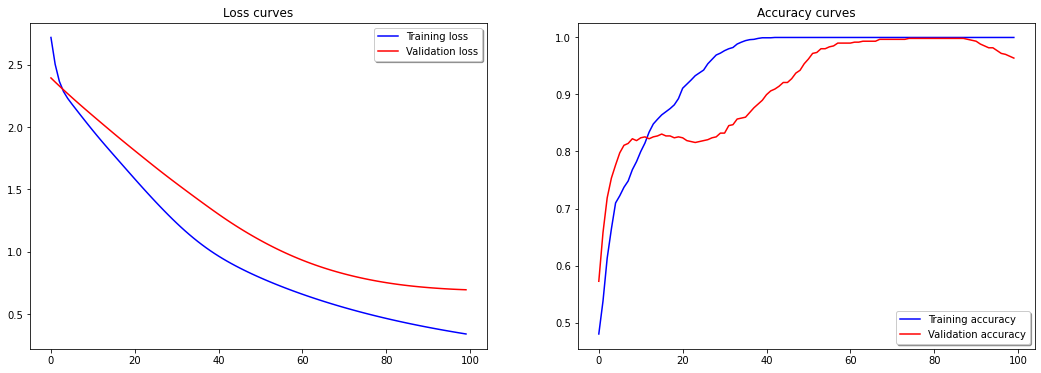

15     model_Canberra
Train data dimensions: (2056, 6, 62), (2056, 1)
Test data dimensions: (688, 6, 62), (688, 1)


Restoring model weights from the end of the best epoch: 46.
Epoch 76: early stopping
-----------------------------------------------------------------
Training was completed in 22.99 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.9514%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

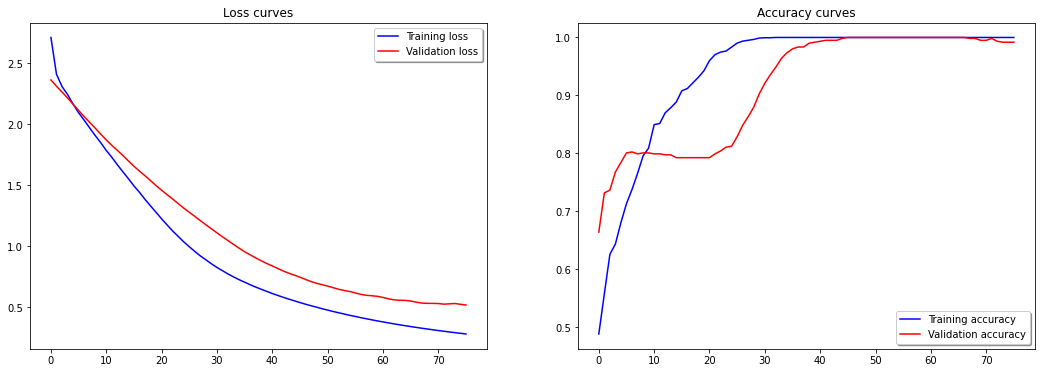

16     model_Tuggeranong
Train data dimensions: (1818, 6, 62), (1818, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 56.
Epoch 86: early stopping
-----------------------------------------------------------------
Training was completed in 17.86 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.89%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

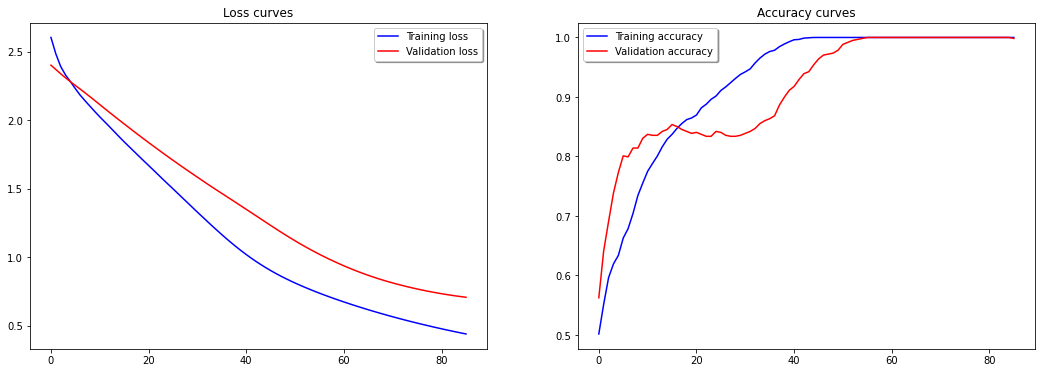

17     model_MountGinini
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


-----------------------------------------------------------------
Training was completed in 13.80 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.945%
test accuracy = 99.5066%
test error = 3 out of 608 examples


<Figure size 432x288 with 0 Axes>

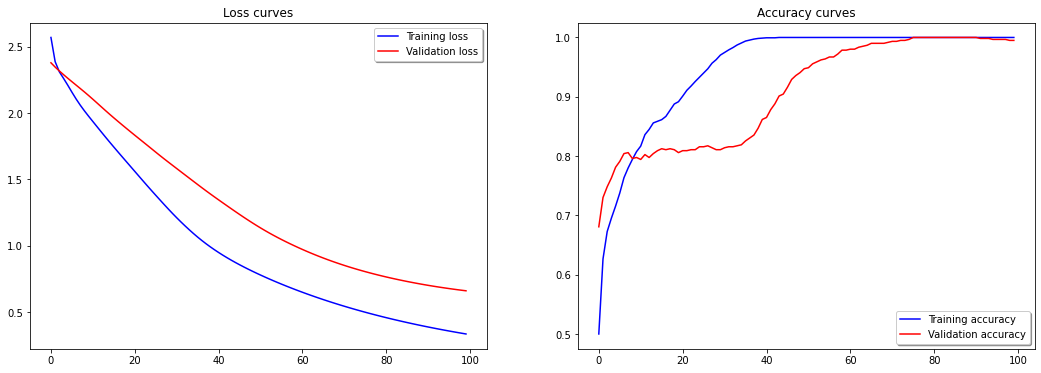

18     model_Ballarat
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


-----------------------------------------------------------------
Training was completed in 15.29 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.8355%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

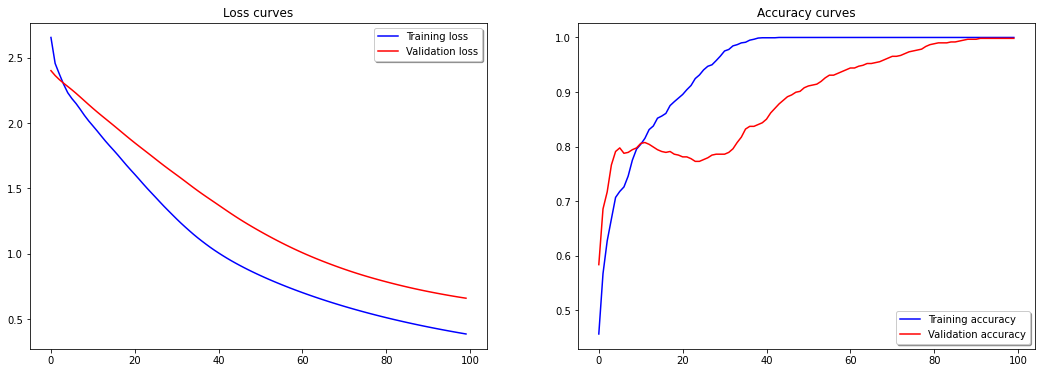

19     model_Bendigo
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


-----------------------------------------------------------------
Training was completed in 12.60 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.6711%
test error = 2 out of 608 examples


<Figure size 432x288 with 0 Axes>

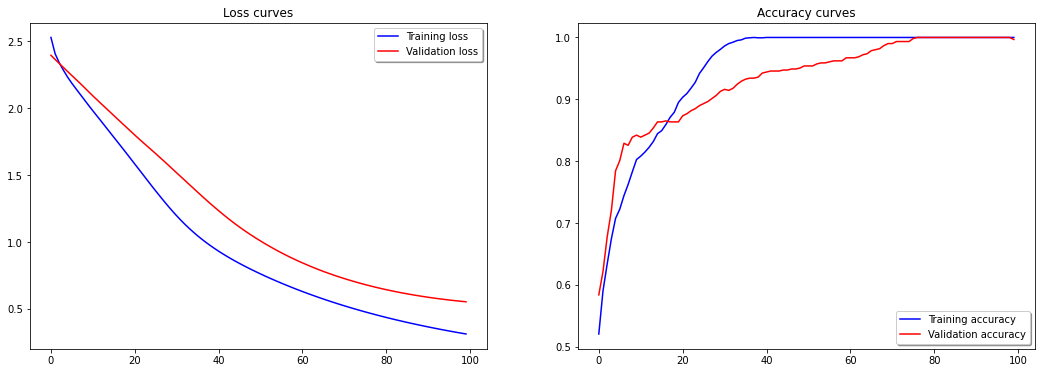

20     model_Sale
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 26.87 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.9444%
test accuracy = 99.0033%
test error = 6 out of 608 examples


<Figure size 432x288 with 0 Axes>

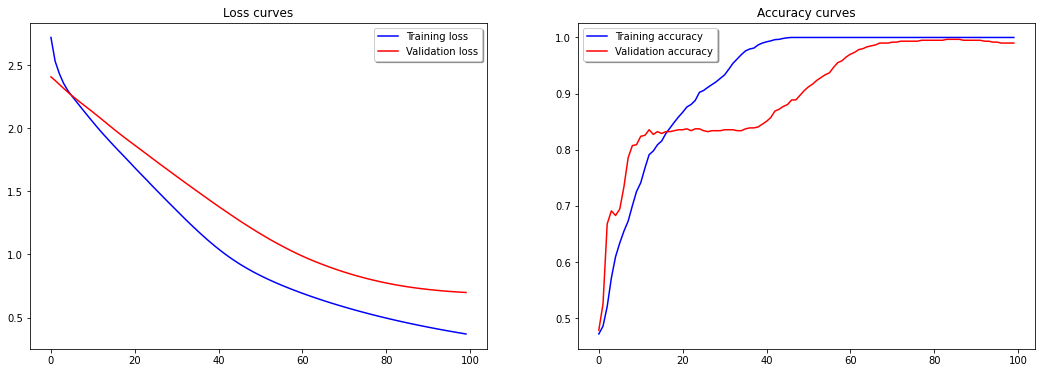

21     model_MelbourneAirport
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 63.
Epoch 93: early stopping
-----------------------------------------------------------------
Training was completed in 19.42 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.9444%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

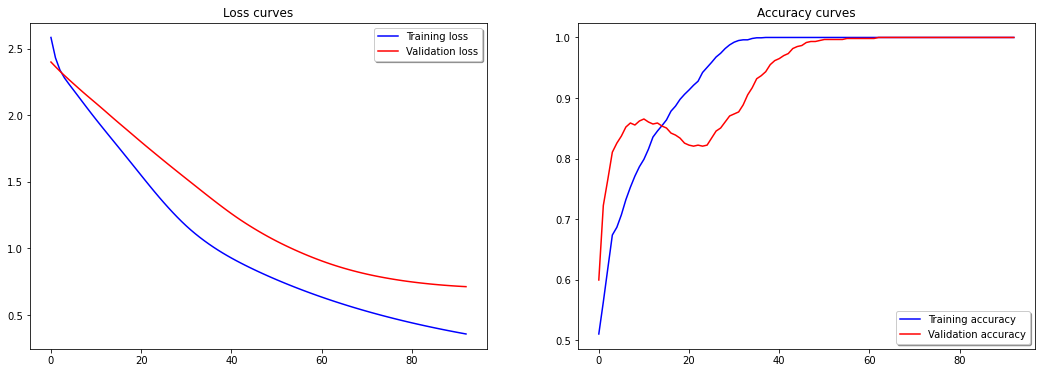

22     model_Melbourne
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


Restoring model weights from the end of the best epoch: 67.
Epoch 97: early stopping
-----------------------------------------------------------------
Training was completed in 26.26 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.8355%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

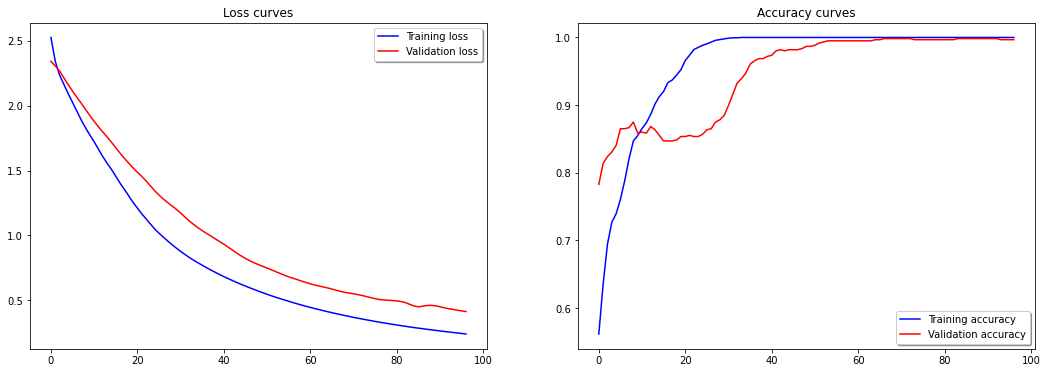

23     model_Mildura
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 27.60 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

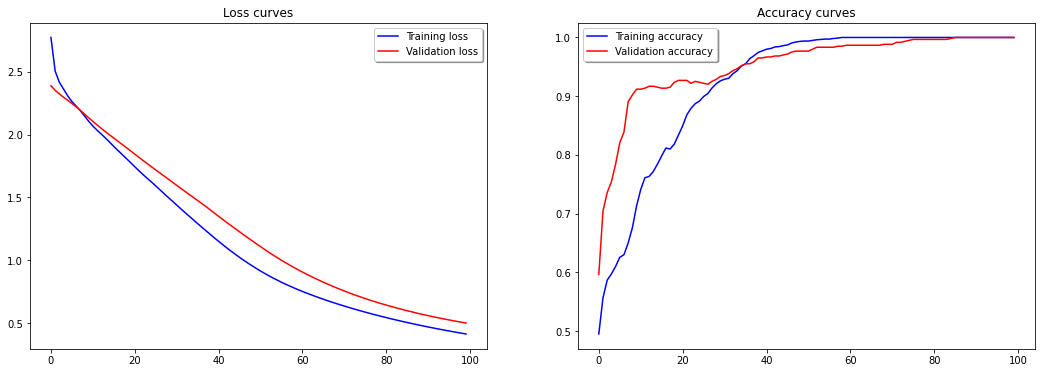

24     model_Nhil
Train data dimensions: (941, 6, 62), (941, 1)
Test data dimensions: (316, 6, 62), (316, 1)


-----------------------------------------------------------------
Training was completed in 20.09 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.8937%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

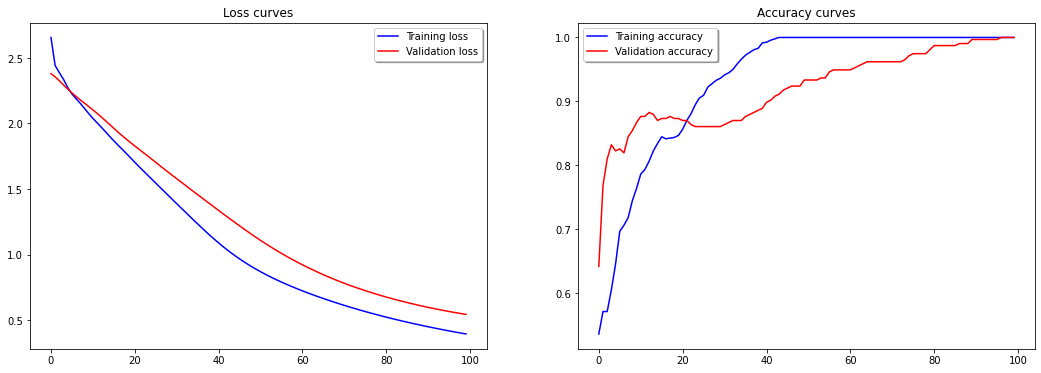

25     model_Portland
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 19.21 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.2222%
test accuracy = 98.8372%
test error = 7 out of 608 examples


<Figure size 432x288 with 0 Axes>

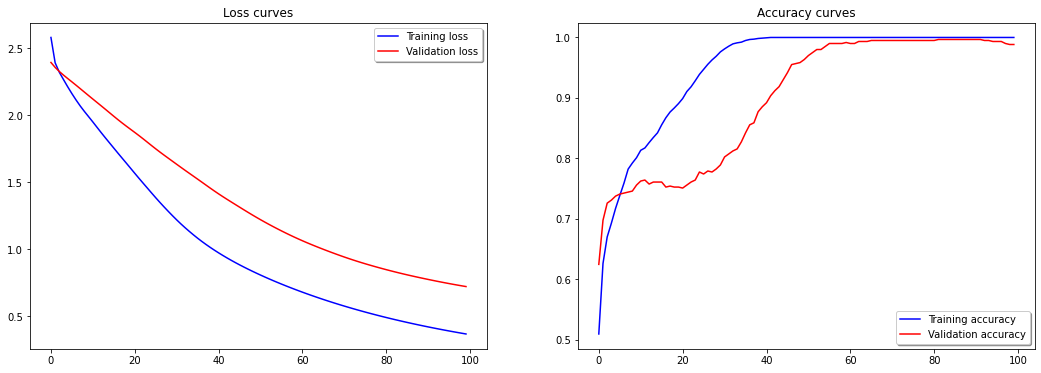

26     model_Watsonia
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 68.
Epoch 98: early stopping
-----------------------------------------------------------------
Training was completed in 20.21 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.8339%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

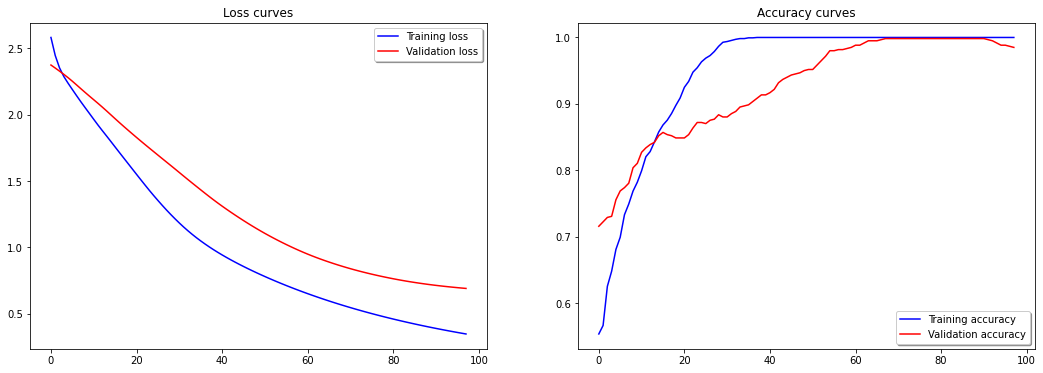

27     model_Dartmoor
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 70.
Epoch 100: early stopping
-----------------------------------------------------------------
Training was completed in 19.20 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.8339%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

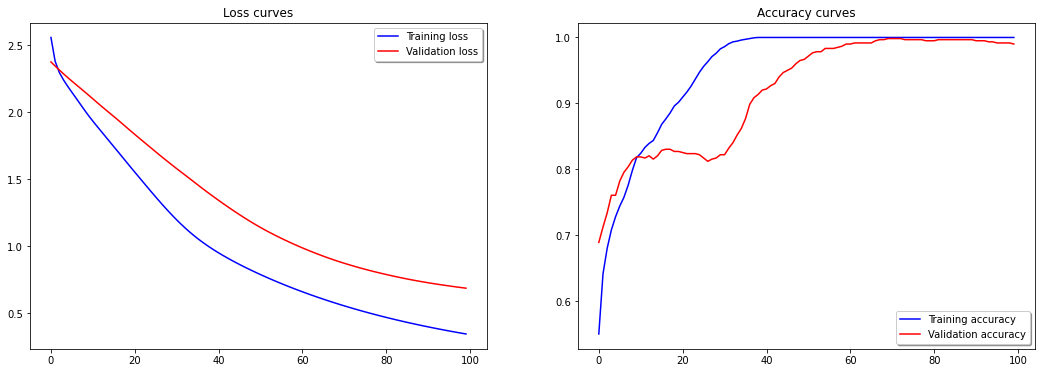

28     model_Brisbane
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


-----------------------------------------------------------------
Training was completed in 26.33 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

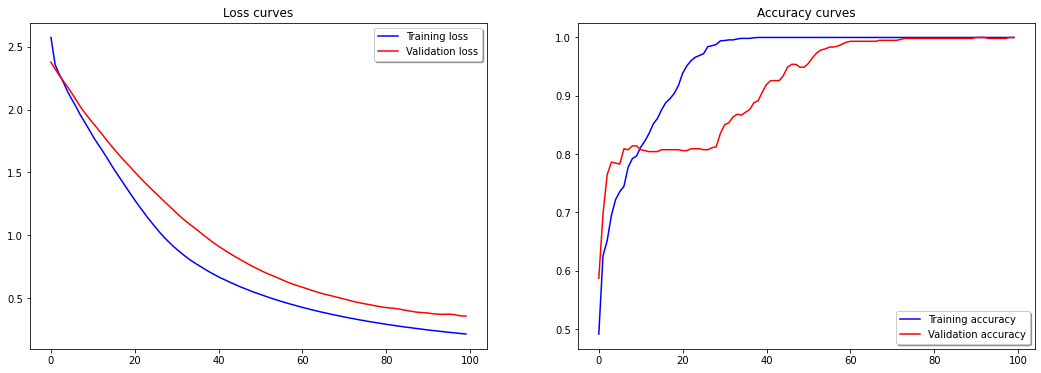

29     model_Cairns
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


-----------------------------------------------------------------
Training was completed in 14.75 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.7251%
test accuracy = 97.6974%
test error = 14 out of 608 examples


<Figure size 432x288 with 0 Axes>

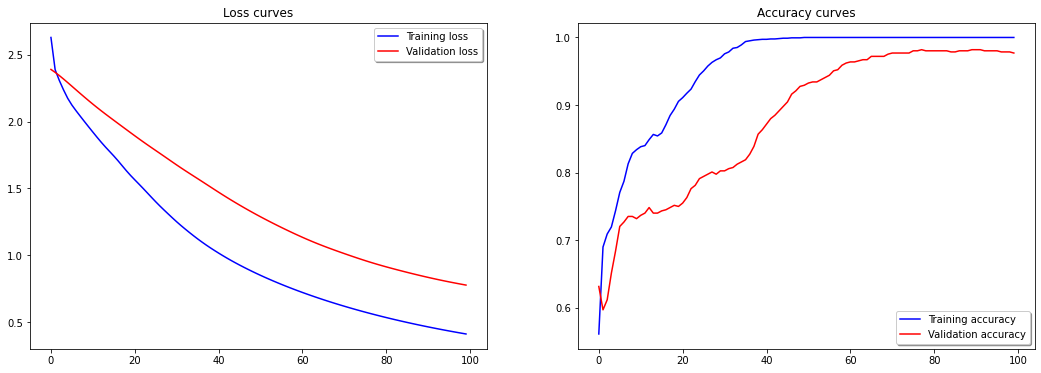

30     model_GoldCoast
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


-----------------------------------------------------------------
Training was completed in 14.07 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.6711%
test error = 2 out of 608 examples


<Figure size 432x288 with 0 Axes>

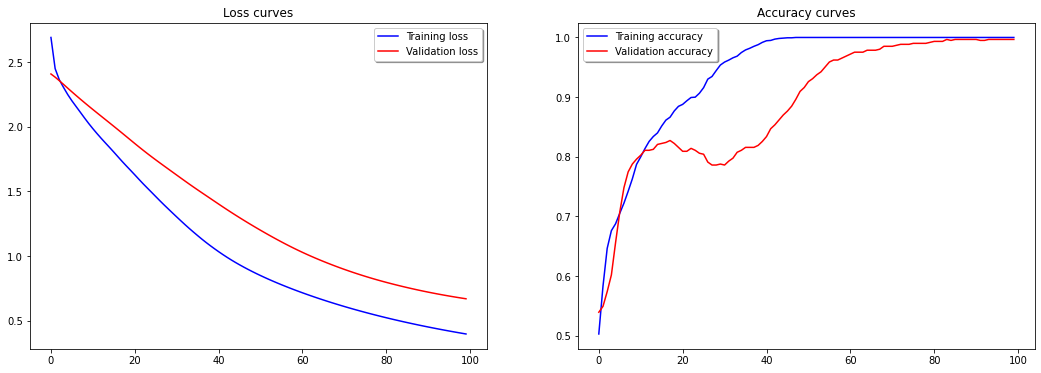

31     model_Townsville
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


-----------------------------------------------------------------
Training was completed in 13.86 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 97.0863%
test accuracy = 96.3816%
test error = 22 out of 608 examples


<Figure size 432x288 with 0 Axes>

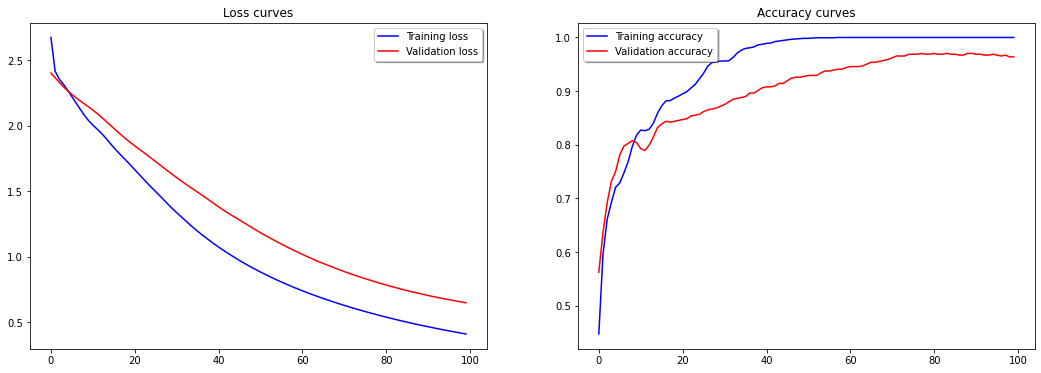

32     model_Adelaide
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


Restoring model weights from the end of the best epoch: 69.
Epoch 99: early stopping
-----------------------------------------------------------------
Training was completed in 26.89 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.8355%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

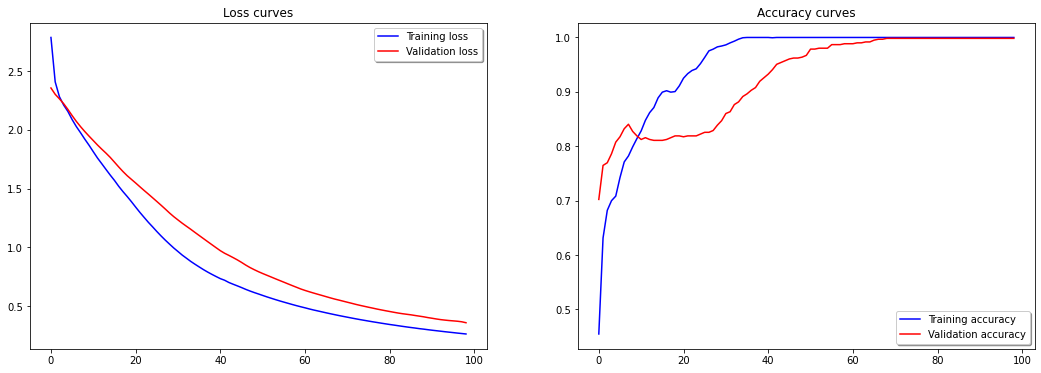

33     model_MountGambier
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


-----------------------------------------------------------------
Training was completed in 12.42 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.945%
test accuracy = 99.5066%
test error = 3 out of 608 examples


<Figure size 432x288 with 0 Axes>

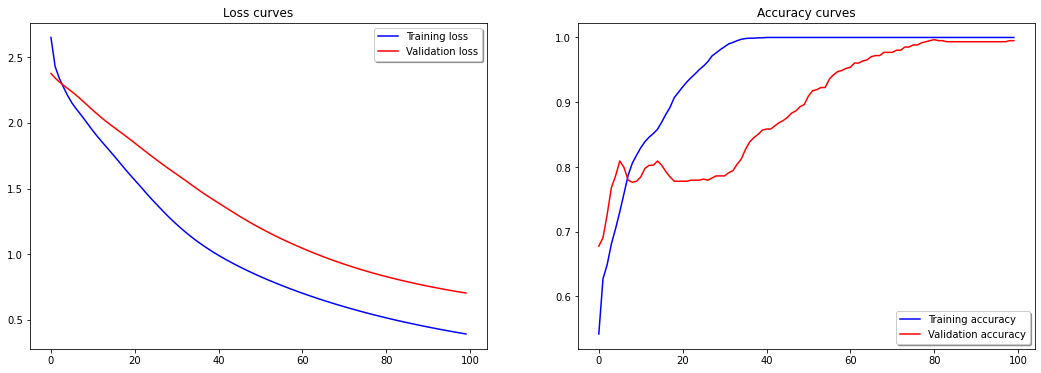

34     model_Nuriootpa
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 19.49 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.7778%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

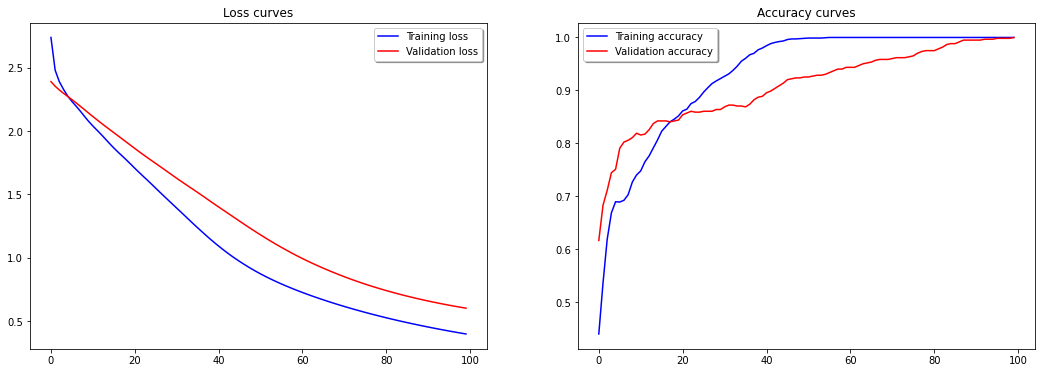

35     model_Woomera
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 49.
Epoch 79: early stopping
-----------------------------------------------------------------
Training was completed in 16.74 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.6111%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

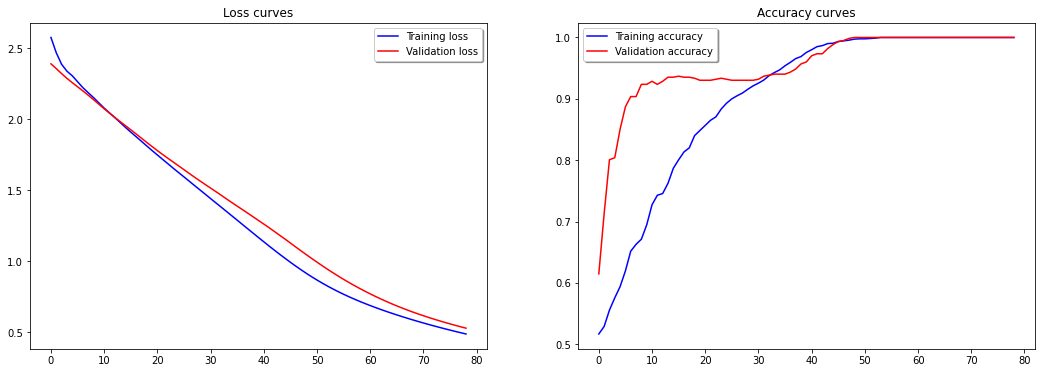

36     model_Albany
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 13.
Epoch 43: early stopping
-----------------------------------------------------------------
Training was completed in 8.85 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 77.79%
test accuracy = 78.4539%
test error = 131 out of 608 examples


<Figure size 432x288 with 0 Axes>

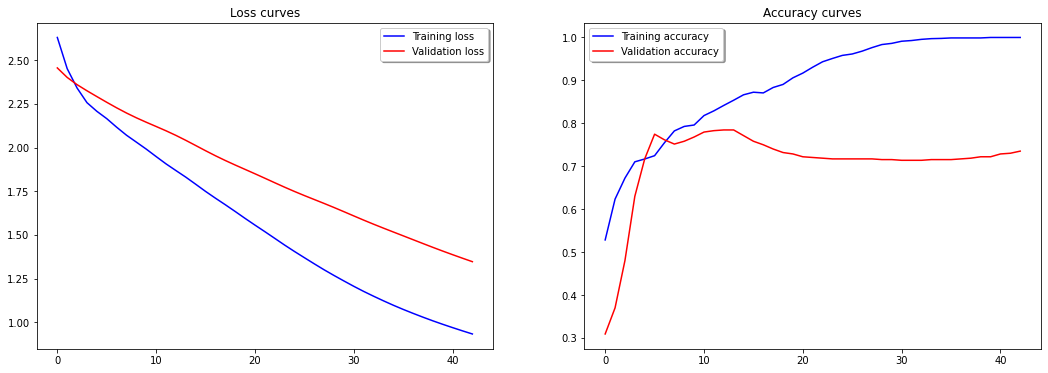

37     model_Witchcliffe
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


Restoring model weights from the end of the best epoch: 6.
Epoch 36: early stopping
-----------------------------------------------------------------
Training was completed in 12.41 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 80.6667%
test accuracy = 81.0631%
test error = 115 out of 608 examples


<Figure size 432x288 with 0 Axes>

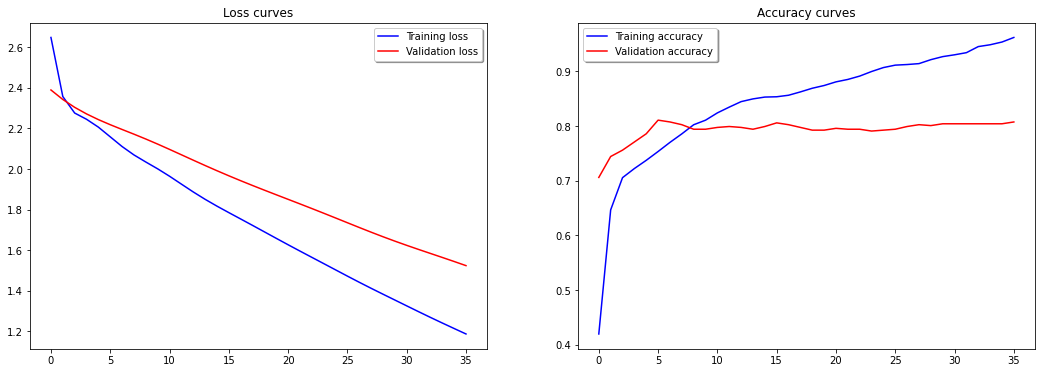

38     model_PearceRAAF
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 25.92 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.0556%
test accuracy = 98.0066%
test error = 12 out of 608 examples


<Figure size 432x288 with 0 Axes>

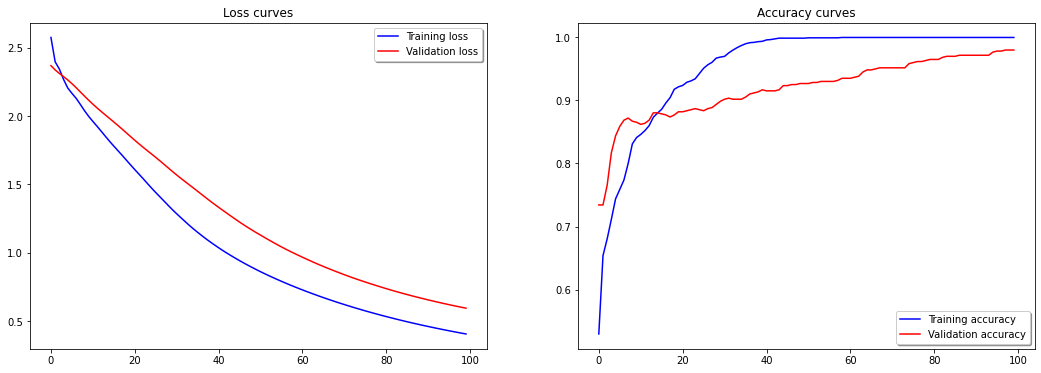

39     model_PerthAirport
Train data dimensions: (1800, 6, 62), (1800, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 19.59 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.7222%
test accuracy = 99.0033%
test error = 6 out of 608 examples


<Figure size 432x288 with 0 Axes>

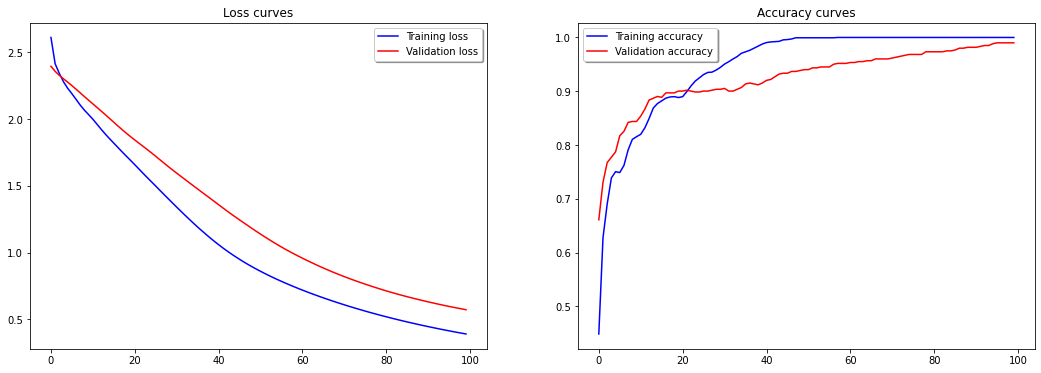

40     model_Perth
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


-----------------------------------------------------------------
Training was completed in 26.77 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.9476%
test accuracy = 99.8355%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

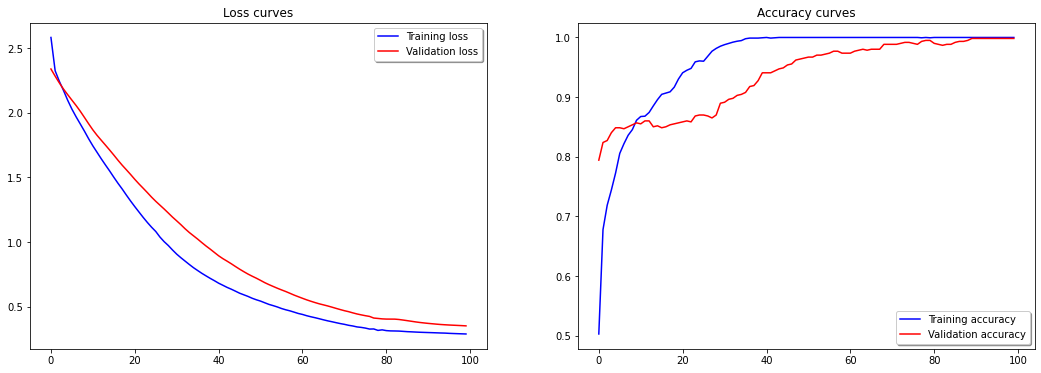

41     model_SalmonGums
Train data dimensions: (1795, 6, 62), (1795, 1)
Test data dimensions: (601, 6, 62), (601, 1)


Restoring model weights from the end of the best epoch: 66.
Epoch 96: early stopping
-----------------------------------------------------------------
Training was completed in 20.20 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.9443%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

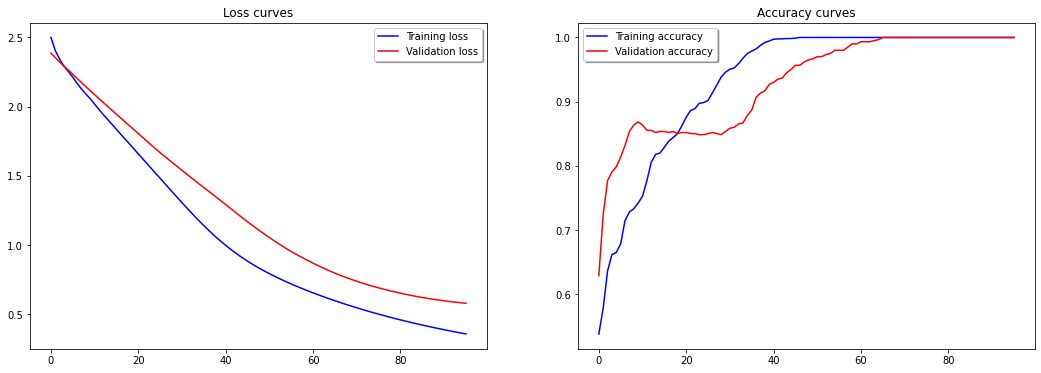

42     model_Walpole
Train data dimensions: (1798, 6, 62), (1798, 1)
Test data dimensions: (602, 6, 62), (602, 1)


-----------------------------------------------------------------
Training was completed in 26.37 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.3326%
test accuracy = 99.6678%
test error = 2 out of 608 examples


<Figure size 432x288 with 0 Axes>

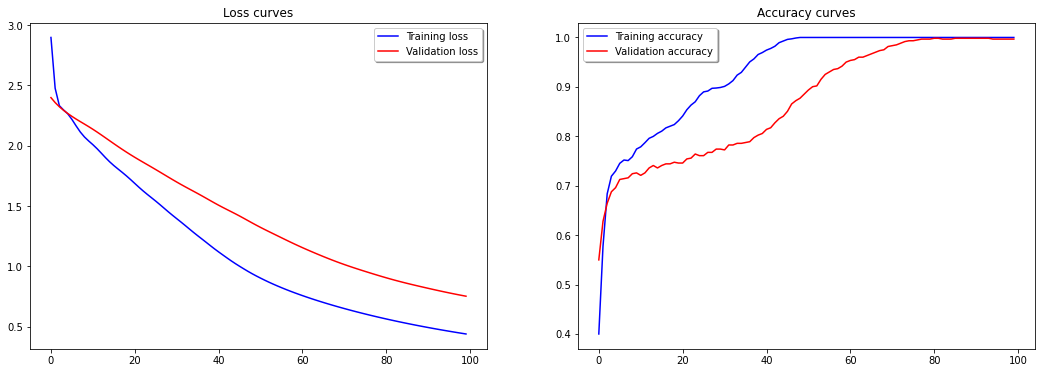

43     model_Hobart
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


Restoring model weights from the end of the best epoch: 54.
Epoch 84: early stopping
-----------------------------------------------------------------
Training was completed in 23.40 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 100.0%
test error = 0 out of 608 examples


<Figure size 432x288 with 0 Axes>

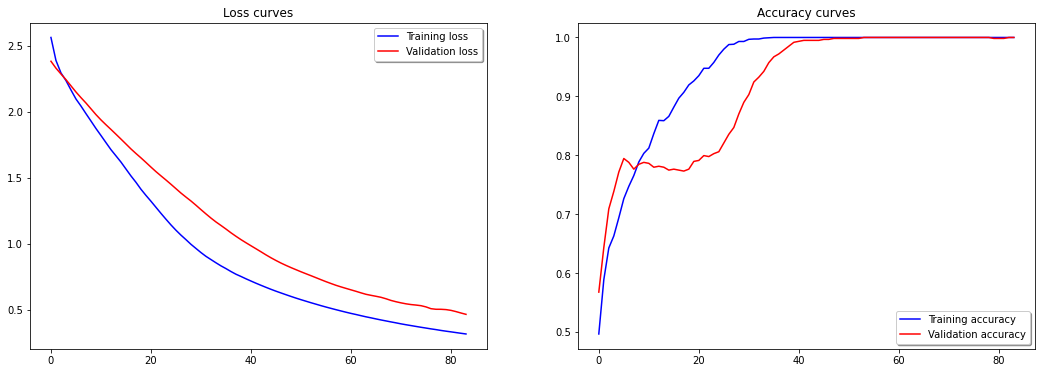

44     model_Launceston
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


Restoring model weights from the end of the best epoch: 66.
Epoch 96: early stopping
-----------------------------------------------------------------
Training was completed in 12.13 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 100.0%
test accuracy = 99.8355%
test error = 1 out of 608 examples


<Figure size 432x288 with 0 Axes>

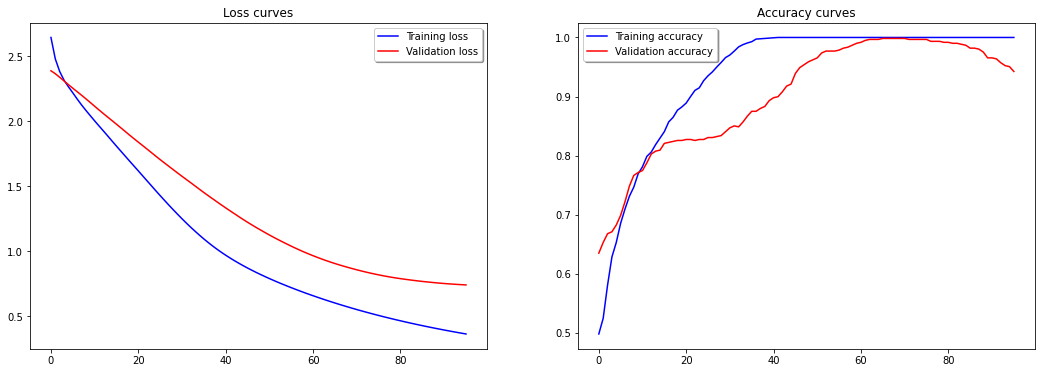

45     model_AliceSprings
Train data dimensions: (1819, 6, 62), (1819, 1)
Test data dimensions: (608, 6, 62), (608, 1)


-----------------------------------------------------------------
Training was completed in 13.88 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.6701%
test accuracy = 98.8487%
test error = 7 out of 608 examples


<Figure size 432x288 with 0 Axes>

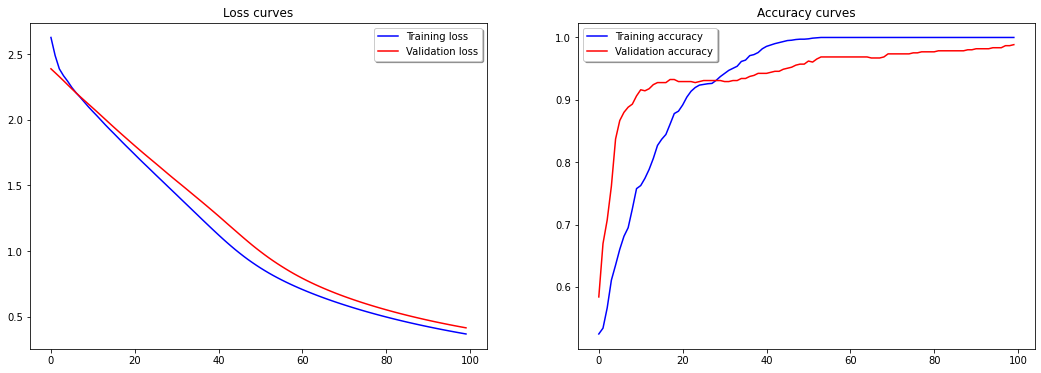

46     model_Darwin
Train data dimensions: (1910, 6, 62), (1910, 1)
Test data dimensions: (639, 6, 62), (639, 1)


Restoring model weights from the end of the best epoch: 62.
Epoch 92: early stopping
-----------------------------------------------------------------
Training was completed in 26.16 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 99.8953%
test accuracy = 99.3421%
test error = 4 out of 608 examples


<Figure size 432x288 with 0 Axes>

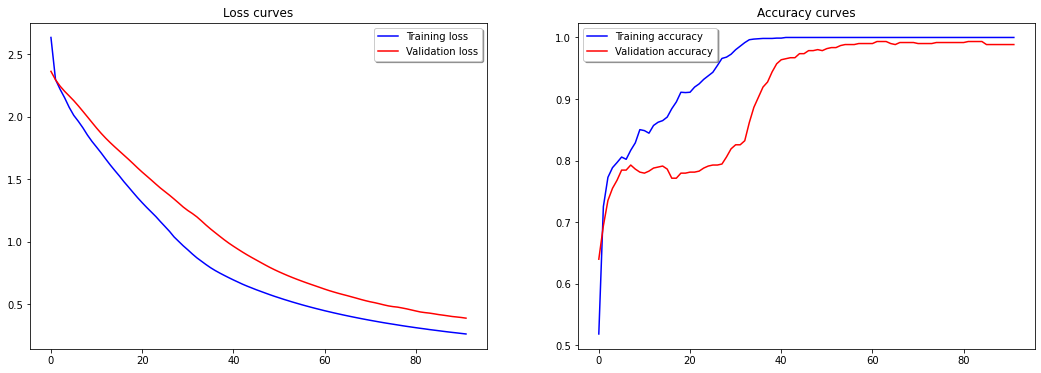

47     model_Katherine
Train data dimensions: (941, 6, 62), (941, 1)
Test data dimensions: (316, 6, 62), (316, 1)


-----------------------------------------------------------------
Training was completed in 26.24 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 96.7056%
test accuracy = 93.9873%
test error = 37 out of 608 examples


<Figure size 432x288 with 0 Axes>

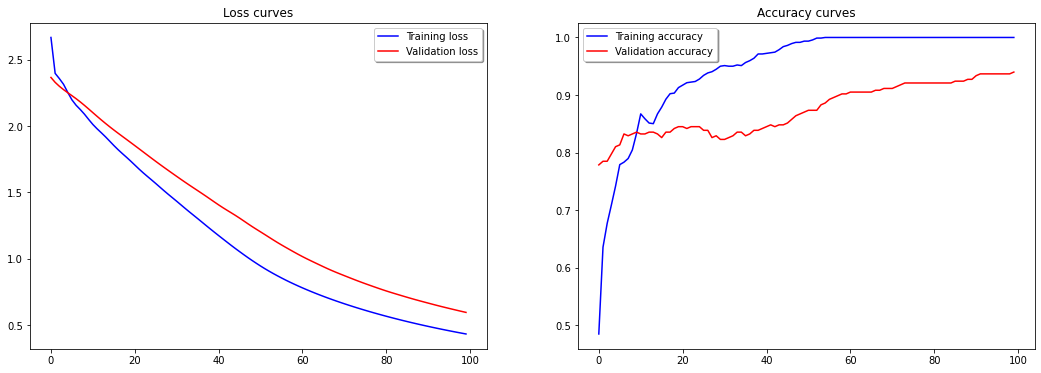

48     model_Uluru
Train data dimensions: (941, 6, 62), (941, 1)
Test data dimensions: (316, 6, 62), (316, 1)


Restoring model weights from the end of the best epoch: 59.
Epoch 89: early stopping
-----------------------------------------------------------------
Training was completed in 18.51 secs
-----------------------------------------------------------------
-----------------------------------------------------------------
train accuracy = 97.7683%
test accuracy = 95.8861%
test error = 25 out of 608 examples


<Figure size 432x288 with 0 Axes>

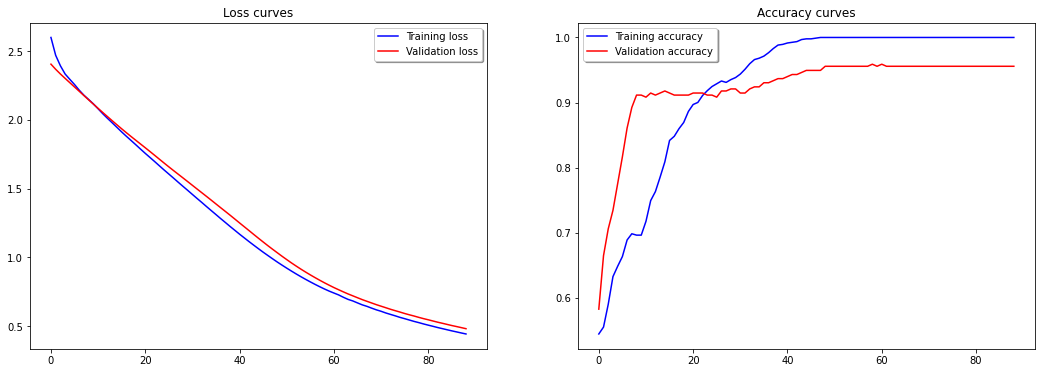

In [8]:
lcl = locals()
c=0
for city in df.Location.unique():
    print(c, "   " ,f"model_{city}")
    c+=1
    d1 = df[df.Location==city]
    d1.pop("Location")
    # Split train and test data
    train_features = d1.iloc[:int(d1.shape[0]*0.6)]
    train_labels = d1.iloc[:int(d1.shape[0]*0.6) , -1]

    val_features = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8)]
    val_labels = d1.iloc[int(d1.shape[0]*0.6):int(d1.shape[0]*0.8), -1]

    test_features = d1.iloc[int(d1.shape[0]*0.8):]
    test_labels = d1.iloc[int(d1.shape[0]*0.8):, -1]

    T = 5+1  # my choice of the timesteps window

    prepend_features = train_features.iloc[-(T-1):]
    test_features = pd.concat([prepend_features, test_features], axis=0)

    train_features.shape, train_labels.shape, test_features.shape, test_labels.shape , val_features.shape ,val_labels.shape

    # Rescale the features
    from sklearn.preprocessing import StandardScaler  # MinMaxScaler

    scaler = StandardScaler()  # MinMaxScaler(feature_range=(-1,1))
    scaled_train_features = pd.DataFrame(scaler.fit_transform(train_features.values),
                                         index=train_features.index,
                                         columns=train_features.columns)
    # The Scaler is fit on the training set and then applied to the test set
    scaled_test_features = pd.DataFrame(scaler.transform(test_features.values),
                                        index=test_features.index,
                                        columns=test_features.columns)

    scaled_train_features.shape, scaled_test_features.shape
    
    # Create sequences of T timesteps
    X_train, y_train = [], []
    for i in range(train_labels.shape[0] - (T-1)):
        X_train.append(scaled_train_features.iloc[i:i+T].values)
        y_train.append(train_labels.iloc[i + (T-1)])
    X_train, y_train = np.array(X_train), np.array(y_train).reshape(-1,1)
    print(f'Train data dimensions: {X_train.shape}, {y_train.shape}')

    X_test, y_test = [], []
    for i in range(test_labels.shape[0]):
        X_test.append(scaled_test_features.iloc[i:i+T].values)
        y_test.append(test_labels.iloc[i])
    X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)  

    print(f'Test data dimensions: {X_test.shape}, {y_test.shape}')
    
    #create model
    # Build the model
    lcl[f"model_{city}"] = Sequential()
    lcl[f"model_{city}"].add(GRU(input_shape=(T, N), units=LAYERS[0],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(GRU(units=LAYERS[1],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=True, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(GRU(units=LAYERS[2],
                   activation='tanh', recurrent_activation='hard_sigmoid',
                   kernel_regularizer=l2(LAMBD), recurrent_regularizer=l2(LAMBD),
                   dropout=DP, recurrent_dropout=RDP,
                   return_sequences=False, return_state=False,
                   stateful=False, unroll=False
                  ))
    lcl[f"model_{city}"].add(BatchNormalization())
    lcl[f"model_{city}"].add(Dense(units=LAYERS[3], activation='sigmoid'))

    # Compile the model with Adam optimizer
    lcl[f"model_{city}"].compile(loss='binary_crossentropy',
                  metrics=['accuracy'],
                  optimizer=Adam(lr=LR))

    # Define a learning rate decay method:
    lr_decay = ReduceLROnPlateau(monitor='loss', 
                                 patience=1, verbose=0, 
                                 factor=0.5, min_lr=1e-8)
    # Define Early Stopping:
    early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, 
                               patience=30, verbose=1, mode='auto',
                               baseline=0, restore_best_weights=True)
    
    
    
    # Train the model. 
    # The dataset is small for NN - let's use test_data for validation
    start = time()
    History = lcl[f"model_{city}"].fit(X_train, y_train,
                        epochs=EPOCH,
                        batch_size=BATCH,
                        validation_split=0.0,
                        validation_data=(X_test[:M_TEST], y_test[:M_TEST]),
                        shuffle=True,verbose=0,
                        callbacks=[lr_decay, early_stop])
    print('-'*65)
    print(f'Training was completed in {time() - start:.2f} secs')
    print('-'*65)
    # Evaluate the model:
    train_loss, train_acc = lcl[f"model_{city}"].evaluate(X_train, y_train,
                                           batch_size=M_TRAIN, verbose=0)
    test_loss, test_acc = lcl[f"model_{city}"].evaluate(X_test[:M_TEST], y_test[:M_TEST],
                                         batch_size=M_TEST, verbose=0)
    print('-'*65)
    print(f'train accuracy = {round(train_acc * 100, 4)}%')
    print(f'test accuracy = {round(test_acc * 100, 4)}%')
    print(f'test error = {round((1 - test_acc) * M_TEST)} out of {M_TEST} examples')

    # Plot the loss and accuracy curves over epochs:
    plt.figure()
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
    axs[0].plot(History.history['loss'], color='b', label='Training loss')
    axs[0].plot(History.history['val_loss'], color='r', label='Validation loss')
    axs[0].set_title("Loss curves")
    axs[0].legend(loc='best', shadow=True)
    axs[1].plot(History.history['accuracy'], color='b', label='Training accuracy')
    axs[1].plot(History.history['val_accuracy'], color='r', label='Validation accuracy')
    axs[1].set_title("Accuracy curves")
    axs[1].legend(loc='best', shadow=True)
    plt.show()
    print("========"*15)
    print("========"*15)
    print("========"*15)